### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## 1) Assignment activity 1
In the first module you are encouraged to explore the data and the provided template. You should also reflect on the scenario and use case and start to document your own interpretation of the business questions and how you will go about answering them.

## Points taken from scenario

High-level business questions  concerning the utilisation of services, missed appointments, and the potential value of using external data sources such as Twitter.

The NHS must expand its infrastructure and resources to match its increasing population capacity. For this, it needs to budget correctly. **When deciding on budget allotment, the NHS must understand the utilisation trends of each component in its network.**

NHS’s capacity should be increased or the current capacity is adequate and that efforts to make better use of existing infrastructure and resources are sufficient? 

We need to explore the available data and offer suggestions and recommendations based on your observations.

What are the reasons for missed appointments?
How best to handle this problem?


### The two main questions posed by the NHS are:
1. Has there been adequate staff and capacity in the networks?
2. What was the actual utilisation of resources?

### Questions to investigate:
- What is the number of locations, service settings, context types, national categories, and appointment statuses in the data sets?
- What is the date range of the provided data sets, and which service settings reported the most appointments for a specific period?
- What is the number of appointments and records per month?
- What monthly and seasonal trends are evident, based on the number of appointments for service settings, context types, and national categories?
- What are the top trending hashtags (#) on the supplied Twitter data set and how can this be used in the decision-making process?
- Was there adequate staff and capacity in the networks?
- What was the actual utilisation of resources?
- What insights can be gained by looking at missed appointments?
- What are the most important patterns visible in the data relating to the use case? 
- What insights can be gained from the data, and what recommendations can be made to the NHS based on these insights?

## 2) Assignment activity 2
**Basic exploration and descriptive statistics.**
- Import the three indicated data sources and perform basic exploratory analysis including obtaining descriptive statistics.
- Determine and comment on the quality, usefulness, and opportunities contained in the data sets.
- Document initial observations and findings.

Are there any comments regarding data quality or descriptive statistics worth noting for each of the data sets?
Can you comment on other features (columns) that could potentially be useful in your analysis?

### Prepare your workstation

In [12]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Import and sense-check 'actual_duration.csv' as ad.
ad = pd.read_csv('actual_duration.csv')

print(ad.shape)
print(ad.dtypes)
print(ad.columns)
ad.head()

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
Index(['sub_icb_location_code', 'sub_icb_location_ons_code',
       'sub_icb_location_name', 'icb_ons_code', 'region_ons_code',
       'appointment_date', 'actual_duration', 'count_of_appointments'],
      dtype='object')


sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [14]:
# Check for missing values.
ad_na = ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [15]:
# Review metadata and descriptive statistics.
# To review metadata. Print a concise summary of a DataFrame.
print(ad.info())

# Descriptive statistics.
ad.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB
None


count_of_appointments
count          137793.000000
mean             1219.080011
std              1546.902956
min                 1.000000
25%               194.000000
50%               696.000000
75%              1621.000000
max             15400.000000

*Count of appointments is the only numeric column, hence the only one to have stats*

In [17]:
# Count the values in the dataframe.
print(ad['actual_duration'].value_counts())


actual_duration
Unknown / Data Quality    20161
1-5 Minutes               19909
6-10 Minutes              19902
11-15 Minutes             19738
16-20 Minutes             19534
21-30 Minutes             19452
31-60 Minutes             19097
Name: count, dtype: int64


**Observation on Metadata**

**Actual duration** First included in the April 2022 release with data from December 2021. Actual duration is the length in minutes of the consultation that took place.

It varies from practice to practice.

‘Unknown / Data Quality Issue' - Appointments with 0 duration or more than 60 minutes

In [19]:
# Import and sense-check 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')
print(ar.shape)
print(ar.dtypes)
print(ar.columns)
ar.head()

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
Index(['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')


icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   6791  
2                       2 to 7 Days                  20686  
3                    22  to 28 Days                   4268  
4                     8  to 14 Days                  11971

In [20]:
# Check for missing values.
ar_na = ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [21]:
# Review metadata and descriptive statistics.
# To review metadata. Print a concise summary of a DataFrame.
ar.info()

# Descriptive statistics.
ar.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


count_of_appointments
count          596821.000000
mean             1244.601857
std              5856.887042
min                 1.000000
25%                 7.000000
50%                47.000000
75%               308.000000
max            211265.000000

<Axes: >

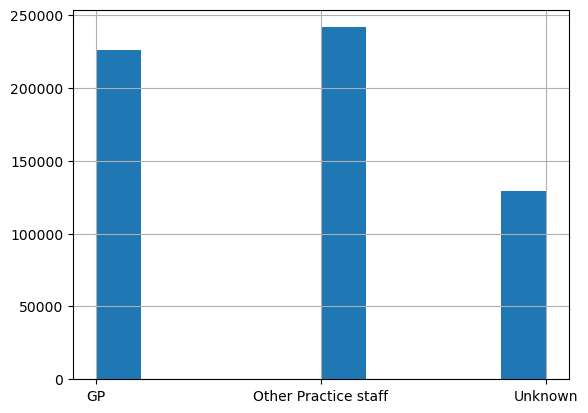

In [22]:
# View the count the values in the dataframe with a histogram. 
ar['hcp_type'].hist()

<Axes: >

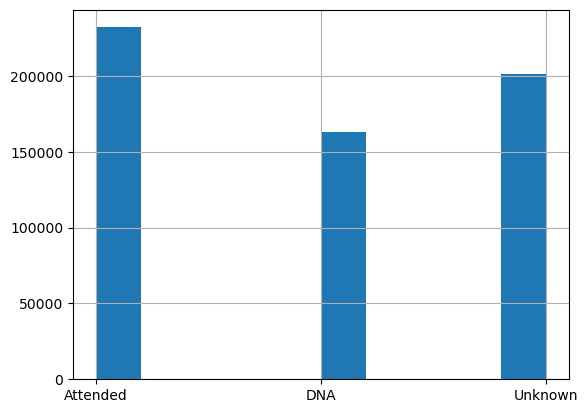

In [23]:
# View the count the values in the dataframe with a histogram. 
ar['appointment_status'].hist()

<Axes: >

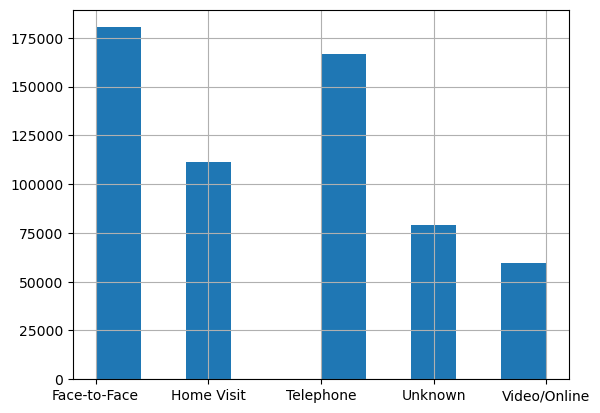

In [24]:
# View the count the values in the dataframe with a histogram. 
ar['appointment_mode'].hist()

**Observations about Metadata**

**Appointment status:** DNA - Did Not Attend

> 'Unknown' - the final status of an appointment remains as ‘Booked’ (3% – 6% of monthly appointments).

**hcp_type:** 'Other Practice Staff' all other HCP types than GP.
'Unknown' - Blank or missing data

**Appointment mode:** 'Unknown' - Practices using the Cegedim GP system are unable to supply appointment mode data. Higher in releases from July 2019 onwards when Cegedim practices were included in the publication
Some video conference appointments may be logged by the practice as face to face.

In [26]:
# Import and sense-check 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx')
print(nc.shape)
print(nc.dtypes)
print(nc.columns)
nc.head()

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [27]:
# Check for missing values.
nc_na = nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [28]:
# Review metadata and descriptive statistics.
# To review metadata. Print a concise summary of a DataFrame.
nc.info()

# Review descriptive statistics.
nc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


appointment_date  count_of_appointments
count                         817394          817394.000000
mean   2022-01-16 00:50:35.860796160             362.183684
min              2021-08-01 00:00:00               1.000000
25%              2021-10-25 00:00:00               7.000000
50%              2022-01-18 00:00:00              25.000000
75%              2022-04-07 00:00:00             128.000000
max              2022-06-30 00:00:00           16590.000000
std                              NaN            1084.576600

<Axes: >

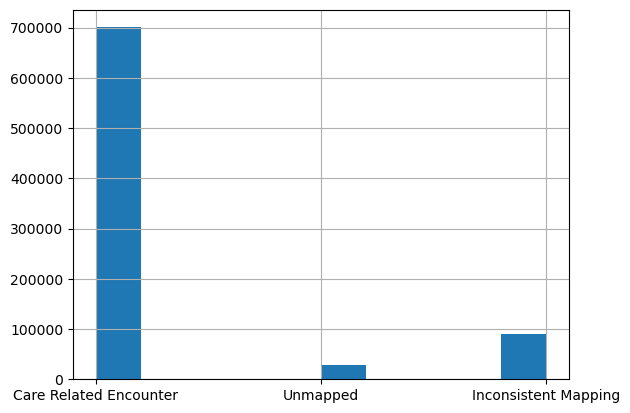

In [29]:
# See the count the values in the dataframe in a histogram. 
nc['context_type'].hist()

<Axes: >

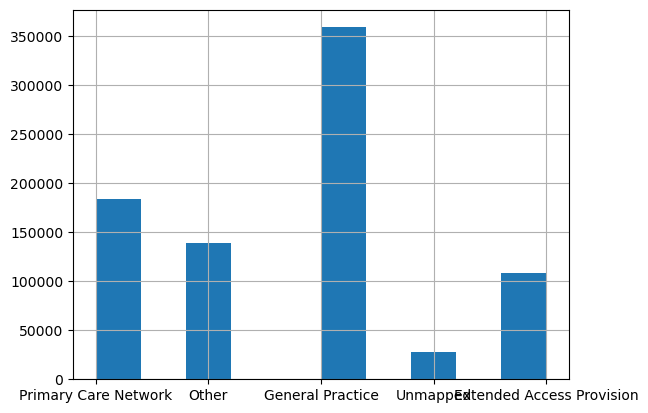

In [30]:
# See the count the values in the dataframe in a histogram. 
nc['service_setting'].hist()

In [31]:
# Count the values in the dataframe. 
nc['national_category'].value_counts()

national_category
Inconsistent Mapping                                                   89494
General Consultation Routine                                           89329
General Consultation Acute                                             84874
Planned Clinics                                                        76429
Clinical Triage                                                        74539
Planned Clinical Procedure                                             59631
Structured Medication Review                                           44467
Service provided by organisation external to the practice              43095
Home Visit                                                             41850
Unplanned Clinical Activity                                            40415
Patient contact during Care Home Round                                 28795
Unmapped                                                               27419
Care Home Visit                                           

**Obsevations about Metadata**

The National Categories are subdivided into three ‘Context Types’.

**service_setting:** Provision of care in which the appointment was delivered. 
>‘Unmapped’- No recorded category against an appointment slot type. This could be due to an error receiving the data, or an appointment type has not been mapped.

**context_type:** Care Related Encounter – Categories within this context type involve the patient and can be any modality, e.g. face-to-face appointments, telephone consultations, video and online consultations, home visits etc.
>Unmapped – No record of a category against an appointment slot type. This could be due to an error receiving the data, or an appointment type has not been mapped.
>Inconsistent Mapping – Appointment types that have been mapped but not to a Care Related Encounter. Appointments under this context type conflict with the description of an appointment. Work is ongoing to improve the consistency of mapping.


**national_category:** Subdivision of Care Related Encounter, detailing the  provision of care in which the appointment was delivered
>Inconsistent Mapping – Care Related Encounter but does not fit into any other category – Appointment types not mapped to a Care Related Encounter

**Question 1:** How many locations are there in the data set?

In [34]:
# Determine the number of locations in ad dataframe.
print(len(ad['sub_icb_location_code'].unique()))
print(len(ad['icb_ons_code'].unique()))
print(len(ad['region_ons_code'].unique()))

106
42
7


In [35]:
# Determine the number of locations in nc dataframe.
print(len(nc['sub_icb_location_name'].unique()))
print(len(nc['icb_ons_code'].unique()))

106
42


In [36]:
# Determine the number of locations in ar dataframe.
print(len(ar['icb_ons_code'].unique()))


42


**There are 7 regions, 42 ICB locations and 106 sublocations**

**Question 2:** What are the five locations with the highest number of records?



In [39]:
# Determine the top five locations based on record count in ad dataframe.
ad_top = ad['icb_ons_code'].value_counts().head(5)

# View DateFrame.
ad_top

icb_ons_code
E54000057    12668
E54000008    10636
E54000050     9938
E54000048     9808
E54000051     7973
Name: count, dtype: int64

In [40]:
# Determine the top five locations based on record count in ar dataframe.
ar_top = ar['icb_ons_code'].value_counts().head(5)

# View DateFrame.
ar_top

icb_ons_code
E54000057    54527
E54000008    48253
E54000050    43774
E54000048    36360
E54000051    31069
Name: count, dtype: int64

In [41]:
# Determine the top five locations based on record count in nc dataframe.
nc_top = nc['icb_ons_code'].value_counts().head(5)

# View DateFrame.
nc_top

icb_ons_code
E54000057    59180
E54000008    53744
E54000050    53707
E54000048    43381
E54000054    42888
Name: count, dtype: int64

In [42]:
# To compare the top 5 locations on the 3 files based on ICB code.
# Concatenate the top 5 locations result
top_icb = pd.concat([nc_top, ar_top, ad_top], axis=1)
top_icb.columns = ['nc_count', 'ar_count', 'ad_count']

# View DateFrame.
top_icb

nc_count  ar_count  ad_count
icb_ons_code                              
E54000057      59180.0   54527.0   12668.0
E54000008      53744.0   48253.0   10636.0
E54000050      53707.0   43774.0    9938.0
E54000048      43381.0   36360.0    9808.0
E54000054      42888.0       NaN       NaN
E54000051          NaN   31069.0    7973.0

The locations E54000057, E54000008, E54000050, E54000048 have the highest record counts over the 3 files.

In [44]:
# Determine the top five sublocations based on record count in nc dataframe.
nc_sub = nc['sub_icb_location_name'].value_counts().head(5)

# View DateFrame.
nc_sub

sub_icb_location_name
NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: count, dtype: int64

In [45]:
# Determine the top five sublocations based on record count in ad dataframe.
ad_sub = ad['sub_icb_location_name'].value_counts().head(5)

# View DateFrame.
ad_sub

sub_icb_location_name
NHS Norfolk and Waveney ICB - 26A                       1484
NHS Kent and Medway ICB - 91Q                           1484
NHS North West London ICB - W2U3Z                       1484
NHS Bedfordshire Luton and Milton Keynes ICB - M1J4Y    1484
NHS Greater Manchester ICB - 14L                        1484
Name: count, dtype: int64

In [46]:
# To compare the top 5 sublocations on the 2 files that have sublocation data.
# Concatenate the top 5 sublocations result
top_sub = pd.concat([nc_sub, ad_sub], axis=1)
top_sub.columns = ['nc_sub', 'ad_sub']

# View DateFrame.
top_sub

nc_sub  ad_sub
sub_icb_location_name                                              
NHS North West London ICB - W2U3Z                   13007.0  1484.0
NHS Kent and Medway ICB - 91Q                       12637.0  1484.0
NHS Devon ICB - 15N                                 12526.0     NaN
NHS Hampshire and Isle Of Wight ICB - D9Y0V         12171.0     NaN
NHS North East London ICB - A3A8R                   11837.0     NaN
NHS Norfolk and Waveney ICB - 26A                       NaN  1484.0
NHS Bedfordshire Luton and Milton Keynes ICB - ...      NaN  1484.0
NHS Greater Manchester ICB - 14L                        NaN  1484.0

Ad file shows the same count for sublocation, what I find susptions. 
Based on nc file, NHS North West London ICB - W2U3Z, NHS Kent and Medway ICB - 91Q, NHS Devon ICB - 15N
NHS Hampshire and Isle Of Wight ICB - D9Y0V and NHS North East London ICB - A3A8R have the highest record count.

In [48]:
# Determine the top five regions based on record count.
ad_region = ad['region_ons_code'].value_counts().head(5)

# View DateFrame.
ad_region

region_ons_code
E40000010    33112
E40000012    29063
E40000011    25015
E40000007    18888
E40000005    15130
Name: count, dtype: int64

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [50]:
# Determine the number of service settings.
print("Number of service settings:", len(nc['service_setting'].unique()))

# Determine the number of context types.
print("Number of context types:", len(nc['context_type'].unique()))

# Determine the number of national categories.
print("Number of national categories:", len(nc['national_category'].unique()))

# Determine the number of unique appointment statuses.
print("Number of  appointment statuses:", len(ar['appointment_status'].unique()))


Number of service settings: 5
Number of context types: 3
Number of national categories: 18
Number of  appointment statuses: 3


>**There are 5 service settings, 3 context types, 18 national categories, and 3 appointment statuses**

## 3) Assignment activity 3
Continue your exploratory data analysis by answering the specific questions posed by the NHS as well as additional trends identified during data exploration. You can start by looking at the date range and the change in behaviour over time for the available data sources.

**Question 1:** Between what dates were appointments scheduled? 

In [54]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
print(ad['appointment_date'].head())

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object


In [55]:
# View the first five rows of appointment_date and appointment_month for the nc DataFrame to determine the date format.
print(nc[['appointment_date','appointment_month']].head())
print(nc[['appointment_date','appointment_month']].dtypes)

  appointment_date appointment_month
0       2021-08-02           2021-08
1       2021-08-02           2021-08
2       2021-08-02           2021-08
3       2021-08-02           2021-08
4       2021-08-02           2021-08
appointment_date     datetime64[ns]
appointment_month            object
dtype: object


In [56]:
# View the first five rows of appointment_month for the ar DataFrame to determine the date format.
print(ar['appointment_month'].head())

0    2020-01
1    2020-01
2    2020-01
3    2020-01
4    2020-01
Name: appointment_month, dtype: object


>The only data that is not in datetime format is 'appointment_month' on nc file. However, if I don't change the data format for the other files, I will get error.

In [58]:
# Change the date format of nc['appointment_date'].
# Import datetime module and datetime class
from datetime import datetime

# Change the format of nc['appointment_month'] to datetime.
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'])

# Change the format of nc['appointment_date'] to datetime.
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'])

# Change the format of ad['appointment_date'] to datetime.
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])  ## I need to add the format to resolve a warning and ensure that the dates are parsed correctly

# Change the format of ad['appointment_date'] to datetime.
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

# Check the data types
print(nc['appointment_month'].dtypes)
print(nc['appointment_date'].dtypes)
print(ad['appointment_date'].dtypes)
print(ar['appointment_month'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [59]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
print("ad:")

min_date = ad['appointment_date'].min()
print(f"Minimun date: {min_date}")

max_date = ad['appointment_date'].max()
print(f"Maximum date: {max_date}")

ad:
Minimun date: 2021-12-01 00:00:00
Maximum date: 2022-06-30 00:00:00


In [60]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
print("nc:")

min_date = nc['appointment_date'].min()
print(f"Minimun date: {min_date}")

max_date = nc['appointment_date'].max()
print(f"Maximum date: {max_date}")

nc:
Minimun date: 2021-08-01 00:00:00
Maximum date: 2022-06-30 00:00:00


In [61]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.
print("ar:")

min_date = ar['appointment_month'].min()
print(f"Minimun date: {min_date}")

max_date = ar['appointment_month'].max()
print(f"Maximum date: {max_date}")

ar:
Minimun date: 2020-01-01 00:00:00
Maximum date: 2022-06-01 00:00:00


**Question 1: Between what dates were appointments scheduled?**

**In the file ar: JAN-2020 to JUN-2022**

**In the file ad: 01-DEC-2021 to 30-JUN-2022**

**In the file nc: 01-AUG-2021 to 30-JUN-2022**


**Question 2:** Which service setting reported the most appointments NHS North West London from 1 January to 1 June 2022?

In [64]:
# For each of these service settings, determine the number of records available for the period and the location. 
# Create a subset of the nc DataFrame (e.g. nc_subset).
nc_subset = nc[['sub_icb_location_name','appointment_date','appointment_month','service_setting', 'count_of_appointments']]

# View the output.
nc_subset.head()

sub_icb_location_name appointment_date  \
0  NHS North East and North Cumbria ICB - 00L       2021-08-02   
1  NHS North East and North Cumbria ICB - 00L       2021-08-02   
2  NHS North East and North Cumbria ICB - 00L       2021-08-02   
3  NHS North East and North Cumbria ICB - 00L       2021-08-02   
4  NHS North East and North Cumbria ICB - 00L       2021-08-02   

  appointment_month       service_setting  count_of_appointments  
0        2021-08-01  Primary Care Network                      3  
1        2021-08-01                 Other                      7  
2        2021-08-01      General Practice                     79  
3        2021-08-01      General Practice                    725  
4        2021-08-01      General Practice                      2

In [65]:
# Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?
# Filter data for the specified period and location
nwl = nc_subset[
    (nc_subset['sub_icb_location_name'].str.contains('NHS North West London')) &
    (nc_subset['appointment_date'] >= '01/01/2022') &
    (nc_subset['appointment_date'] <= '01/06/2022')
]

# Group by service setting and sum the count_of_appointments
service_nwl = nwl.groupby('service_setting')['count_of_appointments'].sum().reset_index()

# Sort the DataFrame by count_of_appointments in descending order
service_nwl = service_nwl.sort_values(by='count_of_appointments', ascending=False)
service_nwl


service_setting  count_of_appointments
1           General Practice                 128619
4                   Unmapped                  12959
2                      Other                   4049
3       Primary Care Network                   3194
0  Extended Access Provision                   2760

**The most popular service setting for NHS North West London from 1 January to 1 June 2022 is General Practice**

**Question 3:** Which month had the highest number of appointments?

In [68]:
# Look at the National category (nc) file.
# Group by Year and Month, Sum the Appointments, and Sort the Results
result_nc = nc_subset.groupby([nc_subset['appointment_month'].dt.year, 
                            nc_subset['appointment_month'].dt.month])\
['count_of_appointments'].sum()\
.sort_values(ascending=False)

result_nc

appointment_month  appointment_month
2021               11                   30405070
                   10                   30303834
2022               3                    29595038
2021               9                    28522501
2022               5                    27495508
                   6                    25828078
                   1                    25635474
                   2                    25355260
2021               12                   25140776
2022               4                    23913060
2021               8                    23852171
Name: count_of_appointments, dtype: int64

> On file nc, the month had the highest number of appointments is November 2021 with 30,405,070 appointments.

*For some reason I can not use the clear_index() function to create a dateframe in this case*

In [71]:
# Look at the Actual Duration (ad) file.
# Group by Year and Month, Sum the Appointments, and Sort the Results
result_ad = ad.groupby([ad['appointment_date'].dt.year, 
                            ad['appointment_date'].dt.month])\
['count_of_appointments'].sum()\
.sort_values(ascending=False)

result_ad

appointment_date  appointment_date
2022              3                   27170002
                  5                   25343941
                  6                   23715317
                  1                   23597196
                  2                   23351939
2021              12                  22853483
2022              4                   21948814
Name: count_of_appointments, dtype: int64

>On file ad, the month had the highest number of appointments is March 2022, with 27,170,002 appointments

In [73]:
# Look at the Appointment Regional (ar) file.
# Group by Year and Month, Sum the Appointments, and Sort the Results
result_ar = ar.groupby([ar['appointment_month'].dt.year, 
                            ar['appointment_month'].dt.month])\
['count_of_appointments'].sum()\
.sort_values(ascending=False)

result_ar.head()

appointment_month  appointment_month
2021               11                   30405070
                   10                   30303834
2022               3                    29595038
2021               9                    28522501
2020               10                   28301932
Name: count_of_appointments, dtype: int64

> On file ar, the month had the highest number of appointments is November 2021 with 30,405,070 appointments.

In [75]:
# Compare the sum of appointments on the 3 files.
# Combine the counts results in the three files stored as result_nc, result_ad, and result_ar into a single DataFrame
merged_sum = pd.concat([result_nc, result_ar, result_ad], axis=1)
merged_sum.columns = ['sum_of_appointments_nc', 'sum_of_appointments_ar', 'sum_of_appointments_ad']

merged_sum.head(10)

sum_of_appointments_nc  sum_of_appointments_ar  \
2021 11              30405070.0                30405070   
     10              30303834.0                30303834   
2022 3               29595038.0                29595038   
2021 9               28522501.0                28522501   
2022 5               27495508.0                27495508   
     6               25828078.0                25828078   
     1               25635474.0                25635474   
     2               25355260.0                25355260   
2021 12              25140776.0                25140776   
2022 4               23913060.0                23913060   

         sum_of_appointments_ad  
2021 11                     NaN  
     10                     NaN  
2022 3               27170002.0  
2021 9                      NaN  
2022 5               25343941.0  
     6               23715317.0  
     1               23597196.0  
     2               23351939.0  
2021 12              22853483.0  
2022 4               21948814.0

>The files ar and nc have the same sum of appointments on the period they overlap. File ad is different.

**Question 4:** What was the total number of records per month?

In [78]:
# Total number of records per month.
# Same as question 3, but use count instead of sum

In [79]:
# Look at the National category (nc) file.

# Group by Year and Month, Sum the Appointments, and Sort the Results
result_nc_count = nc_subset.groupby([nc_subset['appointment_month'].dt.year, 
                            nc_subset['appointment_month'].dt.month])\
['count_of_appointments'].count()\

result_nc_count

appointment_month  appointment_month
2021               8                    69999
                   9                    74922
                   10                   74078
                   11                   77652
                   12                   72651
2022               1                    71896
                   2                    71769
                   3                    82822
                   4                    70012
                   5                    77425
                   6                    74168
Name: count_of_appointments, dtype: int64

In [80]:
# Look at the Appoitment Regional (ar) file.
# Group by Year and Month, Sum the Appointments, and Sort the Results
result_ar_count = ar.groupby([ar['appointment_month'].dt.year, 
                            ar['appointment_month'].dt.month])\
['count_of_appointments'].count()\


result_ar_count.head()

appointment_month  appointment_month
2020               1                    20889
                   2                    20689
                   3                    21350
                   4                    19124
                   5                    18338
Name: count_of_appointments, dtype: int64

In [81]:
# Look at the Actual Duration (ad) file.
# Group by Year and Month, Sum the Appointments, and Sort the Results
result_ad_count = ad.groupby([ad['appointment_date'].dt.year, 
                            ad['appointment_date'].dt.month])\
['count_of_appointments'].count()

result_ad_count

appointment_date  appointment_date
2021              12                  19507
2022              1                   19643
                  2                   18974
                  3                   21236
                  4                   19078
                  5                   20128
                  6                   19227
Name: count_of_appointments, dtype: int64

In [82]:
# Combine the counts into a single DataFrame
merged_count = pd.concat([result_nc_count, result_ar_count, result_ad_count], axis=1)
merged_count.columns = ['count_of_appointments_nc', 'count_of_appointments_ar', 'count_of_appointments_ad']

merged_count.head(10)

count_of_appointments_nc  count_of_appointments_ar  \
2021 8                    69999.0                     19786   
     9                    74922.0                     20441   
     10                   74078.0                     20562   
     11                   77652.0                     20766   
     12                   72651.0                     20393   
2022 1                    71896.0                     20225   
     2                    71769.0                     20133   
     3                    82822.0                     20532   
     4                    70012.0                     20073   
     5                    77425.0                     20276   

         count_of_appointments_ad  
2021 8                        NaN  
     9                        NaN  
     10                       NaN  
     11                       NaN  
     12                   19507.0  
2022 1                    19643.0  
     2                    18974.0  
     3                    21236.0  
     4                    19078.0  
     5                    20128.0

**Observations:** 
Ar and nc have the same sum o appointments, but not the same counts. It's because in ar the appoitments are spread in more categories, but the total of appointments are the same.

I will create a subset with the data that are important and also they should meet in the same granularrity. For example, ar doesn't have sublocation, juts has ICB_ons_code, and month only, not date.

Ad has only 6 months of records, the only data is the actual duration of the appoitments, however it's not a realible data, because it varies from practice to practice when the start and end of the appoitment is recorded. Also, it doesn't overlap with the other 2 files. So, for now I will leave it on the side and we can always go back to dig information from it.

***Investigate the average of number of appointments by month***

In [85]:
# Calculate the average of sum of appointments for each DataFrame
average_sum_nc = merged_sum['sum_of_appointments_nc'].mean()
average_sum_ar = merged_sum['sum_of_appointments_ar'].mean()
average_sum_ad = merged_sum['sum_of_appointments_ad'].mean()

print("Average sum of appointments for result_nc:", average_sum_nc)
print("Average sum of appointments for result_ar:", average_sum_ar)
print("Average sum of appointments for result_ad:", average_sum_ad)

Average sum of appointments for result_nc: 26913342.727272727
Average sum of appointments for result_ar: 24760150.833333332
Average sum of appointments for result_ad: 23997241.714285713


# 

## 4) Assignment activity 4
Use visual techniques to explore and communicate patterns in the data. Note that you will likely revisit this section when preparing the final visualisations to be used in your technical report and business presentation. Make sure to document your thoughts and observations as they relate to various potential stakeholders.

The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [89]:
# Set figure size across notebook. Unless I want a different size, I won't need to specitfy it.
sns.set(rc={'figure.figsize':(12, 4)})

# Simple hacks to make plots look better: 
# # Colour palette to make charts look better.
blue, = sns.color_palette("muted", 1) 

#  Set the aesthetic style of the plots, like white grid, dark, white, and ticks.
sns.set_style('whitegrid')

# Font size of the axes titles.
plt.rc('axes', titlesize=16) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=12)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=10,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=10,color='#4f4e4e')  

# Font size of the Legend.
plt.rc('legend', fontsize=12)

# Default text size.
plt.rc('font', size=12) 

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [91]:
# View the df.
print(nc.columns)

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month'],
      dtype='object')


In [92]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Verify the changes
print(nc.dtypes)

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object


In [93]:
# Aggregate on a monthly level and determine the sum of records per month.
monthly_sum = nc.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()

# View the output.
monthly_sum.head()

appointment_month  count_of_appointments
0        2021-08-01               23852171
1        2021-09-01               28522501
2        2021-10-01               30303834
3        2021-11-01               30405070
4        2021-12-01               25140776

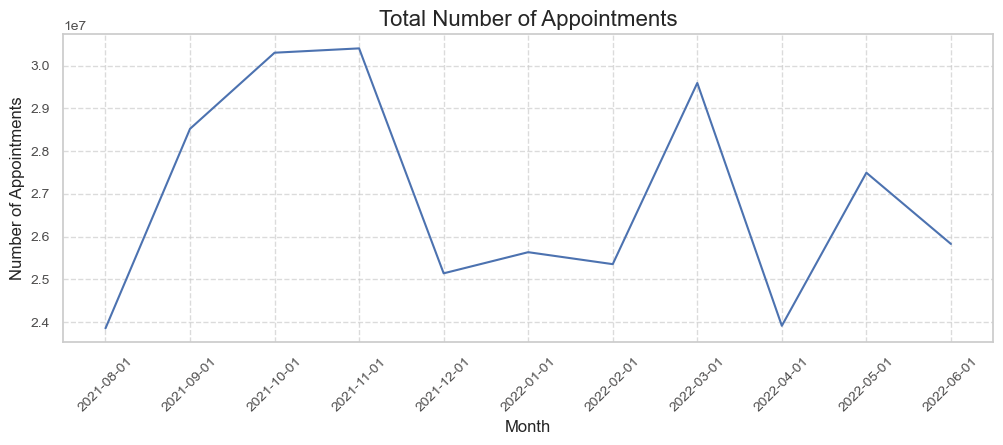

In [94]:
# Create a simple lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=monthly_sum)
plt.title('Total Number of Appointments')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.show()

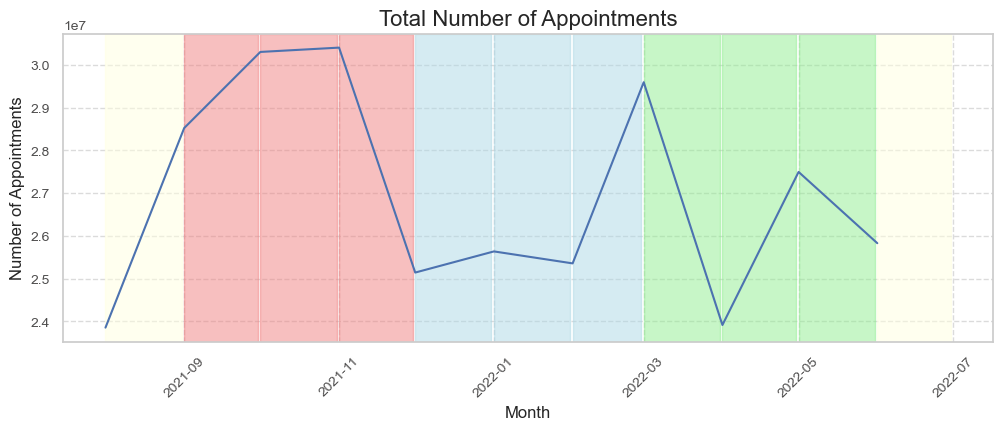

In [95]:

# Convert appointment_month to datetime
monthly_sum['appointment_month'] = pd.to_datetime(monthly_sum['appointment_month'])

# Create a simple lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=monthly_sum)
plt.title('Total Number of Appointments')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')

# Define seasons
seasons = {
    'Summer': ('2021-08', '2022-06'),
    'Autumn': ('2021-09', '2021-10', '2021-11'),
    'Winter': ('2021-12', '2022-01', '2022-02'),
    'Spring': ('2022-03', '2022-04', '2022-05')
}

# Define color palette for different seasons
season_palette = {'Winter': 'lightblue', 'Spring': 'lightgreen', 'Summer': 'lightyellow', 'Autumn': 'lightcoral'}

# Shade the background by season
for season, months in seasons.items():
    for month in months:
        plt.axvspan(pd.to_datetime(month), pd.to_datetime(month) + pd.offsets.MonthEnd(0), color=season_palette[season], alpha=0.5)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()


>*I found it interesting that there are less appointments between november and January, that's winter, exactly when I would expect more appointments.*


**Service settings:**

In [98]:
# Create a separate data set that can be used in future weeks. 
# Aggregate on a monthly level and determine the sum of records per month.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the output.
nc_ss.head()

appointment_month            service_setting  count_of_appointments
0        2021-08-01  Extended Access Provision                 160927
1        2021-08-01           General Practice               21575852
2        2021-08-01                      Other                 449101
3        2021-08-01       Primary Care Network                 432448
4        2021-08-01                   Unmapped                1233843

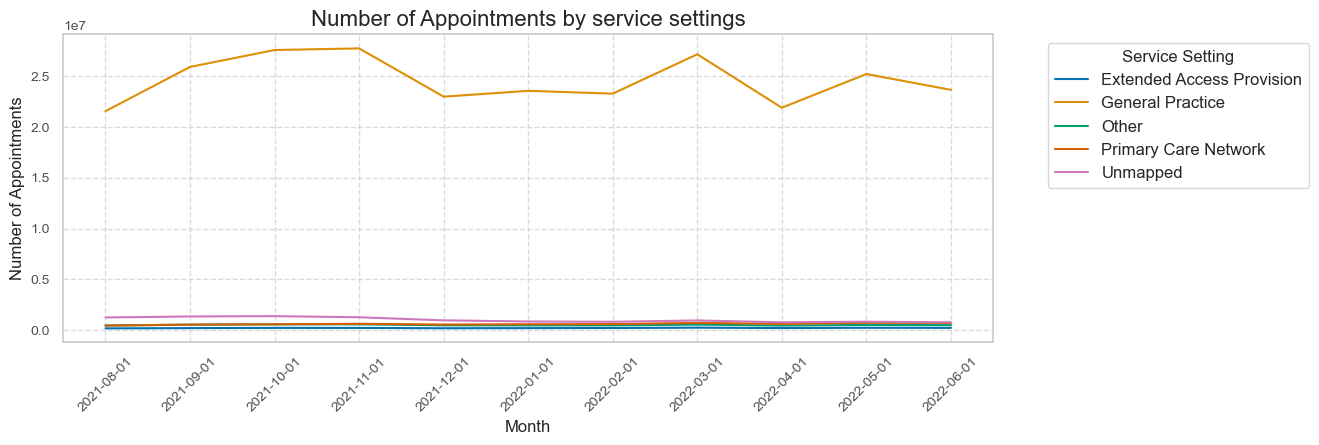

In [99]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', palette='colorblind', data=nc_ss)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Number of Appointments by service settings')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Save Figure
plt.savefig('service_setting.png')

# Show plot
plt.show()



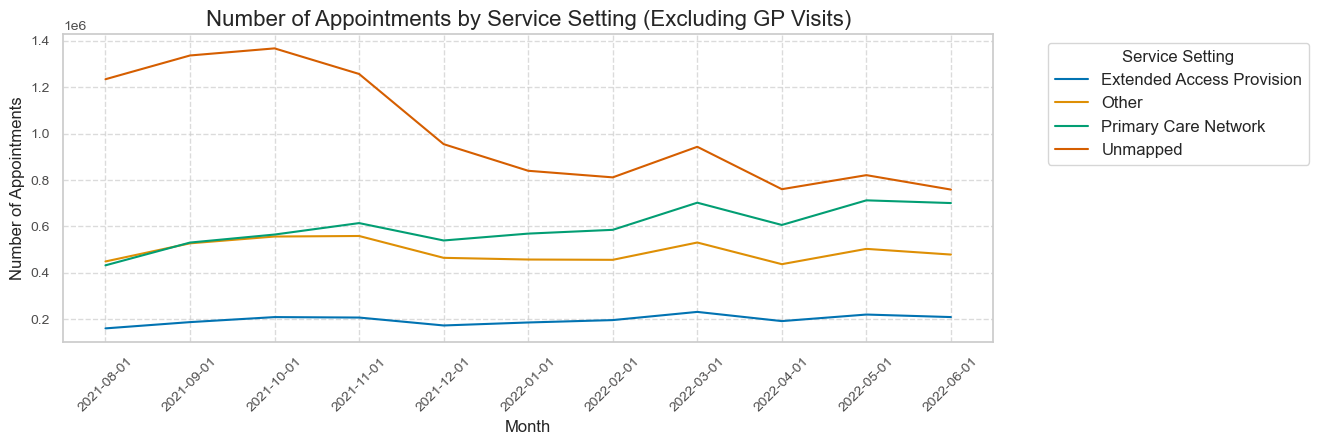

In [100]:
# Filter out General Practice service setting
nc_ss_without_gp = nc_ss[nc_ss['service_setting'] != 'General Practice']

# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', palette='colorblind', data=nc_ss_without_gp)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Number of Appointments by Service Setting (Excluding GP Visits)')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Save Figure
plt.savefig('service_setting_no_GP.png')

# Show plot
plt.show()



> GP are by far the most used service. However, when we delete it we can see there is a steady increase on PCN, 
and a decrease on unmapped. So, I wonder if PCN really increasing or weather is actually underrepresented because it was not being properly mapped.

**Context types:**

In [103]:
# Create a separate data set that can be used in future weeks. 
# Aggregate on a monthly level and determine the sum of records per month.
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# View the output.
nc_ct.head()

appointment_month            context_type  count_of_appointments
0        2021-08-01  Care Related Encounter               20255235
1        2021-08-01    Inconsistent Mapping                2363093
2        2021-08-01                Unmapped                1233843
3        2021-09-01  Care Related Encounter               24404251
4        2021-09-01    Inconsistent Mapping                2782135

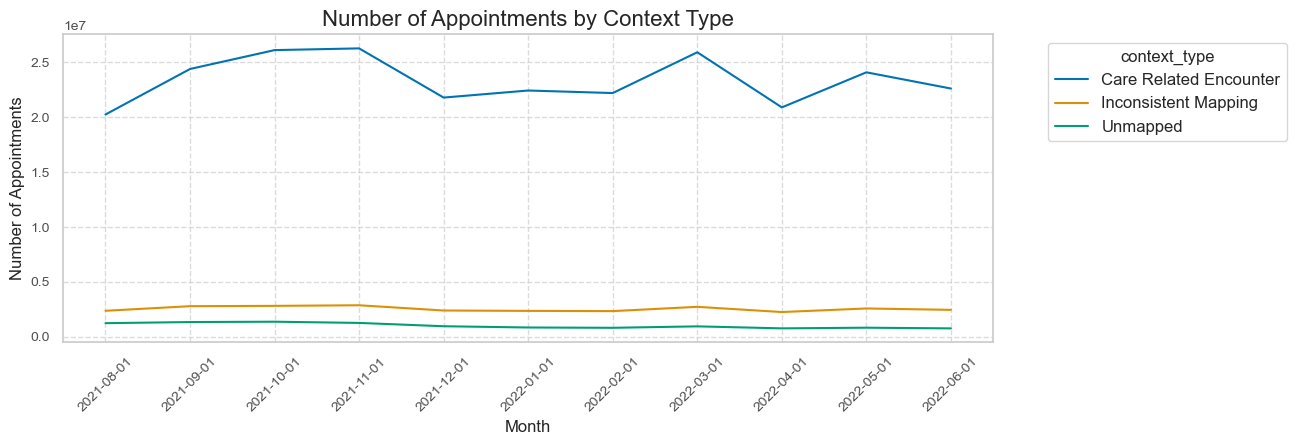

In [104]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type',  palette='colorblind', data=nc_ct)
plt.legend(title='context_type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Number of Appointments by Context Type')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Save Figure
plt.savefig('context_type.png')

# Show plot
plt.show()

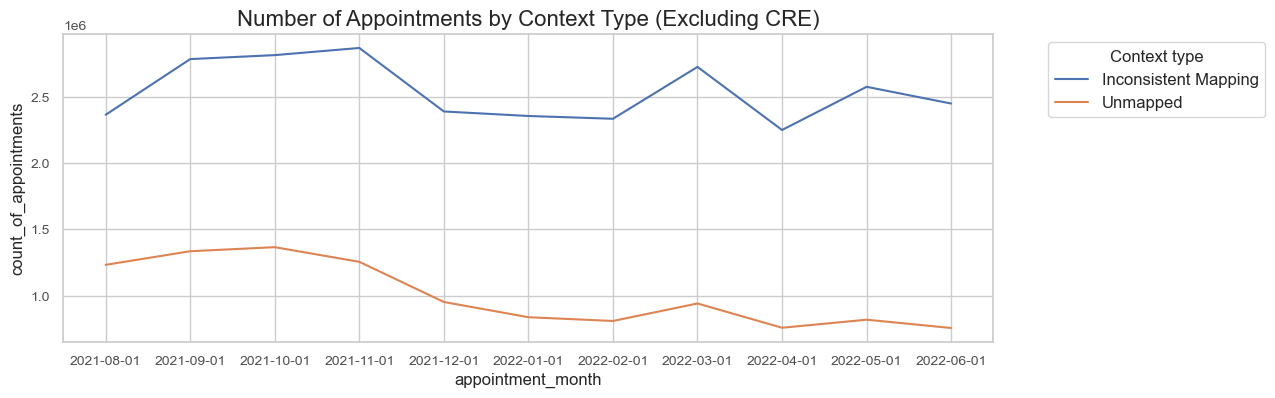

In [105]:
# Filter out General Practice service setting
nc_ct_without_cre = nc_ct[nc_ct['context_type'] != 'Care Related Encounter']

# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', data=nc_ct_without_cre)
plt.legend(title='Context type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Number of Appointments by Context Type (Excluding CRE)')
plt.show()

>This category doesn't add add value, because the records are either Care related encounter 
or unmaped or inconsistent mapping.

**National categories:**

In [108]:
# Create a separate data set that can be used in future weeks. 
# Aggregate on a monthly level and determine the sum of records per month.
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# View the output.
nc_nc.head()


appointment_month                                  national_category  \
0        2021-08-01  Care Home Needs Assessment & Personalised Care...   
1        2021-08-01                                    Care Home Visit   
2        2021-08-01                                    Clinical Triage   
3        2021-08-01                         General Consultation Acute   
4        2021-08-01                       General Consultation Routine   

   count_of_appointments  
0                  29676  
1                  47583  
2                3704207  
3                4280920  
4                7756045

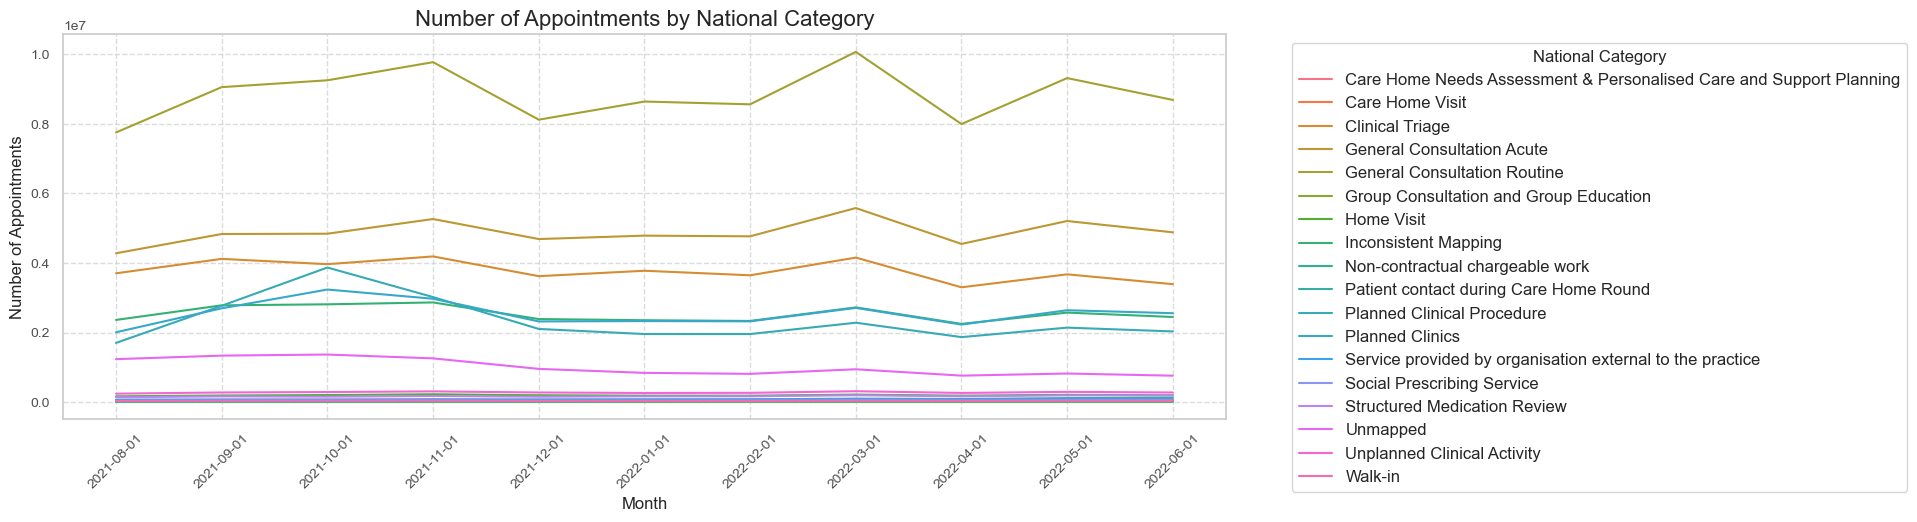

In [109]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
plt.figure(figsize=(15, 5))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_nc)
plt.legend(title='National Category', bbox_to_anchor=(1.05, 1))
plt.title('Number of Appointments by National Category')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

>*Very busy chart. I can group similar categories.* For that I will plot a bar chart to have a better sense what the categories are.

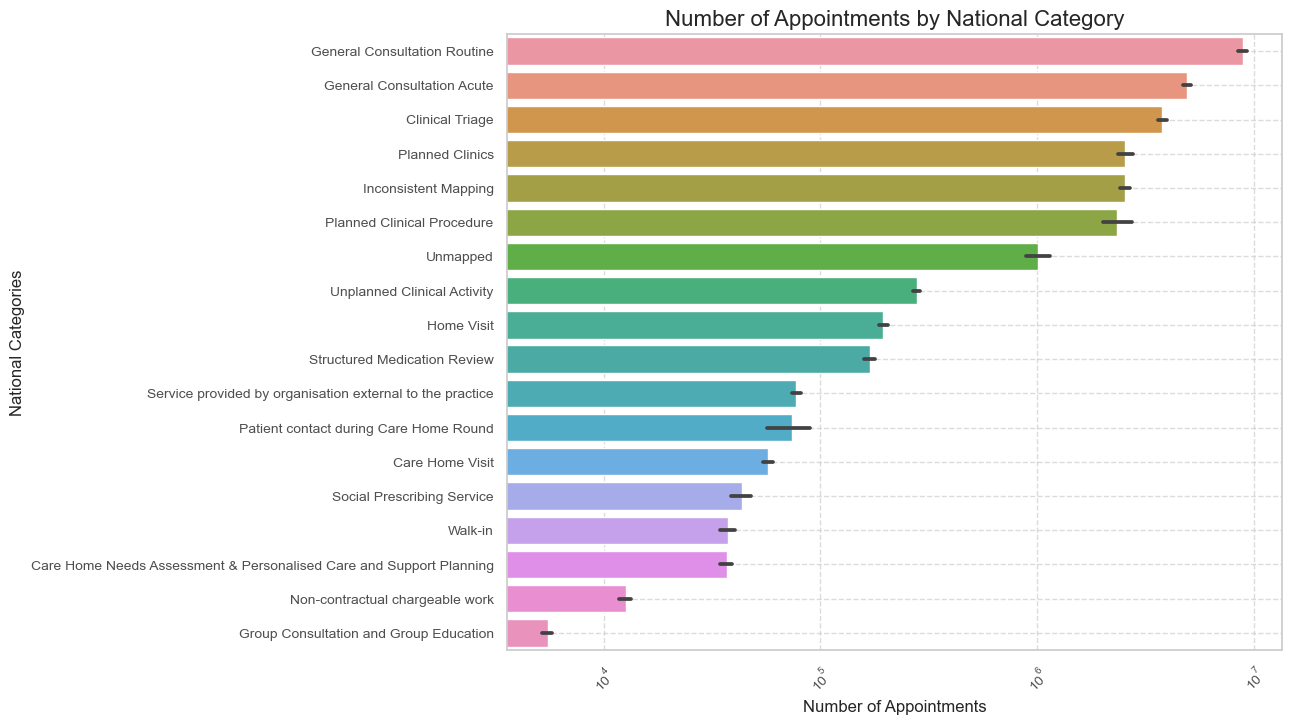

In [111]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
plt.figure(figsize=(10, 8))

# Calculate the total sum of appointments for each category
category_totals = nc_nc.groupby('national_category')['count_of_appointments'].sum()

# Sort categories based on the total sum of appointments in descending order
ordered_categories = category_totals.sort_values(ascending=False).index

sns.barplot(y='national_category', x='count_of_appointments', data=nc_nc, order=ordered_categories)
plt.title('Number of Appointments by National Category')
plt.xscale('log')
plt.ylabel('National Categories')
plt.xlabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

plt.show()

In [112]:
# Check unique values in 'national_category' column
unique_values = nc['national_category'].unique()
print(unique_values)

['Patient contact during Care Home Round' 'Planned Clinics' 'Home Visit'
 'General Consultation Acute' 'Structured Medication Review'
 'Care Home Visit' 'Unmapped' 'Clinical Triage'
 'Planned Clinical Procedure' 'Inconsistent Mapping'
 'Care Home Needs Assessment & Personalised Care and Support Planning'
 'General Consultation Routine'
 'Service provided by organisation external to the practice'
 'Unplanned Clinical Activity' 'Social Prescribing Service'
 'Non-contractual chargeable work'
 'Group Consultation and Group Education' 'Walk-in']


In [113]:
# Define mapping dictionary to group similar categories.
mapping = {
    'General Consultation Acute': 'General Consultation',
    'General Consultation Routine': 'General Consultation',
    'Planned Clinics': 'Planned Clinics & Procedures',
    'Planned Clinical Procedure': 'Planned Clinics & Procedures',    
    'Patient contact during Care Home Round': 'Care Home Services',
    'Care Home Visit': 'Care Home Services',
    'Care Home Needs Assessment & Personalised Care and Support Planning': 'Care Home Services',
    'Unplanned Clinical Activity': 'Unplanned Activities',
    'Walk-in': 'Unplanned Activities',
    'Structured Medication Review': 'Miscellaneous',
    'Social Prescribing Service': 'Miscellaneous',
    'Non-contractual chargeable work': 'Miscellaneous',
    'Group Consultation and Group Education': 'Miscellaneous',
    'Service provided by organisation external to the practice': 'Miscellaneous'
}

# Replace values using mapping dictionary and store the result in a new column
nc['combined_category'] = nc['national_category'].replace(mapping)

# Filter out 'Unmapped' and 'Inconsistent Mapping' categories
nc_clean = nc[(nc['combined_category'] != 'Unmapped') & (nc['national_category'] != 'Inconsistent Mapping')]


# View the df
nc_clean.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month             combined_category  
0        2021-08-01            Care Home Services  
1        2021-08-01  Planned Clinics & Procedures  
2        2021-08-01                    Home Visit  
3        2021-08-01          General Consultation  
4        2021-08-01                 Miscellaneous

In [114]:
# Aggregate on a monthly level the new df and determine the sum of records per month.
nc_combined = nc_clean.groupby(['appointment_month', 'combined_category'])['count_of_appointments'].sum().reset_index()

# View the output.
print(nc_combined.shape)
nc_combined.head()


(77, 3)


appointment_month     combined_category  count_of_appointments
0        2021-08-01    Care Home Services                 108575
1        2021-08-01       Clinical Triage                3704207
2        2021-08-01  General Consultation               12036965
3        2021-08-01            Home Visit                 165061
4        2021-08-01         Miscellaneous                 255198

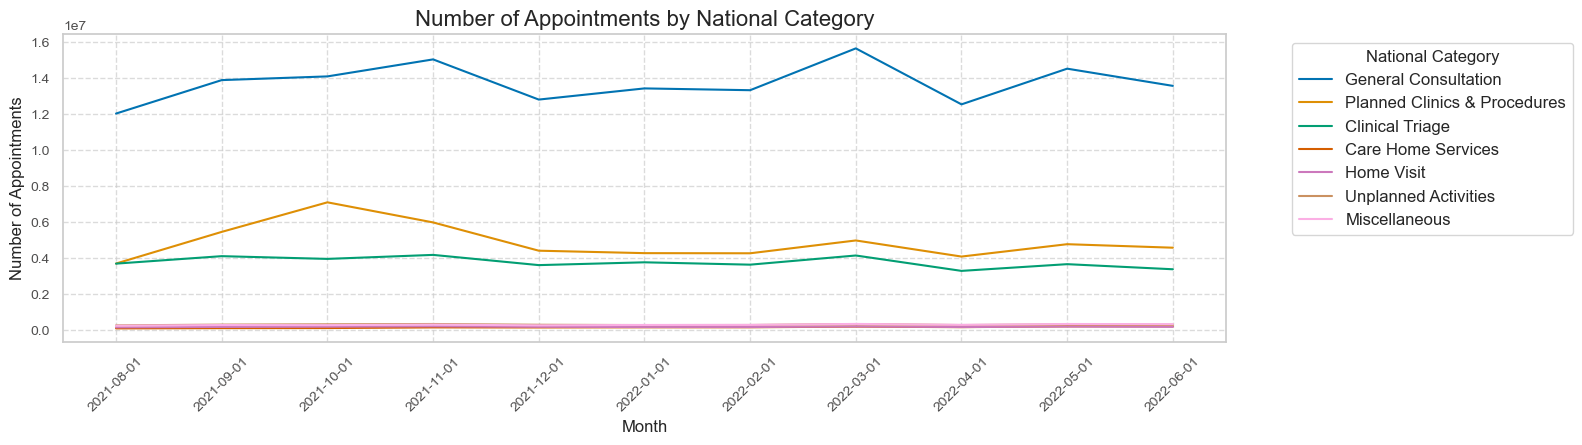

In [115]:
# Plot the combined category.
# Create a lineplot.
plt.figure(figsize=(15, 4))
legend_order = (['General Consultation', 'Planned Clinics & Procedures', 'Clinical Triage', 'Care Home Services',  'Home Visit', 
                'Unplanned Activities', 'Miscellaneous'])
sns.lineplot(x='appointment_month', y='count_of_appointments', palette='colorblind', hue='combined_category', data=nc_combined, errorbar=None, hue_order=legend_order)
plt.legend(title='National Category', bbox_to_anchor=(1.05, 1))
plt.title('Number of Appointments by National Category')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Save Figure.
plt.savefig('national_category_combined.png')

# Show plot
plt.show()

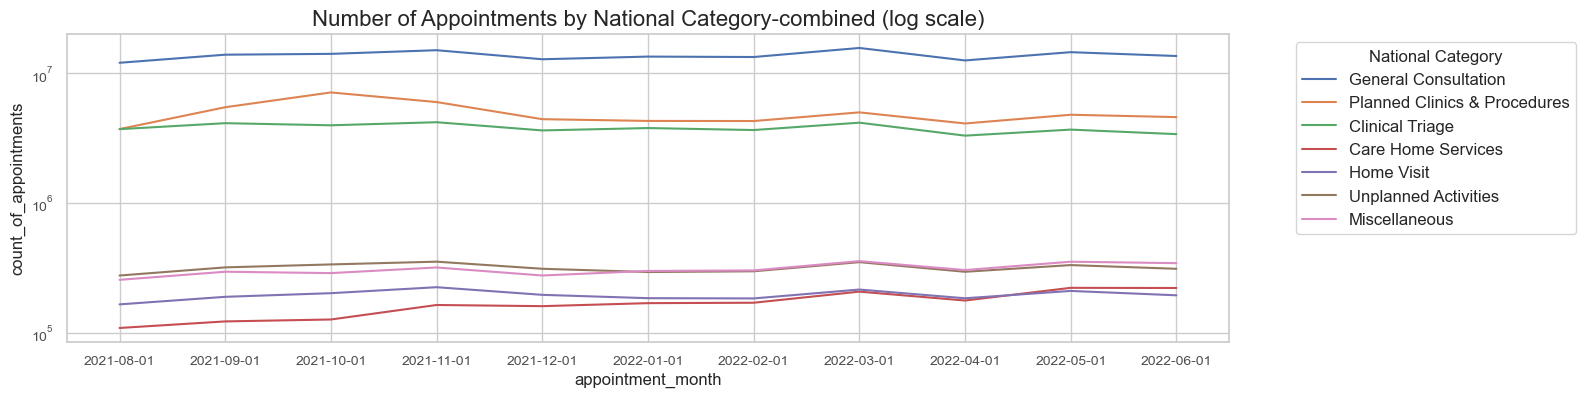

In [116]:
# Plot the combined category in log scale to be able to see the bottom lines.
# Create a lineplot.
plt.figure(figsize=(15, 4))
legend_order = (['General Consultation', 'Planned Clinics & Procedures', 'Clinical Triage', 'Care Home Services',  'Home Visit', 
                  'Unplanned Activities', 'Miscellaneous'])
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='combined_category', data=nc_combined, hue_order = legend_order)
plt.legend(title='National Category', bbox_to_anchor=(1.05, 1))
plt.yscale('log')
plt.title('Number of Appointments by National Category-combined (log scale)')
plt.show()

> The highest number of appointmnets are General Consultation (acute and the routine), with a peak in November and March. There is an increase in the number of planned clinics and procedures in October, when the general consultation is flat. 
>> I will investigate it more with daily granularity on the next session.

### Objective 2
Create four visualisations indicating the number of appointments for service setting per season.

The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

**Summer:**


In [120]:
# Create a separate data set that can be used in future weeks. Filter for summer months (August 2021 and June 2022)
# The | operator combines the conditions with an "or" operation.
nc_ss_day = nc.groupby(['appointment_date','appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the output.
nc_ss_day.head()

appointment_date appointment_month            service_setting  \
0       2021-08-01        2021-08-01  Extended Access Provision   
1       2021-08-01        2021-08-01           General Practice   
2       2021-08-01        2021-08-01                      Other   
3       2021-08-01        2021-08-01       Primary Care Network   
4       2021-08-01        2021-08-01                   Unmapped   

   count_of_appointments  
0                    438  
1                   3411  
2                    401  
3                    323  
4                   1054

<function matplotlib.pyplot.show(close=None, block=None)>

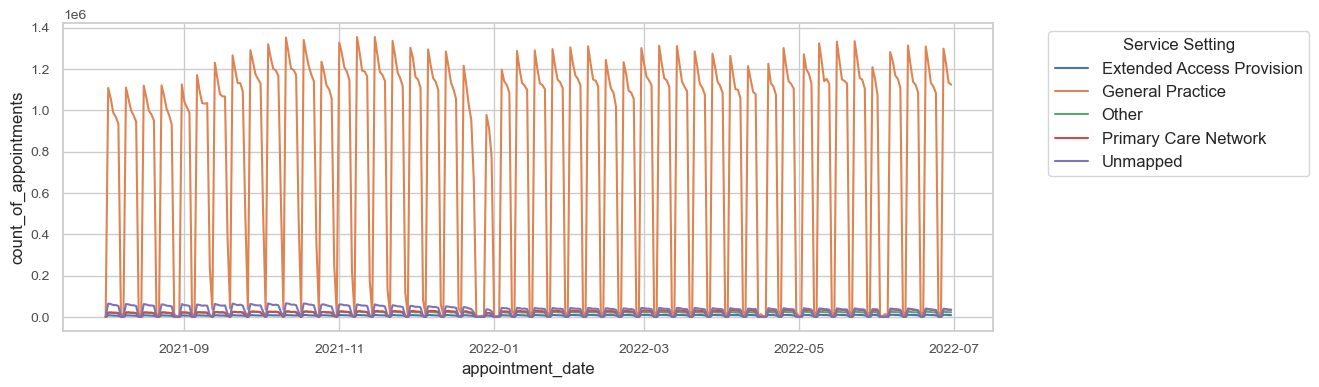

In [121]:
# Create a lineplot with the whole dataframe with daily granularity.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_day)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show

>We can see the weekends drop in the number of appointments and a big drop in January.

Let's have a close look by seasons:

**Summer:**

In [124]:
#Create a dataframe with summer period.
nc_ss_day_summer =  nc_ss_day[(nc_ss_day['appointment_date'] >= '2021-08-01') & (nc_ss_day['appointment_date'] <= '2021-08-31') ]
nc_ss_day_summer.head()

appointment_date appointment_month            service_setting  \
0       2021-08-01        2021-08-01  Extended Access Provision   
1       2021-08-01        2021-08-01           General Practice   
2       2021-08-01        2021-08-01                      Other   
3       2021-08-01        2021-08-01       Primary Care Network   
4       2021-08-01        2021-08-01                   Unmapped   

   count_of_appointments  
0                    438  
1                   3411  
2                    401  
3                    323  
4                   1054

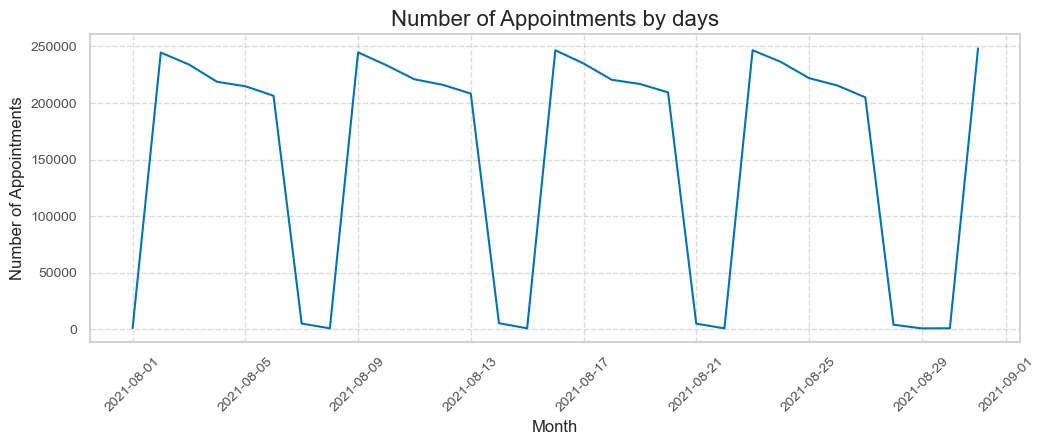

In [125]:
# Define the colorblind-friendly color
colorblind_color = sns.color_palette("colorblind")[0]  # Choose the first color from the colorblind palette

# Create a plot.
sns.lineplot(x='appointment_date', y='count_of_appointments', data=nc_ss_day_summer, color=colorblind_color, errorbar=None)
plt.title('Number of Appointments by days')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()
plt.show()

>nc dataset starts in August 2021, hence it has only 1 month in summer

**Autumn:**

In [128]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day_autumn =  nc_ss_day[(nc_ss_day['appointment_date'] >= '2021-09-01') & (nc_ss_day['appointment_date'] <= '2021-11-30')]

# View the output.
nc_ss_day_autumn.head()

appointment_date appointment_month            service_setting  \
155       2021-09-01        2021-09-01  Extended Access Provision   
156       2021-09-01        2021-09-01           General Practice   
157       2021-09-01        2021-09-01                      Other   
158       2021-09-01        2021-09-01       Primary Care Network   
159       2021-09-01        2021-09-01                   Unmapped   

     count_of_appointments  
155                   6916  
156                1041879  
157                  21796  
158                  21371  
159                  57423

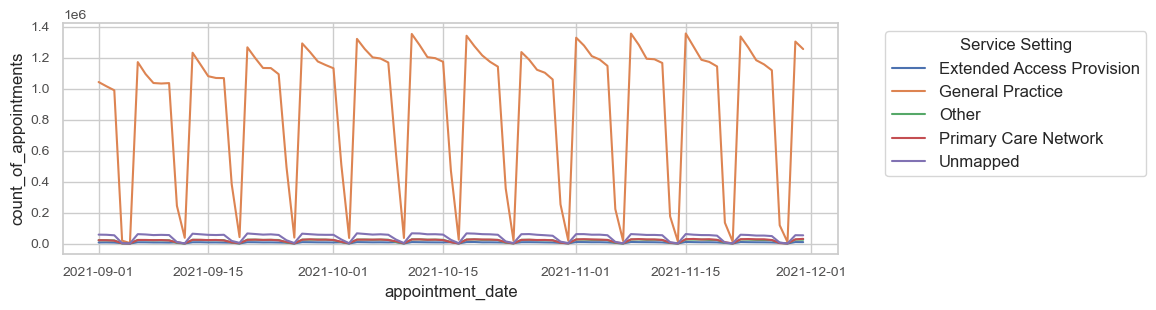

In [129]:
# Visualise the subset using a lineplot.
plt.figure(figsize=(10, 3))
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_day_autumn, errorbar=None)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Winter:**

In [131]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day_winter =  nc_ss_day[(nc_ss_day['appointment_date'] >= '2021-12-01') & (nc_ss_day['appointment_date'] <= '2022-02-28')]

# View the output.
nc_ss_day_winter.head()

appointment_date appointment_month            service_setting  \
610       2021-12-01        2021-12-01  Extended Access Provision   
611       2021-12-01        2021-12-01           General Practice   
612       2021-12-01        2021-12-01                      Other   
613       2021-12-01        2021-12-01       Primary Care Network   
614       2021-12-01        2021-12-01                   Unmapped   

     count_of_appointments  
610                   8500  
611                1162676  
612                  22924  
613                  26887  
614                  49064

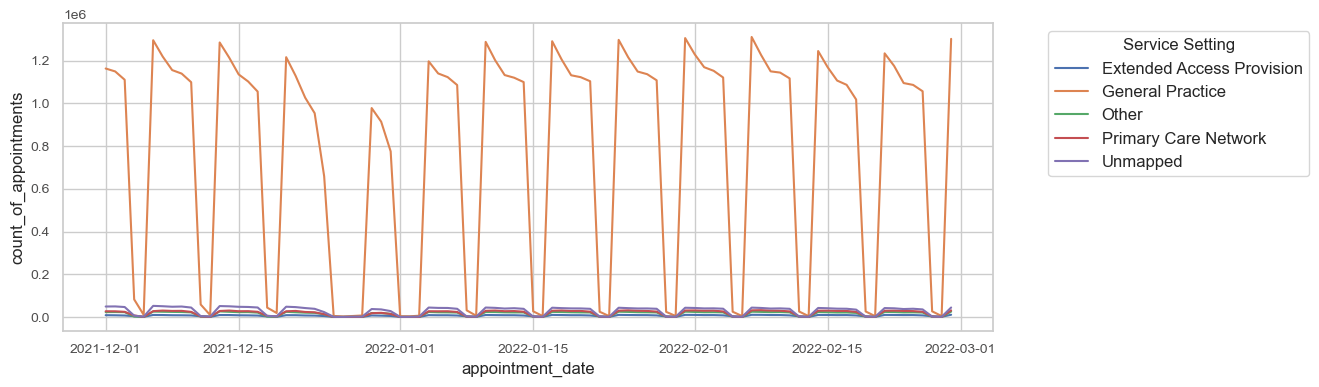

In [132]:
# Visualise the subset using a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments',hue='service_setting', data=nc_ss_day_winter, errorbar=None)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

>*We can see a drop on the second week of December. Probably it's linked to Christmas and New Year's holidays.*

> Is there a smaller demand, or there are less appointments available because the HC are on holidays or is it just less appointments because of the bank holidays?

**Spring:**

In [135]:
# Create a separate data set that can be used in future weeks. 
nc_ss_day_spring =  nc_ss_day[(nc_ss_day['appointment_date'] >= '2022-03-01') & (nc_ss_day['appointment_date'] <= '2022-05-30')]

# View the output.
nc_ss_day_spring.head()

appointment_date appointment_month            service_setting  \
1060       2022-03-01        2022-03-01  Extended Access Provision   
1061       2022-03-01        2022-03-01           General Practice   
1062       2022-03-01        2022-03-01                      Other   
1063       2022-03-01        2022-03-01       Primary Care Network   
1064       2022-03-01        2022-03-01                   Unmapped   

      count_of_appointments  
1060                  10082  
1061                1229045  
1062                  23986  
1063                  32070  
1064                  42682

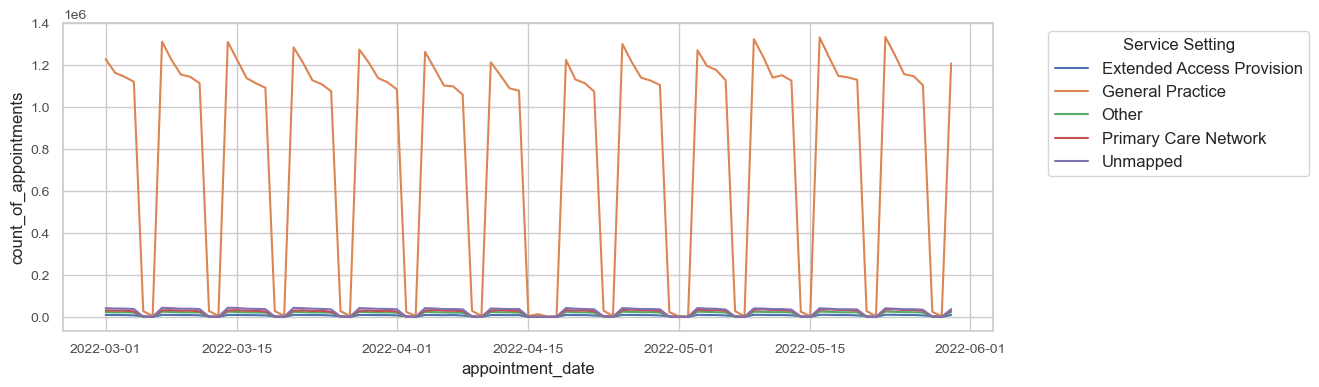

In [136]:
# Visualise the subset using a lineplot.
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='service_setting', data=nc_ss_day_spring, errorbar=None)
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

>*It looks like there is a pattern across all the seasons with a peak of appointments on the beginning of the week and then a drop on the weekend*

>I'd like to quantify it on a barplot.

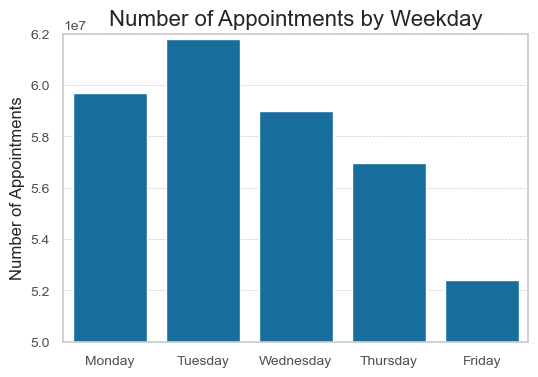

In [138]:
# Extract the day of the week using the weekday function which returns an integer representing the day of the week (Monday=0, Sunday=6)
nc_ss_day['weekday'] = nc_ss_day['appointment_date'].dt.weekday

# Group by weekday and sum the counts of appointments
weekday_counts = nc_ss_day.groupby('weekday')['count_of_appointments'].sum().reset_index()

# Define weekday names for labeling
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Filter data to include only Monday to Friday
weekday_counts_weekdays = weekday_counts[weekday_counts['weekday'].isin([0, 1, 2, 3, 4])]

# Define the colorblind-friendly color
colorblind_color = sns.color_palette("colorblind")[0]  # Choose the first color from the colorblind palette

# Plot the counts for each weekday (Monday to Friday)
plt.figure(figsize=(6, 4))
sns.barplot(x='weekday', y='count_of_appointments', data=weekday_counts_weekdays, color=colorblind_color)
plt.title('Number of Appointments by Weekday')
plt.xlabel(None)
plt.xticks(range(5), weekday_names)  # Set x-axis tick locations and labels
plt.ylabel('Number of Appointments')
plt.ylim(50000000, 62000000)  # Set y-axis limits

# Adding horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Save Figure
plt.savefig('weekday_appointments.png')

# Show plot
plt.show()

>Friday has nearly 10 million fewer appointments than Tuesday!

**I would like to see the day granularity on the nc subset in Autumn to investigate the increase of Planed clinics and procedures in October.**

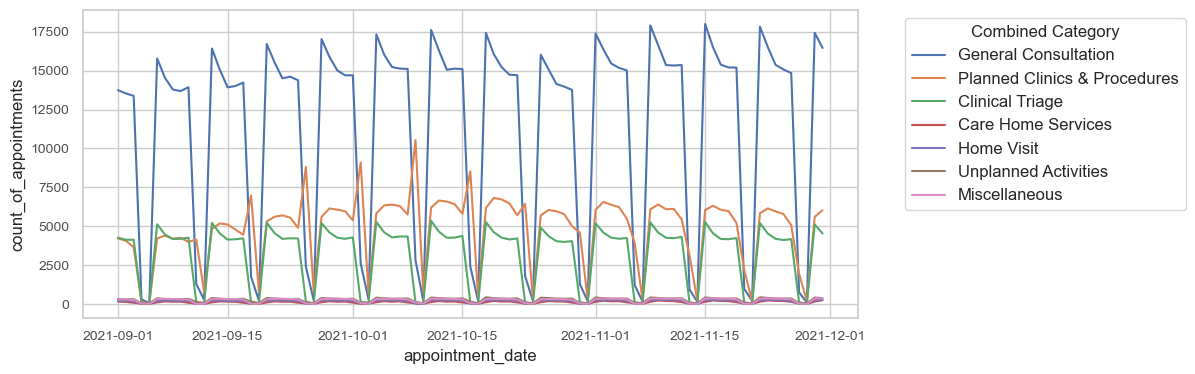

In [141]:
# Aggregate on a monthly level and determine the sum of records per month.
nc_combined_2 = nc_clean.groupby(['appointment_month', 'appointment_date','icb_ons_code', 'combined_category'])['count_of_appointments'].sum().reset_index()

# nc_combined_Autumn:
nc_combined_autumn =  nc_combined_2[(nc_combined_2['appointment_month'] >= '2021-09-01') & (nc_combined_2['appointment_month'] <= '2021-11-30')]

# Visualise the subset using a lineplot.
plt.figure(figsize=(10, 4))
legend_order = (['General Consultation', 'Planned Clinics & Procedures', 'Clinical Triage', 'Care Home Services',  'Home Visit', 
                  'Unplanned Activities', 'Miscellaneous'])
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='combined_category', data=nc_combined_autumn, hue_order=legend_order, errorbar=None)
plt.legend(title='Combined Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

> We can see the peak of appointments happening in the second week of October.

> I find this plot too busy though. I want to remove weekends.

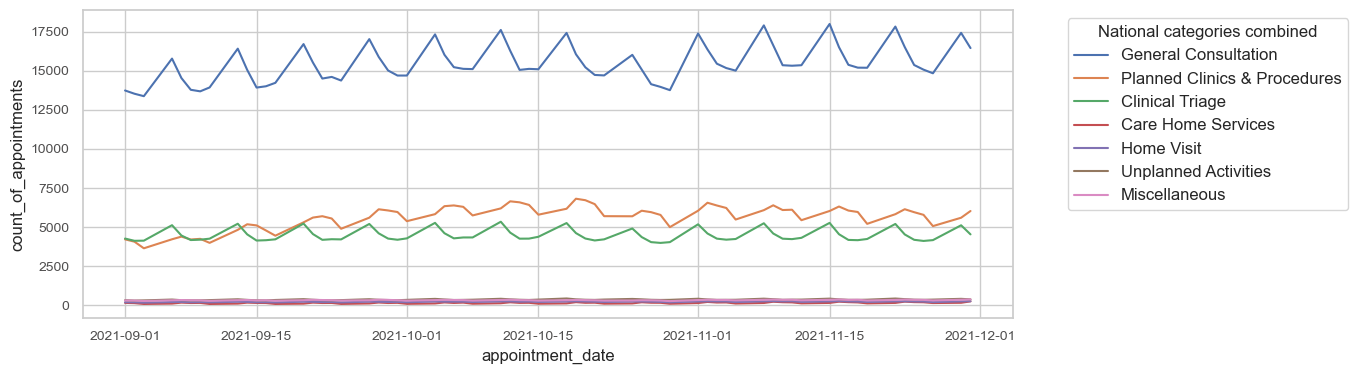

In [143]:
# Filter out weekends (Saturday and Sunday)
# dayofweek property returns the day of the week as an integer, where Monday is 0 and Sunday is 6.
nc_combined_autumn_weekdays = nc_combined_autumn[nc_combined_autumn['appointment_date'].dt.dayofweek <5]

# Plot the data without weekends
legend_order = (['General Consultation', 'Planned Clinics & Procedures', 'Clinical Triage', 'Care Home Services',  'Home Visit', 
                  'Unplanned Activities', 'Miscellaneous'])
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='combined_category', data=nc_combined_autumn_weekdays, hue_order=legend_order, errorbar=None)
plt.legend(title='National categories combined', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


>When Saturdays and Sundays were removed, the peak on the second week disapeared! So, I will remove Sunday only.

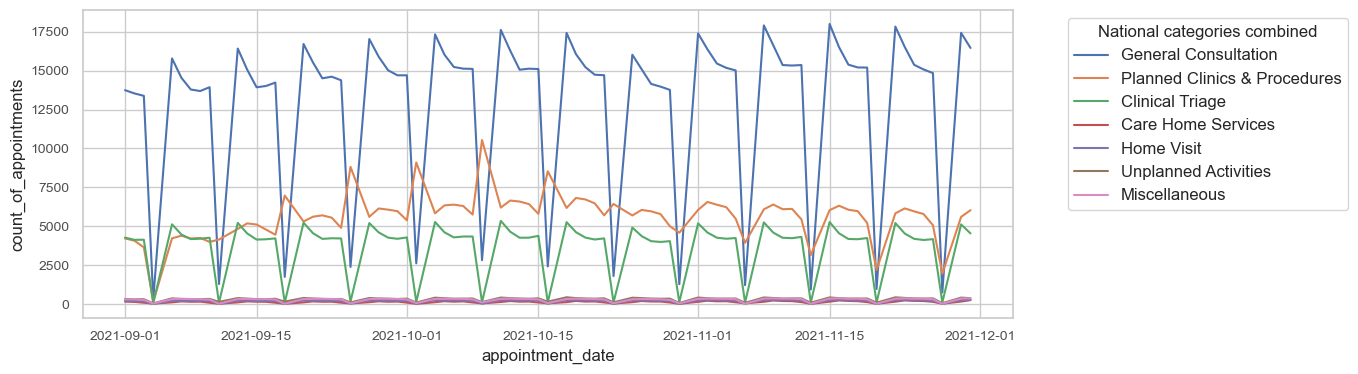

In [145]:
# Filter out Sunday
# dayofweek property returns the day of the week as an integer, where Monday is 0 and Sunday is 6.
nc_combined_autumn_weekdays = nc_combined_autumn[nc_combined_autumn['appointment_date'].dt.dayofweek <6]

# Plot the data without weekends
legend_order = (['General Consultation', 'Planned Clinics & Procedures', 'Clinical Triage', 'Care Home Services',  'Home Visit', 
                  'Unplanned Activities', 'Miscellaneous'])
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='combined_category', data=nc_combined_autumn_weekdays, hue_order=legend_order, errorbar=None)
plt.legend(title='National categories combined', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


>The peak is back, suggesting there are clinics on Saturdays.

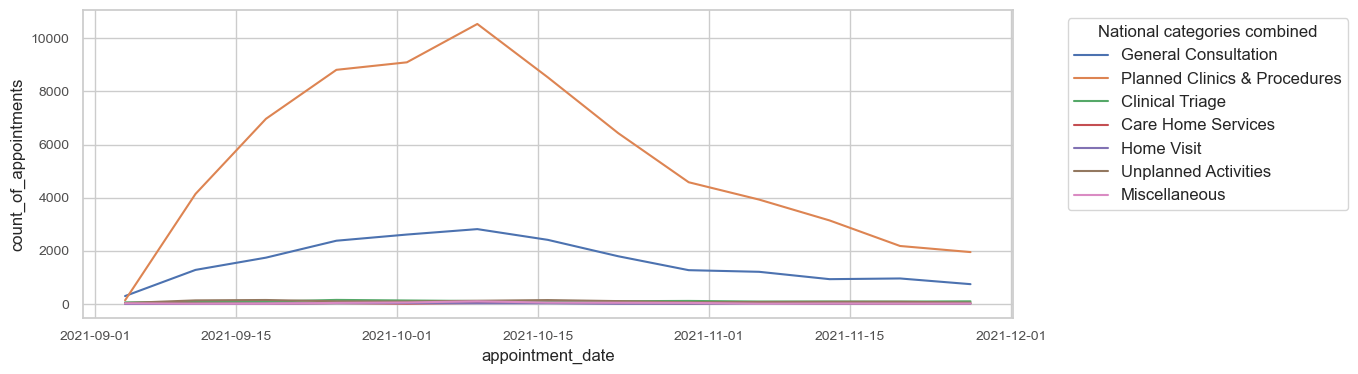

In [147]:
# Look at Saturday only.
# dayofweek property returns the day of the week as an integer, where Monday is 0 and Sunday is 6.
nc_combined_autumn_weekdays = nc_combined_autumn[nc_combined_autumn['appointment_date'].dt.dayofweek ==5]

# Plot the data without weekends
legend_order = (['General Consultation', 'Planned Clinics & Procedures', 'Clinical Triage', 'Care Home Services',  'Home Visit', 
                  'Unplanned Activities', 'Miscellaneous'])
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='combined_category', data=nc_combined_autumn_weekdays, hue_order=legend_order, errorbar=None)
plt.legend(title='National categories combined', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


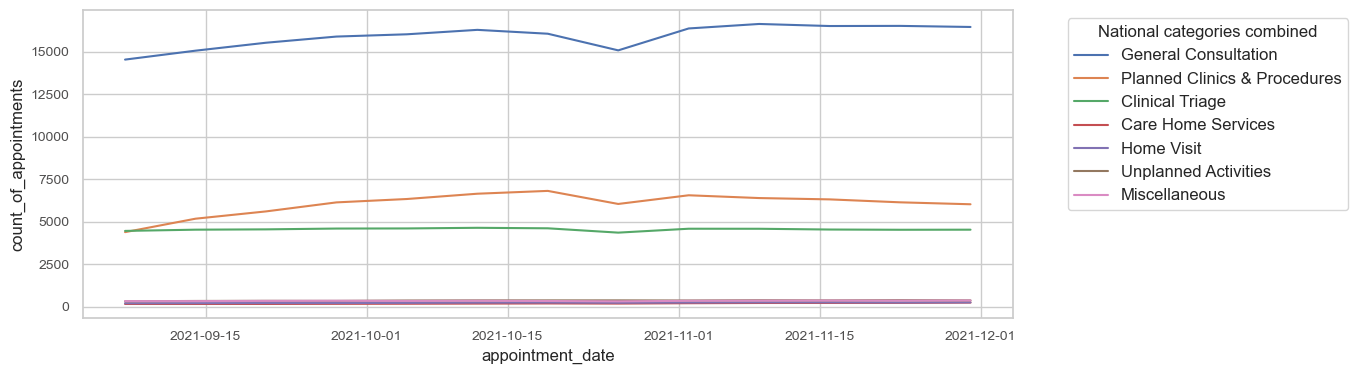

In [148]:
# Look at Monday only.
# dayofweek property returns the day of the week as an integer, where Monday is 0 and Sunday is 6.
nc_combined_autumn_weekdays = nc_combined_autumn[nc_combined_autumn['appointment_date'].dt.dayofweek ==1]

# Plot the data without weekends
legend_order = (['General Consultation', 'Planned Clinics & Procedures', 'Clinical Triage', 'Care Home Services',  'Home Visit', 
                  'Unplanned Activities', 'Miscellaneous'])
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='combined_category', data=nc_combined_autumn_weekdays, hue_order=legend_order, errorbar=None)
plt.legend(title='National categories combined', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


>Wow! I discovered that between September and October there are planned clinics and procedures! Really cool! 

>I also looked at every weekday (Changing the cell above) and there is no such increase on the planned clinics and procedures. So the increase on the dataset is due the clinics on Saturdays.


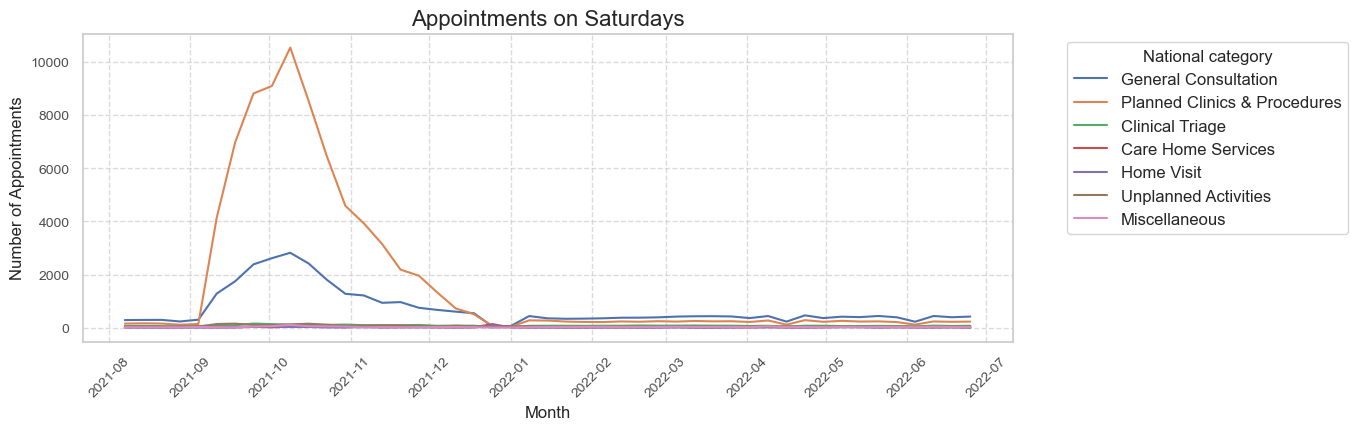

In [150]:
# Look at Saturday only on the whole dataset
# dayofweek property returns the day of the week as an integer, where Monday is 0 and Sunday is 6.
nc_saturday = nc_combined_2[nc_combined_2['appointment_date'].dt.dayofweek ==5]

legend_order = (['General Consultation', 'Planned Clinics & Procedures', 'Clinical Triage', 'Care Home Services',  'Home Visit', 
                  'Unplanned Activities', 'Miscellaneous'])

# Plot the data 
sns.lineplot(x='appointment_date', y='count_of_appointments', hue='combined_category', color='colorblind', data=nc_saturday, hue_order=legend_order, errorbar=None)
plt.legend(title='National category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Appointments on Saturdays')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Save Figure
plt.savefig('saturday_appointments.png')

# Show plot
plt.show()

> Saturdays clinics happened from September to January

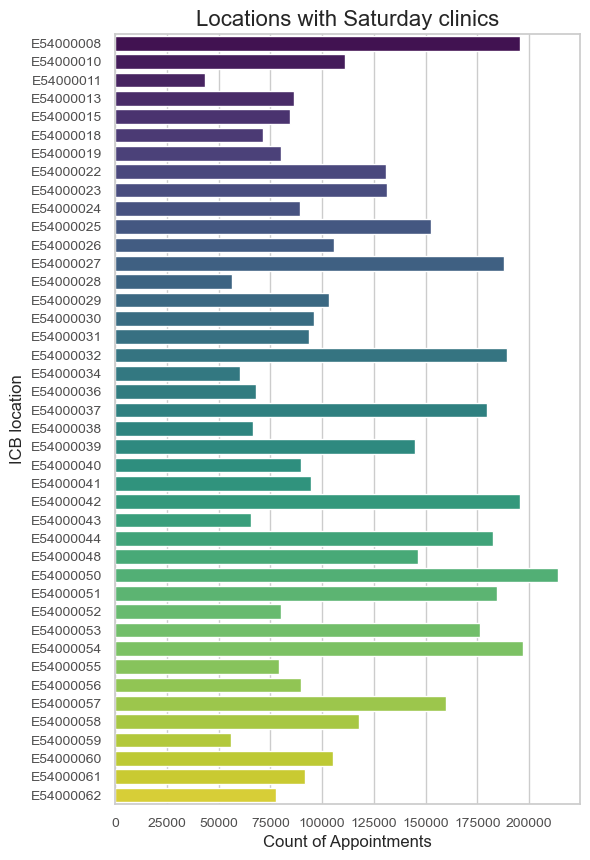

In [152]:
# Where does the Saturday clinics happen?

# Group by sub_icb_location_name and sum the count_of_appointments
spread_data = nc_saturday.groupby('icb_ons_code')['count_of_appointments'].sum().reset_index()

# Sort the data by count_of_appointments in descending order and select the top 20 rows
top_20_locations = spread_data.sort_values('count_of_appointments', ascending=False).head(20)

plt.figure(figsize=(6, 10))
sns.barplot(x='count_of_appointments', y='icb_ons_code', data=spread_data, palette='viridis')
plt.xlabel('Count of Appointments')
plt.ylabel('ICB location')
plt.title('Locations with Saturday clinics')
plt.show()

>Saturdays clinics happened all over the country on Autumn 2021. 

**I think the AR dataframe would be better for observing changes in the seasons, as it covers a span of 2.5 years.**

In [155]:
# Create a separate data set that can be used in future. 
ar_month = ar.groupby(['appointment_month','appointment_status'])['count_of_appointments'].sum().reset_index()

# View the output.
ar_month.head()

appointment_month appointment_status  count_of_appointments
0        2020-01-01           Attended               24538291
1        2020-01-01                DNA                1298269
2        2020-01-01            Unknown                1362736
3        2020-02-01           Attended               21640067
4        2020-02-01                DNA                1215154

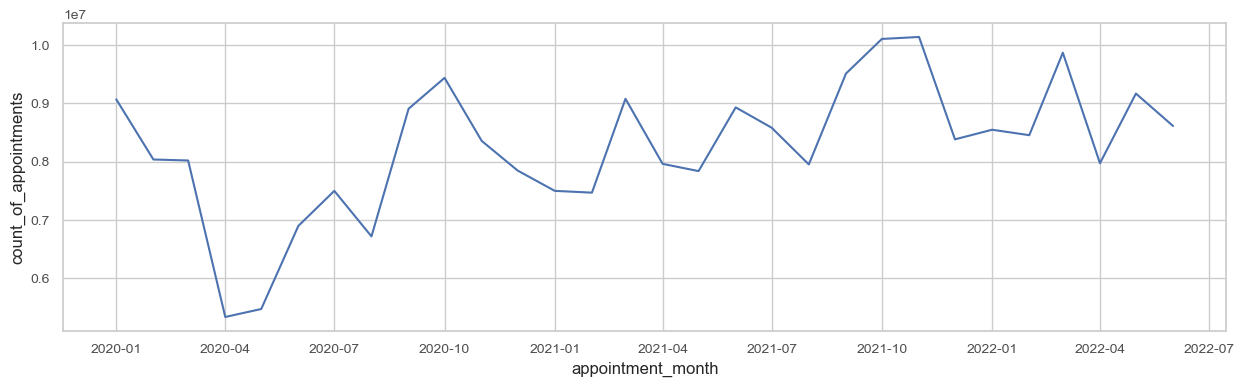

In [156]:
# Plot a line plot of the whole dataset
# Convert 'appointment_month' to datetime
ar_month['appointment_month'] = pd.to_datetime(ar_month['appointment_month'])

plt.figure(figsize=(15, 4))
sns.lineplot(x='appointment_month', y='count_of_appointments',errorbar=None, data=ar_month)
plt.show()

>I will shade it to see the seasons more clearly.

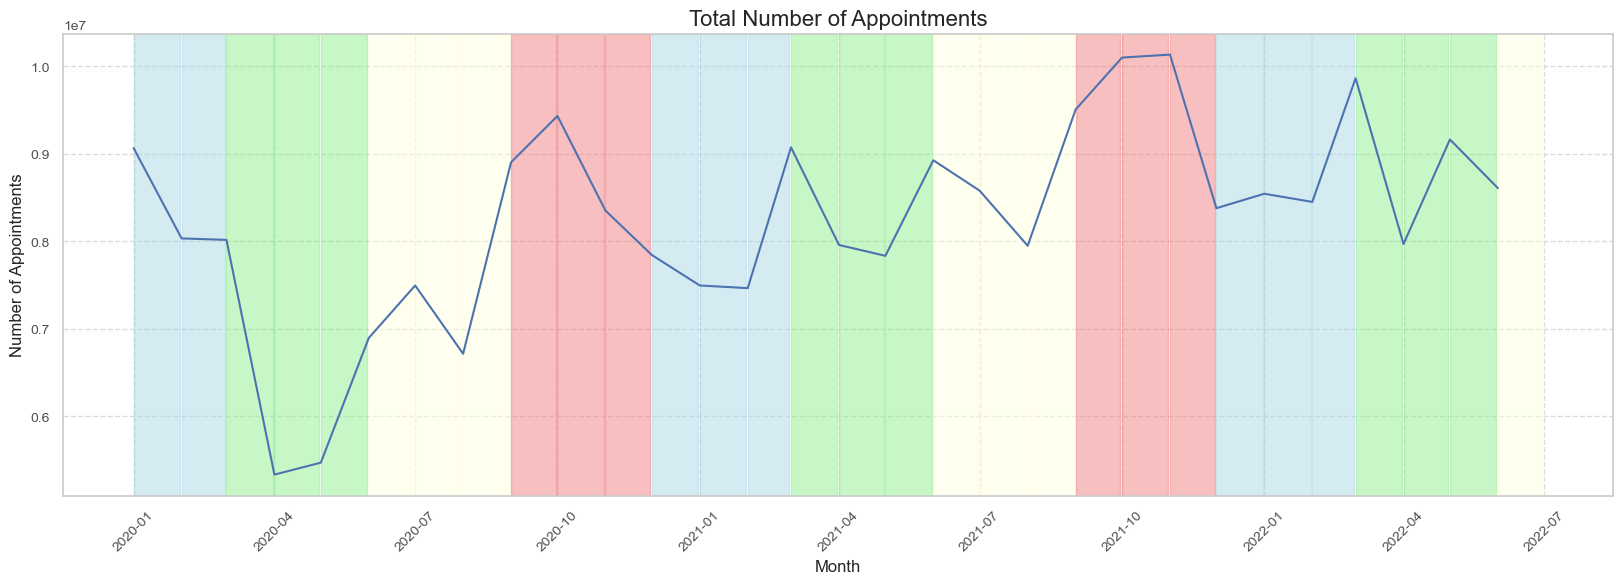

In [158]:
# Convert appointment_month to datetime
monthly_sum['appointment_month'] = pd.to_datetime(monthly_sum['appointment_month'])

# Create a simple lineplot.
plt.figure(figsize=(20, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', errorbar=None, data=ar_month)
plt.title('Total Number of Appointments')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')

# Define seasons
seasons = {
    'Summer': ('2020-06','2020-07','2020-08','2021-06','2021-07','2021-08', '2022-06'),
    'Autumn': ('2020-09', '2020-10', '2020-11', '2021-09', '2021-10', '2021-11'),
    'Winter': ('2020-01', '2020-02','2020-12', '2021-01', '2021-02','2021-12', '2022-01', '2022-02'),
    'Spring': ('2020-03', '2020-04', '2020-05','2021-03', '2021-04', '2021-05','2022-03', '2022-04', '2022-05')
}

# Define color palette for different seasons
season_palette = {'Winter': 'lightblue', 'Spring': 'lightgreen', 'Summer': 'lightyellow', 'Autumn': 'lightcoral'}

# Shade the background by season
for season, months in seasons.items():
    for month in months:
        plt.axvspan(pd.to_datetime(month), pd.to_datetime(month) + pd.offsets.MonthEnd(0), color=season_palette[season], alpha=0.5)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

> It appears that there is an increase in appointments in autumn, a decrease in winter, and a peak at the beginning of spring (except for spring 2020, which was an atypical year due to the COVID-19 pandemic). Following this, there is a decrease in the middle of spring, another peak at the beginning of summer, then a decrease, and finally the peak in autumn.

## 5) Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [162]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
print(tweets.shape)
print(tweets.dtypes)
print(tweets.columns)
tweets.head()

(1174, 10)
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object
Index(['tweet_id', 'tweet_full_text', 'tweet_entities',
       'tweet_entities_hashtags', 'tweet_metadata', 'tweet_retweet_count',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_retweeted',
       'tweet_lang'],
      dtype='object')


tweet_id                                    tweet_full_text  \
0  1567629223795527681  As Arkansas’ first Comprehensive Stroke Certif...   
1  1567582846612553728  RT @AndreaGrammer: Work-life balance is at the...   
2  1567582787070304256  RT @OntarioGreens: $10 billion can go a long w...   
3  1567582767625428992  RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...   
4  1567582720460570625  ICYMI: Our recent blogs on Cybersecurity in Ac...   

                                      tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices'...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indic...   
2  {'hashtags': [{'text': 'Healthcare', 'indices'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, ...   
4  {'hashtags': [{'text': 'blogs', 'indices': [18...   

                             tweet_entities_hashtags  \
0                                        #Healthcare   
1                            #PremiseHealth, #hiring   
2                                        #Healthcare   
3                                               #NEW   
4  #blogs, #digitaltransformation, #cybersecurity...   

                                      tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 're...                    0   
1  {'iso_language_code': 'en', 'result_type': 're...                    2   
2  {'iso_language_code': 'en', 'result_type': 're...                   39   
3  {'iso_language_code': 'en', 'result_type': 're...                    5   
4  {'iso_language_code': 'en', 'result_type': 're...                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4                     0            False            False         en

In [163]:
# Check for missing values.
tweets_na = tweets[tweets.isna().any(axis=1)]
tweets_na.shape

(167, 10)

In [164]:
# Explore the metadata and data set.
# To review metadata. Print a concise summary of a DataFrame.
tweets.info()

# Descriptive statistics.
tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


tweet_id  tweet_retweet_count  tweet_favorite_count
count  1.174000e+03          1174.000000            1174.00000
mean   1.567612e+18             8.629472               0.37138
std    2.427553e+13            29.784675               2.04470
min    1.567574e+18             0.000000               0.00000
25%    1.567590e+18             0.000000               0.00000
50%    1.567611e+18             1.000000               0.00000
75%    1.567633e+18             3.000000               0.00000
max    1.567655e+18           303.000000              42.00000

**Would it be useful to only look at retweeted and favourite tweet messages?**

I'm not sure. Retweets and favorites are indicators of engagement and popularity. Tweets that have been retweeted or favorited by other users suggest that they have resonated with the audience in some way. 

Analysing these tweets can provide insights into the topics or sentiments that are most popular or impactful within the conversation about the NHS on Twitter.

However,  certain viewpoints or voices may be overrepresented if they are more likely to be retweeted or favorited, leading to a biased representation of the conversation.

By excluding non-retweeted and non-favorited tweets, we may miss out on valuable insights and perspectives that are not as widely shared or endorsed by other users. This could result in a limited understanding of the diversity of opinions and experiences within the NHS Twitter community.

>*Analyzing retweeted and favorited tweets can offer valuable insights into popular content, influential users, and public sentiment, however, it's important to add a broader examination of the entire dataset to ensure a comprehensive understanding of the conversation about the NHS on Twitter.*

tweet_retweet_count
0    526
1    215
2    114
3     70
5     35
Name: count, dtype: int64


<Axes: >

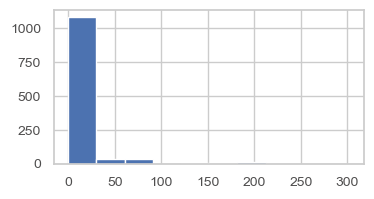

In [166]:
# Explore the tweet_retweet_count 
print(tweets['tweet_retweet_count'].value_counts().head())
plt.figure(figsize=(4, 2))
tweets['tweet_retweet_count'].hist()

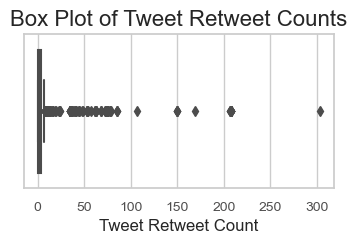

In [167]:
# Explore the tweet_retweet_count 
# Box plot for tweet retweet count
plt.figure(figsize=(4, 2))
sns.boxplot(x=tweets['tweet_retweet_count'])
plt.xlabel('Tweet Retweet Count')
plt.title('Box Plot of Tweet Retweet Counts')
plt.show()


tweet_favorite_count
0    1027
1      91
2      16
3      13
4       7
Name: count, dtype: int64


<Axes: >

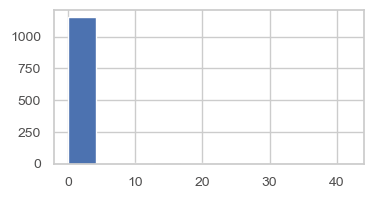

In [168]:
# Explore the tweet_favorite_count 
print(tweets['tweet_favorite_count'].value_counts().head())
plt.figure(figsize=(4, 2))
tweets['tweet_favorite_count'].hist()


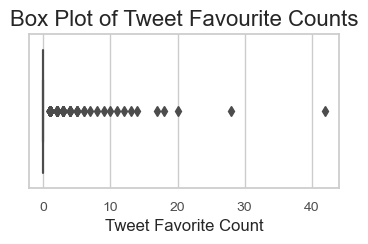

In [169]:
# Box plot for tweet retweet count for a better view.
plt.figure(figsize=(4, 2))
sns.boxplot(x=tweets['tweet_favorite_count'])
plt.xlabel('Tweet Favorite Count')
plt.title('Box Plot of Tweet Favourite Counts')
plt.show()


> The vast majority of Tweets are no retweeted nor marked as favorite. 
I'm curious about which one was favorited 30 and 40 times and retweeted 200 and 300 times.

In [171]:
# Create a new DataFrame containing only the text.
tweets_text = tweets['tweet_full_text']

# View the DataFrame.
print(tweets_text.head())
tweets_text.shape

0    As Arkansas’ first Comprehensive Stroke Certif...
1    RT @AndreaGrammer: Work-life balance is at the...
2    RT @OntarioGreens: $10 billion can go a long w...
3    RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies...
4    ICYMI: Our recent blogs on Cybersecurity in Ac...
Name: tweet_full_text, dtype: object


(1174,)

In [172]:
# Loop through the messages, and create a list of values containing the # symbol.
# Create a variable (tags), and assign an empty list to it.
tags = []

# The provided for loop is used to iterate through each tweet's full text, split it into individual words, and check if any word contains a hashtag (#).
# If it does, it appends the hashtag (converted to lowercase) to the tags list.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
            
# Create a Pandas Series to count the values in the list. Set the Series equal to tags.
tags_series = pd.Series(tags)

# Display the first 10 records.
print(tags_series.head(10))

0               #healthcare
1            #premisehealth
2                   #hiring
3               #healthcare
4                   🚨#new:🚨
5           look!\n\n#blogs
6    #digitaltransformation
7            #cybersecurity
8               #accounting
9                  #finance
dtype: object


In [173]:
# Convert the series to a DataFrame in preparation for visualisation.
data = tags_series.value_counts().reset_index()

# Rename the columns.
data.columns = ['word', 'count']

# View the dataFrame.
print(data.dtypes)
data.head()

word     object
count     int64
dtype: object


word  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38

In [174]:
# Fix the count datatype.
data['count'] = data['count'].astype(int)

# View the result.
print(data.dtypes)
print(data.shape)
data.head()

word     object
count     int64
dtype: object
(1754, 2)


word  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38

In [175]:
# Display records where the count is larger than 10.
filtered_data = data[data['count'] > 10]

# View the result.
print(filtered_data.shape)


(47, 2)


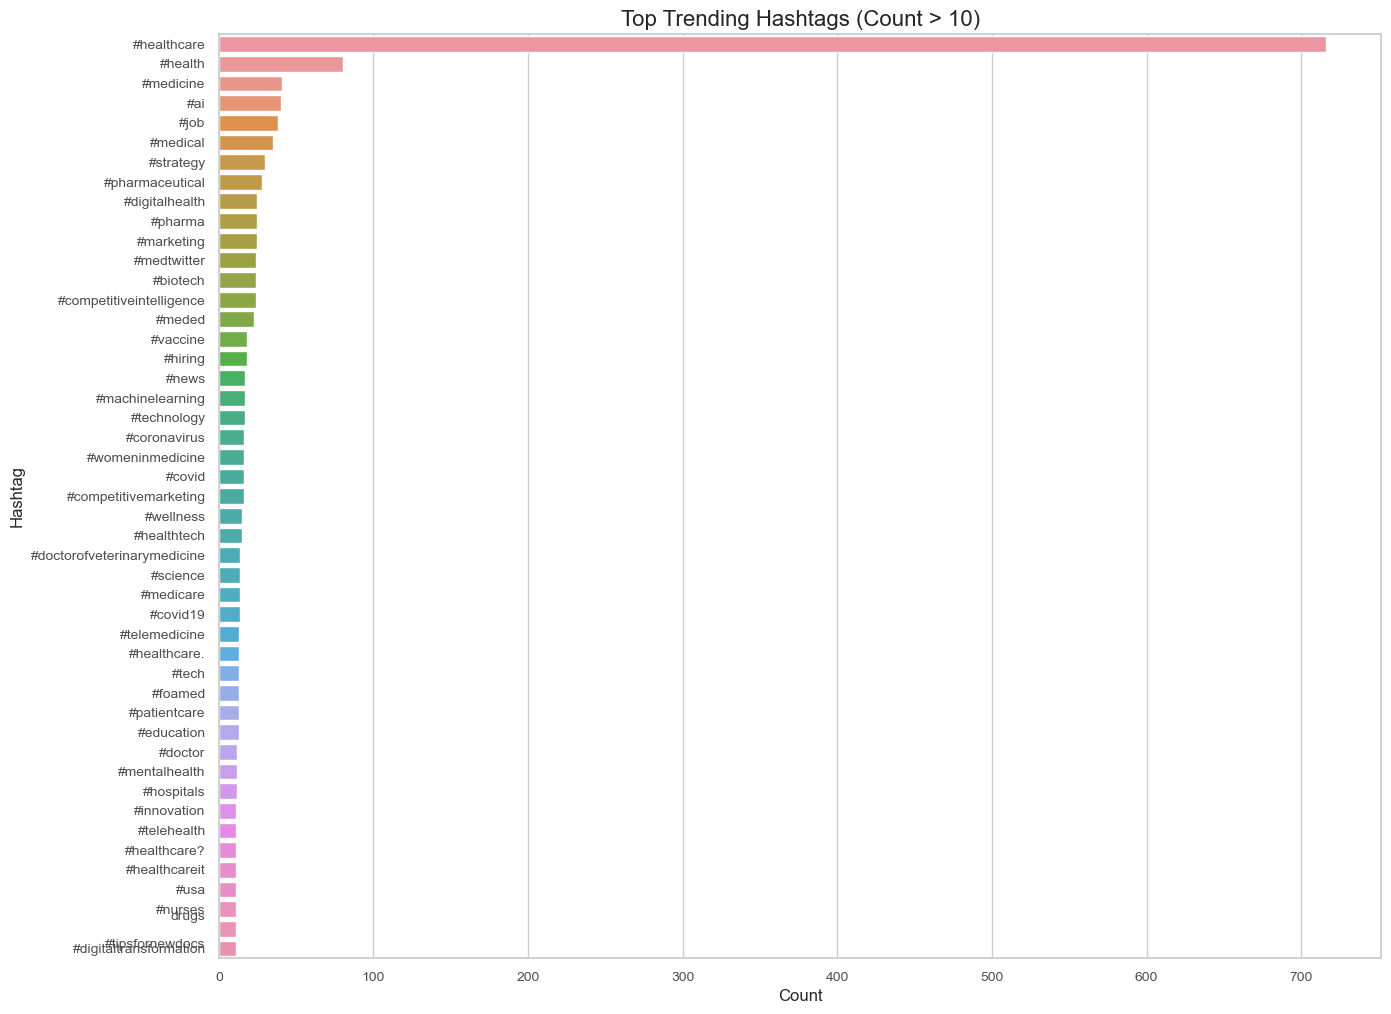

In [176]:
# Create a Seaborn barplot displaying records with a count larger than 10.
plt.figure(figsize=(15, 12))
sns.barplot(x='count', y='word', data=filtered_data)
plt.title('Top Trending Hashtags (Count > 10)')
plt.xlabel('Count')
plt.ylabel('Hashtag')

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200
plt.show()

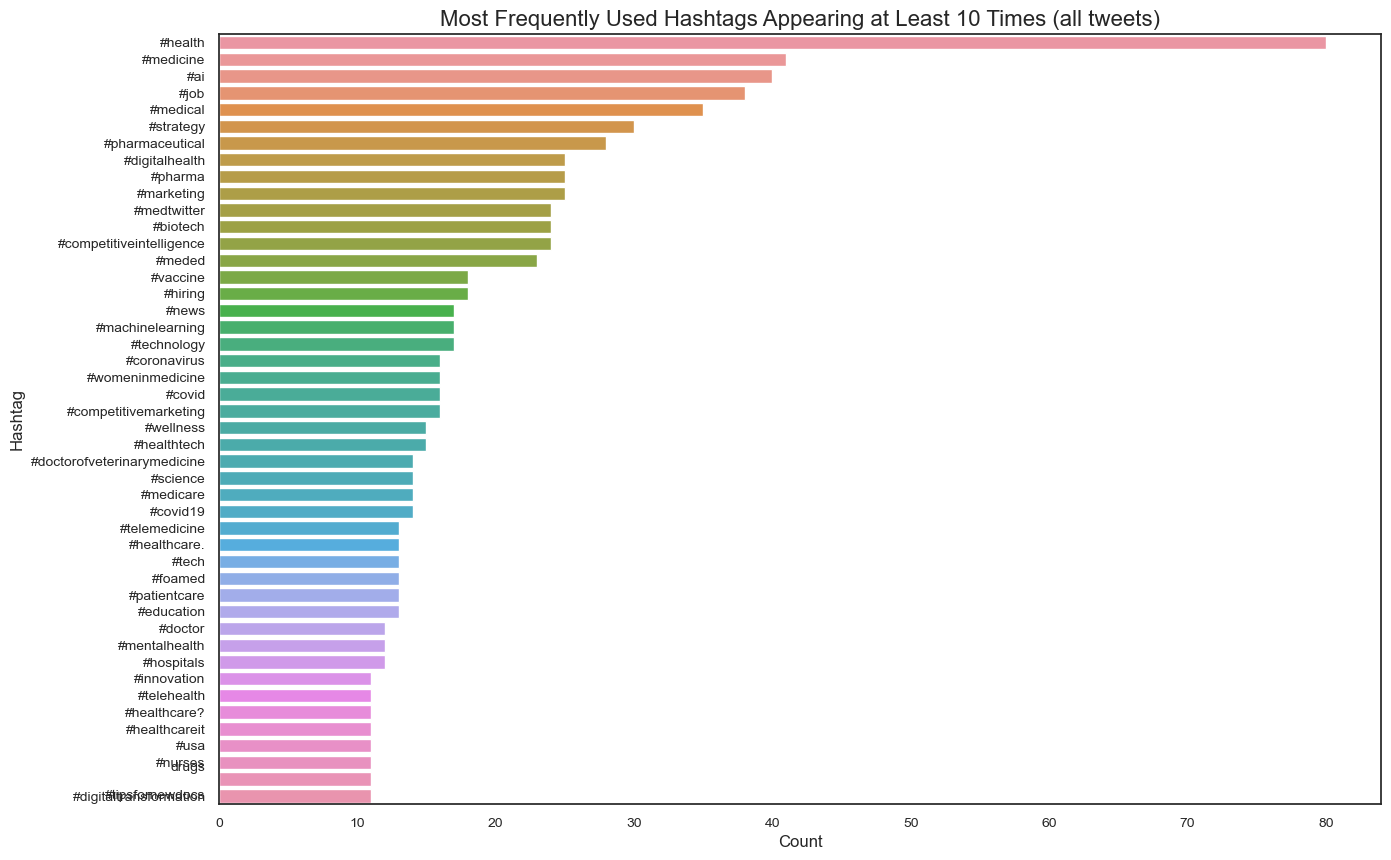

In [177]:
# Remove overrepresented hashtags and visualize the remaining most frequently used hashtags
# Here, you can apply your own criteria to remove overrepresented hashtags. For example, you can set a threshold.
threshold = 100  # Example threshold
remaining_data = filtered_data[filtered_data['count'] <= threshold]
plt.figure(figsize=(15, 10))
sns.barplot(x='count', y='word', data=remaining_data)
plt.title('Most Frequently Used Hashtags Appearing at Least 10 Times (all tweets)')
plt.xlabel('Count')
plt.ylabel('Hashtag')

plt.show()

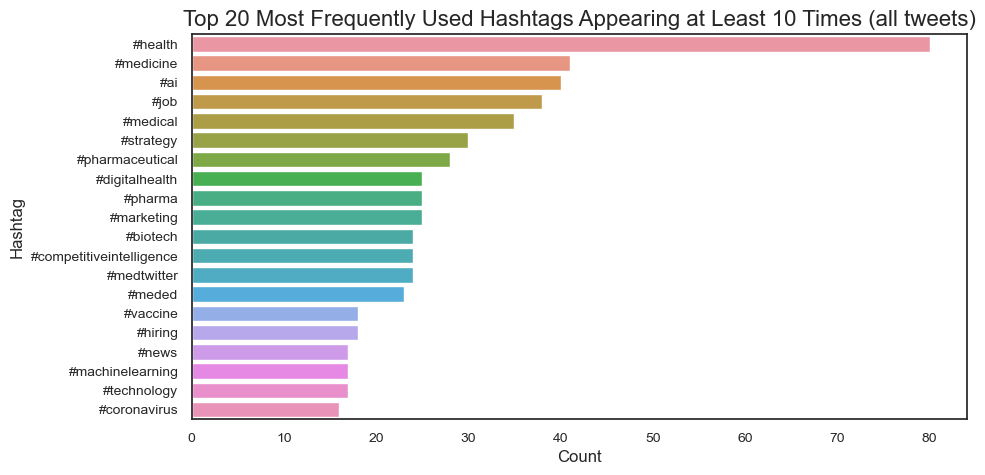

In [178]:
# Show first 20 tweets.
# Remove overrepresented hashtags based on threshold
threshold = 100  # Example threshold
remaining_data = filtered_data[filtered_data['count'] <= threshold]

# Sort the remaining_data DataFrame by 'count' column in descending order
sorted_data = remaining_data.sort_values(by='count', ascending=False)

# Select the top 20 most frequently used hashtags
top_20_data = sorted_data.head(20)

# Visualize the top 20 most frequently used hashtags
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=top_20_data)
plt.title('Top 20 Most Frequently Used Hashtags Appearing at Least 10 Times (all tweets)')
plt.xlabel('Count')
plt.ylabel('Hashtag')
plt.show()


In [179]:
# Filtering tweets based on retweet count or favorite count greater than 2
tweets_pop = tweets[(tweets['tweet_retweet_count'] > 2) | (tweets['tweet_favorite_count'] > 2)]
tweets_pop.shape

(343, 10)

In [180]:
# Create a new DataFrame containing only the text from popular df.
tweets_pop_text = tweets_pop['tweet_full_text']
tweets_pop_text.shape

# Loop through the messages, and create a list of values containing the # symbol.
# Create a variable (tags), and assign an empty list to it.
tags = []

# The provided for loop is used to iterate through each tweet's full text, split it into individual words, and check if any word contains a hashtag (#).
# If it does, it appends the hashtag (converted to lowercase) to the tags list.
for y in [x.split(' ') for x in tweets_pop['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
            tags.append(z.lower())
            
# Create a Pandas Series to count the values in the list. Set the Series equal to tags.
tags_series_pop = pd.Series(tags)

# Display the first 10 records.
print(tags_series_pop.head(10))

0                       #healthcare
1                           🚨#new:🚨
2                           🚨#new:🚨
3                     #disparities.
4        @karahartnett\n#healthcare
5                            #alert
6                        #insurance
7    #data\nhttps://t.co/h9hlamr7p9
8                       #healthcare
9                 ❤️\n\n#healthcare
dtype: object


In [181]:
# Convert the series to a DataFrame in preparation for visualisation.
data_pop = tags_series_pop.value_counts().reset_index()

# Rename the columns.
data_pop.columns = ['word', 'count']

# Fix the count datatype.
data_pop['count'] = data_pop['count'].astype(int)

# View the dataFrame.
print(data_pop.dtypes)
print(data_pop.shape)
data_pop.head()

word     object
count     int64
dtype: object
(293, 2)


word  count
0  #healthcare    126
1          #ai     29
2     #medical     22
3  #medtwitter     22
4       #meded     21

In [182]:
# Display records where the count is larger than 10.
filtered_data_pop = data_pop[data_pop['count'] > 10]

# View the result.
print(filtered_data_pop.shape)


(12, 2)


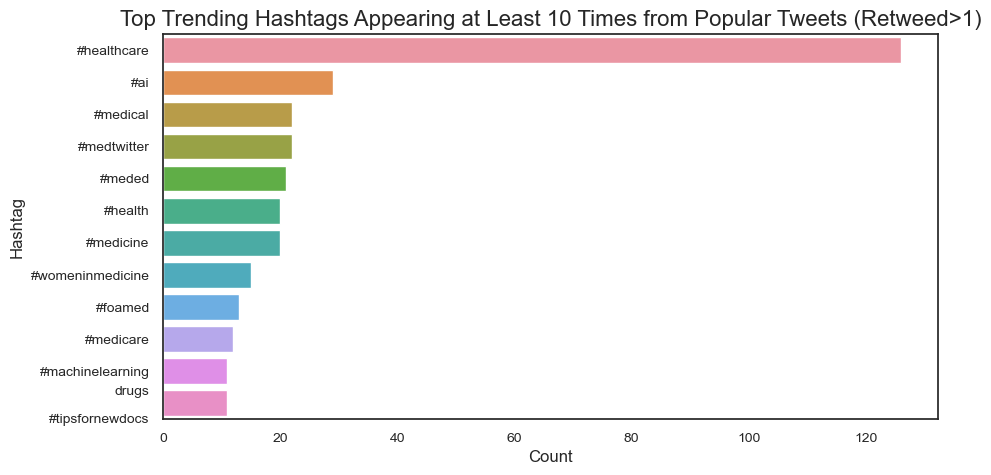

In [183]:
# Create a Seaborn barplot displaying records with a count larger than 10.
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=filtered_data_pop)
plt.title('Top Trending Hashtags Appearing at Least 10 Times from Popular Tweets (Retweed>1)')
plt.xlabel('Count')
plt.ylabel('Hashtag')

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200
plt.show()

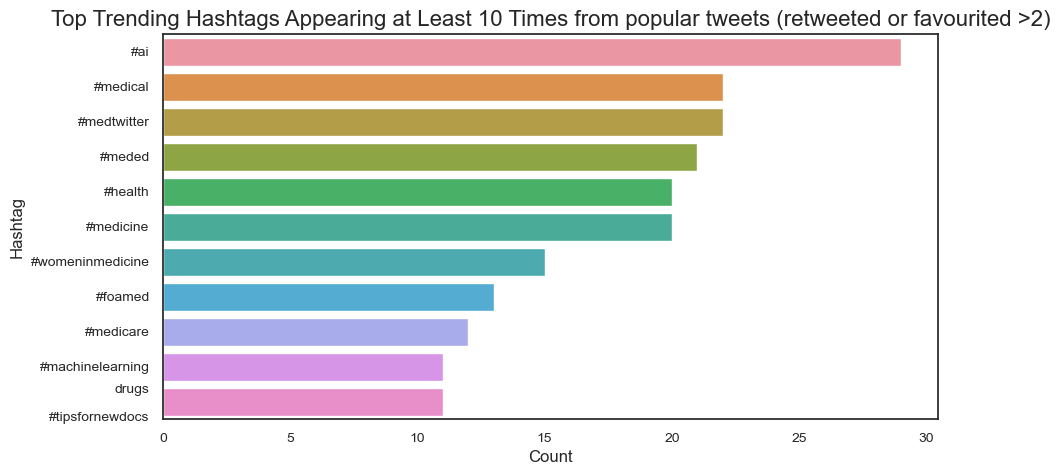

In [184]:
# Apply threshold to remove overrepresented hashtags
threshold = 100  # Example threshold
remaining_data = filtered_data_pop[filtered_data_pop['count'] <= threshold]

# Create a Seaborn barplot displaying records with a count larger than 10 and meeting the threshold criteria
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=remaining_data)
plt.title('Top Trending Hashtags Appearing at Least 10 Times from popular tweets (retweeted or favourited >2)')
plt.xlabel('Count')
plt.ylabel('Hashtag')

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200
plt.show()



>If I don't filter for retweets I get lots of marketing tweets, like #jobs, #strategy,# marketing. 

>If I filter for retweed more than 1x  I get more intereting tweets.

> However if I filter for more than 2x retweets I loose some important NSH hashtags, like digital  health and vaccine.

>>I think it means that NHS should improve their effort on promoting their businesses.

**Try to represent my findings with wordcloud**

In [187]:
# Instal wordcloud
# pip install wordcloud

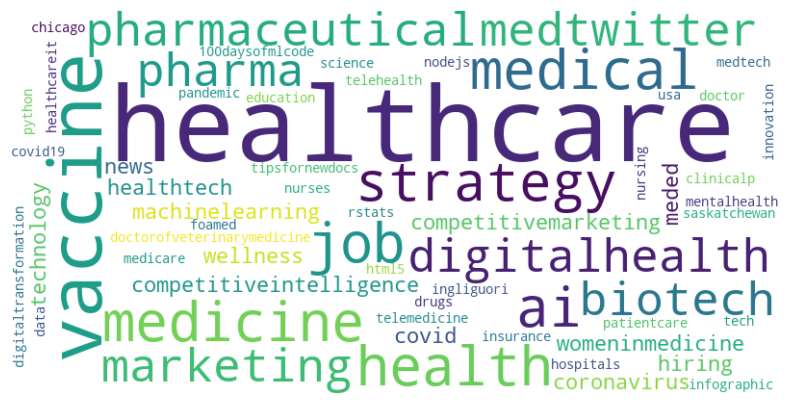

In [188]:
from wordcloud import WordCloud

# Filter the DataFrame to include only hashtags that appear at least 10 times
filtered_data = data[data['count'] >= 10]

# Convert your text data into a single string
text_filtered = " ".join(filtered_data['word'])

# Create a WordCloud object
wordcloud_filtered = WordCloud(width=800, height=400, background_color='white').generate(text_filtered)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()



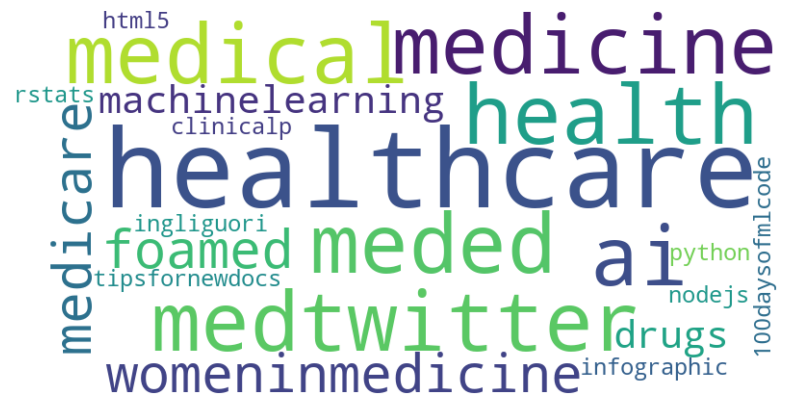

In [189]:
# Comparing to re-tweets
# Filter the DataFrame to include only hashtags that appear at least 10 times
filtered_data_pop = data_pop[data_pop['count'] >= 10]

# Convert your text data into a single string
text_filtered_pop = " ".join(filtered_data_pop['word'])

# Create a WordCloud object
wordcloud_filtered = WordCloud(width=800, height=400, background_color='white').generate(text_filtered_pop)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_filtered, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()

After reading the website: https://www.businessnewsdaily.com/7488-twitter-for-business.html


1. Utilizing tweets to provide feedback to stakeholders:

- Analyze sentiment: Use sentiment analysis tools to categorize tweets as positive, negative, or neutral. This can help stakeholders understand public perception and address any issues or concerns raised by users.
- Monitor mentions: Track mentions of your brand or product to identify areas where improvements are needed. Addressing customer concerns and feedback publicly on Twitter can demonstrate responsiveness and improve brand reputation.
- Determining if tweets add value to the overall project:

2. Measure engagement metrics: 
- Evaluate metrics such as retweets, likes, and replies to assess the level of engagement with tweets. Higher engagement rates indicate that tweets are resonating with the audience and adding value to the project.
- Track conversions: Use tracking tools to monitor how tweets contribute to website traffic, leads, or sales. Analyzing conversion data can help determine the effectiveness of Twitter marketing efforts.

3. How the NHS can utilize tweets:
- Public health awareness: Share information about health initiatives, disease prevention, and public health campaigns to educate and engage the public.
- Crisis communication: Use Twitter to disseminate important updates during health emergencies or outbreaks, providing timely information and guidance to the community.
- Customer support: Respond to inquiries, provide support, and address concerns raised by patients or the public, demonstrating a commitment to patient care and satisfaction.

4. Suggestions for data collection or analysis to improve future efforts:
- Audience segmentation: Analyze Twitter data to identify different audience segments based on demographics, interests, or behaviors. Tailor content and messaging to better target these segments.
- Content optimization: Monitor the performance of different types of content (e.g., articles, videos, infographics) to understand what resonates best with your audience. Use this insight to optimize future content strategy.
- Competitive analysis: Track competitors' Twitter activity and performance to identify trends, gaps, and opportunities. Learn from their successes and failures to refine your own Twitter strategy.

**Try Vader for sentiment analysis**

In [192]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kylef/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

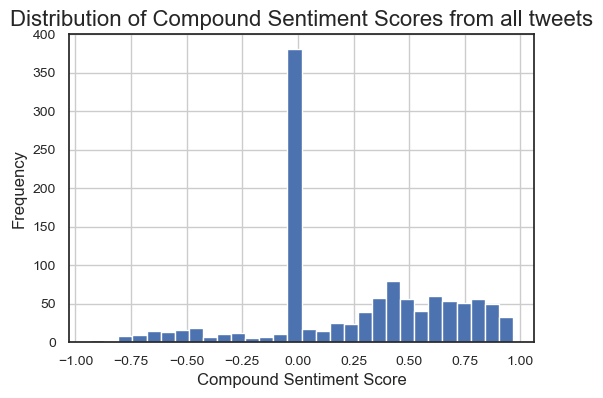

In [193]:
# Instantiate the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each tweet's text
sentiment_scores = tweets_text.apply(lambda x: sid.polarity_scores(str(x)))

# Convert the Series of dictionaries into a DataFrame
sentiment_scores_df = pd.DataFrame(list(sentiment_scores))

# Add sentiment scores to the DataFrame
tweets_text = pd.concat([tweets_text, sentiment_scores_df], axis=1)

# Plot histogram of compound sentiment scores in all tweets
plt.figure(figsize=(6, 4))
plt.hist(tweets_text['compound'], bins=30)
plt.title('Distribution of Compound Sentiment Scores from all tweets')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



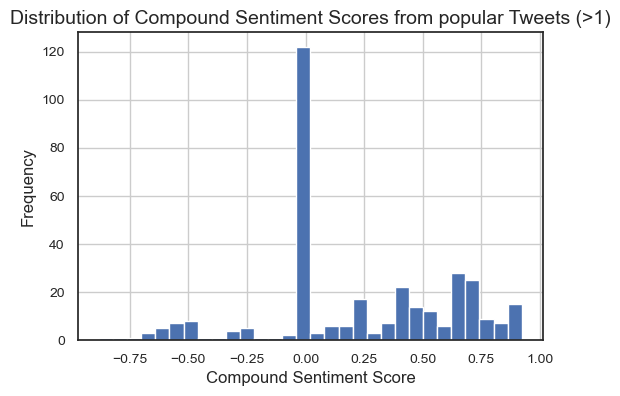

In [194]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each tweet's text
sentiment_scores = tweets_pop_text.apply(lambda x: sid.polarity_scores(str(x)))

# Convert the Series of dictionaries into a DataFrame
sentiment_scores_df = pd.DataFrame(list(sentiment_scores))

# Add sentiment scores to the DataFrame
tweets_pop_text = pd.concat([tweets_pop_text, sentiment_scores_df], axis=1)

# Plot histogram of compound sentiment scores in popular tweets (>1)
plt.figure(figsize=(6, 4))
plt.hist(tweets_pop_text['compound'], bins=30)
plt.title('Distribution of Compound Sentiment Scores from popular Tweets (>1)', fontsize=14)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Try Text blob for sentiment analysis**

In [196]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


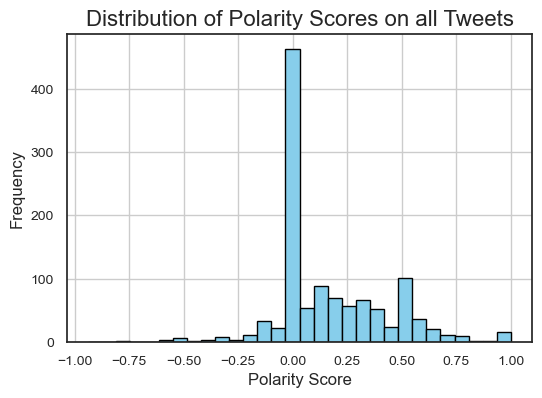

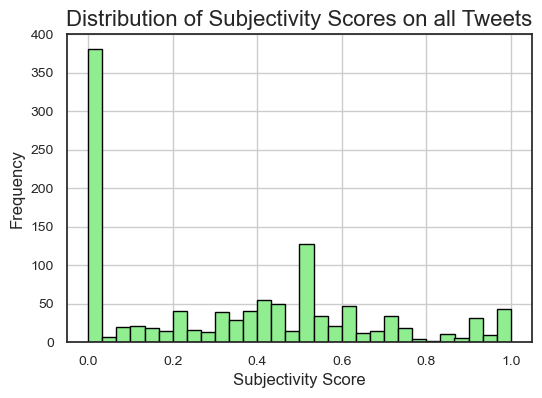

In [197]:
from textblob import TextBlob

# Perform sentiment analysis on each tweet's text
sentiment_scores = tweets['tweet_full_text'].apply(lambda x: TextBlob(x).sentiment)

# Extract polarity and subjectivity scores
polarity_scores = sentiment_scores.apply(lambda x: x.polarity)
subjectivity_scores = sentiment_scores.apply(lambda x: x.subjectivity)

# Add sentiment scores to the DataFrame
tweets['polarity'] = polarity_scores
tweets['subjectivity'] = subjectivity_scores

# Plot histogram of polarity scores
plt.figure(figsize=(6, 4))
plt.hist(tweets['polarity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores on all Tweets')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram of subjectivity scores
plt.figure(figsize=(6, 4))
plt.hist(tweets['subjectivity'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Subjectivity Scores on all Tweets')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

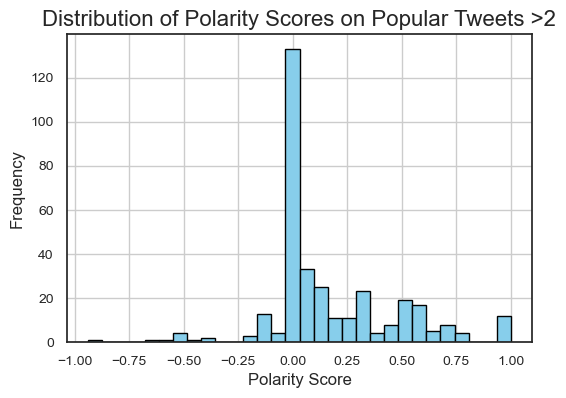

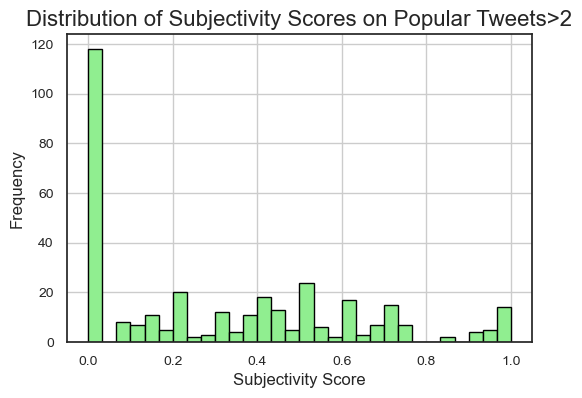

In [198]:
# Perform sentiment analysis on each popular tweet's text
sentiment_scores = tweets_pop['tweet_full_text'].apply(lambda x: TextBlob(x).sentiment)

# Extract polarity and subjectivity scores
polarity_scores = sentiment_scores.apply(lambda x: x.polarity)
subjectivity_scores = sentiment_scores.apply(lambda x: x.subjectivity)

# Add sentiment scores to the DataFrame
tweets_pop['polarity'] = polarity_scores
tweets_pop['subjectivity'] = subjectivity_scores

# Plot histogram of polarity scores
plt.figure(figsize=(6, 4))
plt.hist(tweets_pop['polarity'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Polarity Scores on Popular Tweets >2')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram of subjectivity scores
plt.figure(figsize=(6, 4))
plt.hist(tweets_pop['subjectivity'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Subjectivity Scores on Popular Tweets>2')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

>**Observations:**

# 

## 6) Assignment activity 6
In the final module you will answer additional questions from the NHS as well as additional questions and observations you identified. Make sure to revisit previous sections that may provide useful insights to the questions posed in Module 6 where required.

### Investigate the main concerns posed by the NHS. 

In [203]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_filtered = ar[ar['appointment_month'] >= '2021-08']
ar_filtered.head()

icb_ons_code appointment_month appointment_status hcp_type  \
3652    E54000034        2021-08-01           Attended       GP   
3653    E54000034        2021-08-01           Attended       GP   
3654    E54000034        2021-08-01           Attended       GP   
3655    E54000034        2021-08-01           Attended       GP   
3656    E54000034        2021-08-01           Attended       GP   

     appointment_mode time_between_book_and_appointment  count_of_appointments  
3652     Face-to-Face                             1 Day                   6553  
3653     Face-to-Face                    15  to 21 Days                   2390  
3654     Face-to-Face                       2 to 7 Days                  10547  
3655     Face-to-Face                    22  to 28 Days                    937  
3656     Face-to-Face                     8  to 14 Days                   4961

**Question 1:** Should the NHS start looking at increasing staff levels? 

In [205]:
# Create an aggregated data set to review the different features.
ar_agg = ar_filtered.groupby(['appointment_month', 'appointment_status', 'hcp_type','appointment_mode', 'time_between_book_and_appointment'])\
.sum()['count_of_appointments']\
.reset_index()

# View the DataFrame.
ar_agg.head()

appointment_month appointment_status hcp_type appointment_mode  \
0        2021-08-01           Attended       GP     Face-to-Face   
1        2021-08-01           Attended       GP     Face-to-Face   
2        2021-08-01           Attended       GP     Face-to-Face   
3        2021-08-01           Attended       GP     Face-to-Face   
4        2021-08-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                 507835  
1                    15  to 21 Days                 194726  
2                       2 to 7 Days                 959486  
3                    22  to 28 Days                 102111  
4                     8  to 14 Days                 398772

> Aggregating the DataFrame to review the different features as suggested, is very pratical, because I could use it to draw all the plots. However, I am grouping the data by multiple columns: 'appointment_month', 'appointment_status', 'hcp_type', 'appointment_mode', and 'time_between_book_and_appointment'. Then summing up the 'count_of_appointments' for each group.

> As a result, the count of appointments for each group represents the total count of appointments that satisfy all the conditions specified in the groupby operation. Hence, the resulting counts will be smaller due to the finer granularity of the grouping.

> I've done the comparison (and deleted it for better readability) and realised that the shape is exacly the same, just the number is smaller. So I decided do use it as suggested.

In [207]:
# Determine the total number of appointments per month.
ar_df = ar_filtered.groupby(['appointment_month'])\
.sum()['count_of_appointments']\
.reset_index()\

# View the DataFrame.
ar_df.head()

appointment_month  count_of_appointments
0        2021-08-01               23852171
1        2021-09-01               28522501
2        2021-10-01               30303834
3        2021-11-01               30405070
4        2021-12-01               25140776

In [208]:
# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['utilisation'] = ar_df['count_of_appointments']/30

# Round the utilisation to one decimal place
ar_df['utilisation'] = ar_df['utilisation'].round(1)

# Since we know the vast majority of appointmets are monday to Friday. Let's considering that the average of working days is 24.
# Monthly aggregate / 24 to get to a daily value.
ar_df['utilisation_2'] = ar_df['count_of_appointments']/24

# Round the utilisation to one decimal place
ar_df['utilisation_2'] = ar_df['utilisation_2'].round(1)

# View the DataFrame.
ar_df.head()

appointment_month  count_of_appointments  utilisation  utilisation_2
0        2021-08-01               23852171     795072.4       993840.5
1        2021-09-01               28522501     950750.0      1188437.5
2        2021-10-01               30303834    1010127.8      1262659.8
3        2021-11-01               30405070    1013502.3      1266877.9
4        2021-12-01               25140776     838025.9      1047532.3

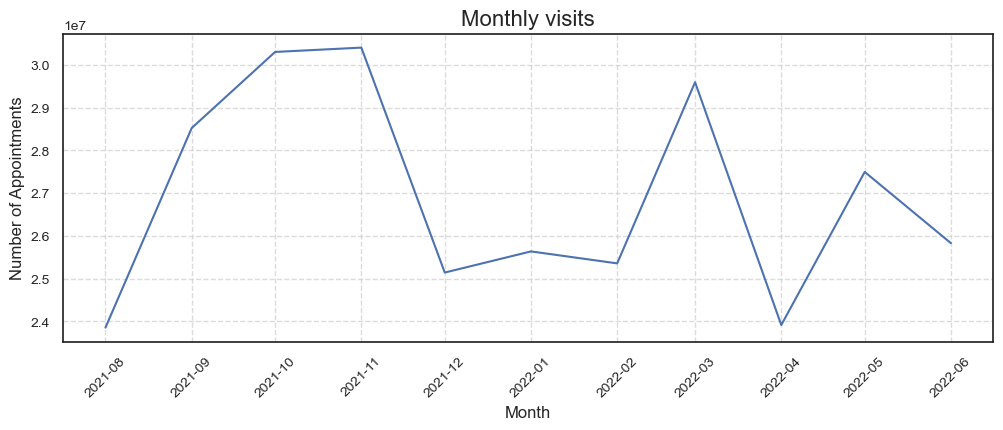

In [209]:
# Plot sum of count of monthly visits.
# Create a lineplot with Seaborn.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_df)
plt.title("Monthly visits")

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

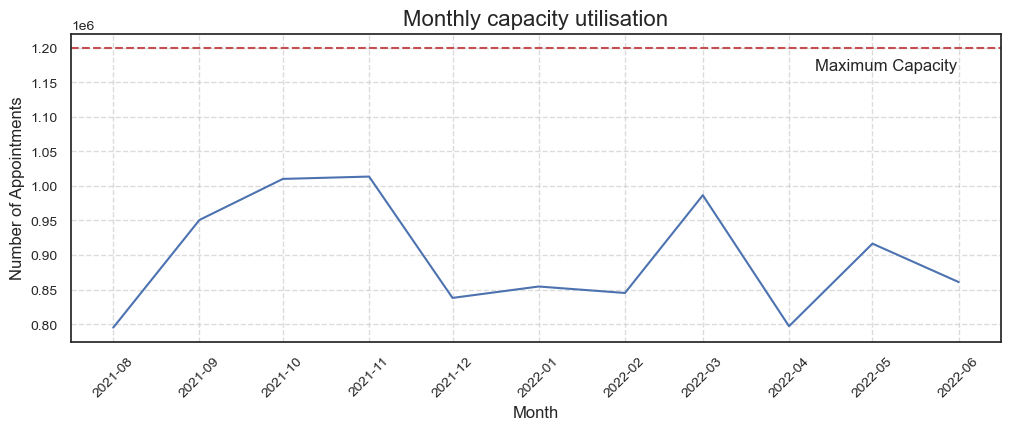

In [210]:
# Create the line plot with the capacity
ax=sns.lineplot(x='appointment_month', y='utilisation', data=ar_df)

# Add annotation lines. The NHS has provided a figure of an average of 1,200,000 as maximum capacity.
plt.axhline(y=1200000, color='r', linestyle='--')
plt.text(0.8,0.92, "Maximum Capacity", verticalalignment='top', transform=ax.transAxes)

# Add title and labels
plt.title("Monthly capacity utilisation")
plt.xlabel("Appointment Month")
plt.ylabel("Utilisation")

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

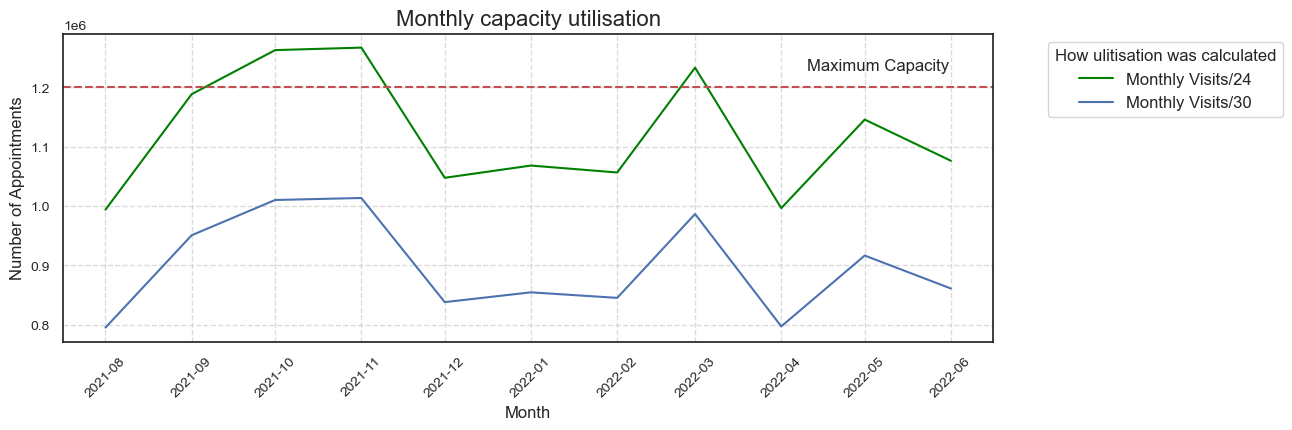

In [211]:
# Exploratory visualisation. How does dividing ustilisation by 30 or 24 compare?
# Create the line plot with both data
ax=sns.lineplot(x='appointment_month', y='utilisation_2', data=ar_df, color='Green', label='Monthly Visits/24')
ax=sns.lineplot(x='appointment_month', y='utilisation', data=ar_df, label='Monthly Visits/30')


# Add annotation lines. The NHS has provided a figure of an average of 1,200,000 as maximum capacity.
plt.axhline(y=1200000, color='r', linestyle='--')
plt.text(0.8,0.92, "Maximum Capacity", verticalalignment='top', transform=ax.transAxes)

# Add title and labels
plt.title("Monthly capacity utilisation")
plt.xlabel("Appointment Month")
plt.ylabel("Utilisation")

# Show legend
plt.legend(title='How ulitisation was calculated', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

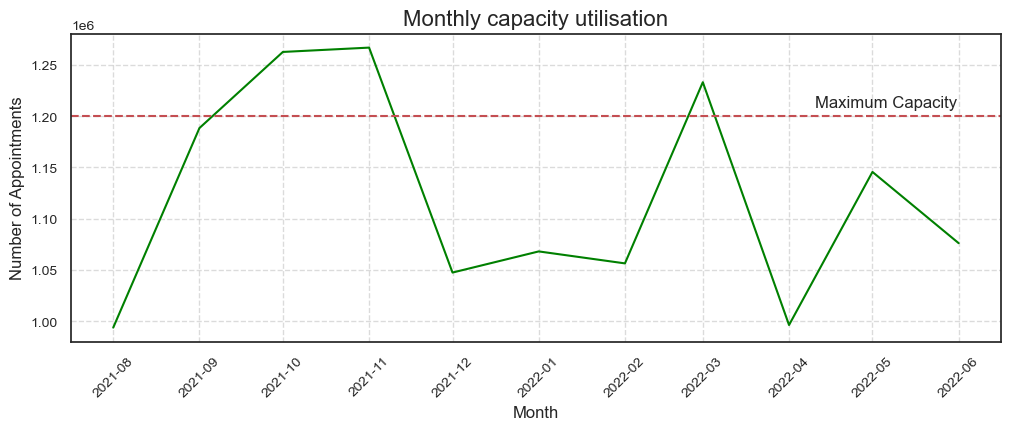

In [212]:
# Explanatory visualisation
# Create the line plot with capacity dived by 24 only
ax=sns.lineplot(x='appointment_month', y='utilisation_2', data=ar_df, color='Green')

# Add annotation lines. The NHS has provided a figure of an average of 1,200,000 as maximum capacity.
plt.axhline(y=1200000, color='r', linestyle='--')
plt.text(0.8,0.80, "Maximum Capacity", verticalalignment='top', transform=ax.transAxes)

# Add title and labels
plt.title("Monthly capacity utilisation")
plt.xlabel("Appointment Month")
plt.ylabel("Utilisation")


plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

>I'd like to investigate which HCT type is more streched. We need to bear in mind that as the granularity increases the scale will decrease, hence we need to adjust the maximum capacity.
>However, after spending hours trying to do it, I realised it won't work, because I don't know the max capacity of GP and Nurse. So I will hide all the cells regarding that.

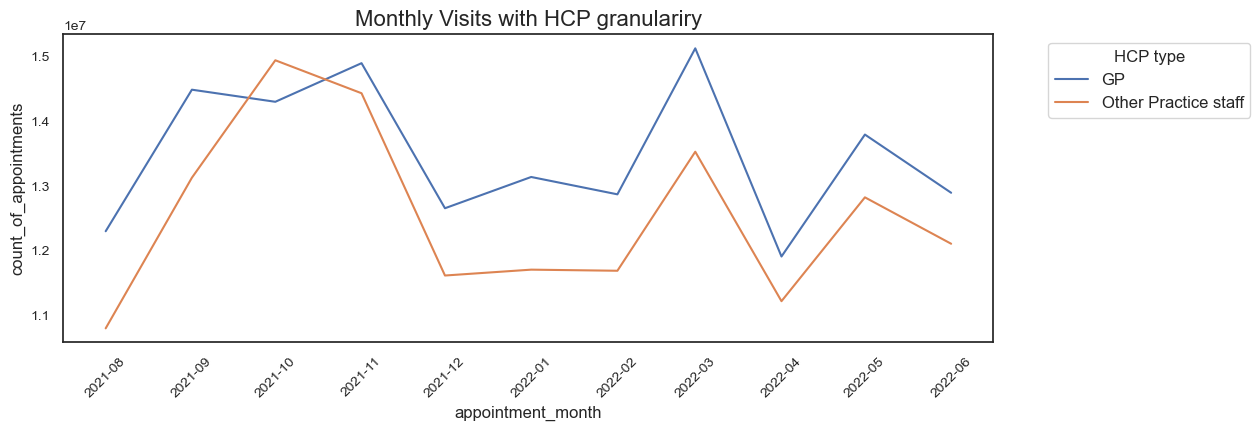

In [214]:
# Create an aggregated data set with HCP and, months and appts.
ar_filtered_hcp = ar_filtered.groupby(['appointment_month', 'hcp_type']).sum()['count_of_appointments'].reset_index()

# Remove unknow:
ar_known_hcp = ar_filtered_hcp[(ar_filtered_hcp['hcp_type'] != 'Unknown')]

# Check new plot with HCP
sns.lineplot(x='appointment_month', y='count_of_appointments',hue='hcp_type', data=ar_known_hcp)

plt.title("Monthly Visits with HCP granulariry")
plt.legend(title='HCP type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [215]:
# Calculate utilisation
# Create a copy of the DataFrame resolve the warning message
ar_known_hcp = ar_known_hcp.copy()

# Add columns for utilisation and utilisation_2
# Monthly aggregate / 30 to get to a daily value.
ar_known_hcp['utilisation'] = ar_known_hcp['count_of_appointments'] / 30
ar_known_hcp['utilisation'] = ar_known_hcp['utilisation'].round(1)

# Monthly aggregate / 24 to get to a daily value.
ar_known_hcp['utilisation_2'] = ar_known_hcp['count_of_appointments'] / 24
ar_known_hcp['utilisation_2'] = ar_known_hcp['utilisation_2'].round(1)

# View dataframe
ar_known_hcp.head()

appointment_month              hcp_type  count_of_appointments  utilisation  \
0        2021-08-01                    GP               12299022     409967.4   
1        2021-08-01  Other Practice staff               10797821     359927.4   
3        2021-09-01                    GP               14487785     482926.2   
4        2021-09-01  Other Practice staff               13126731     437557.7   
6        2021-10-01                    GP               14300751     476691.7   

   utilisation_2  
0       512459.2  
1       449909.2  
3       603657.7  
4       546947.1  
6       595864.6

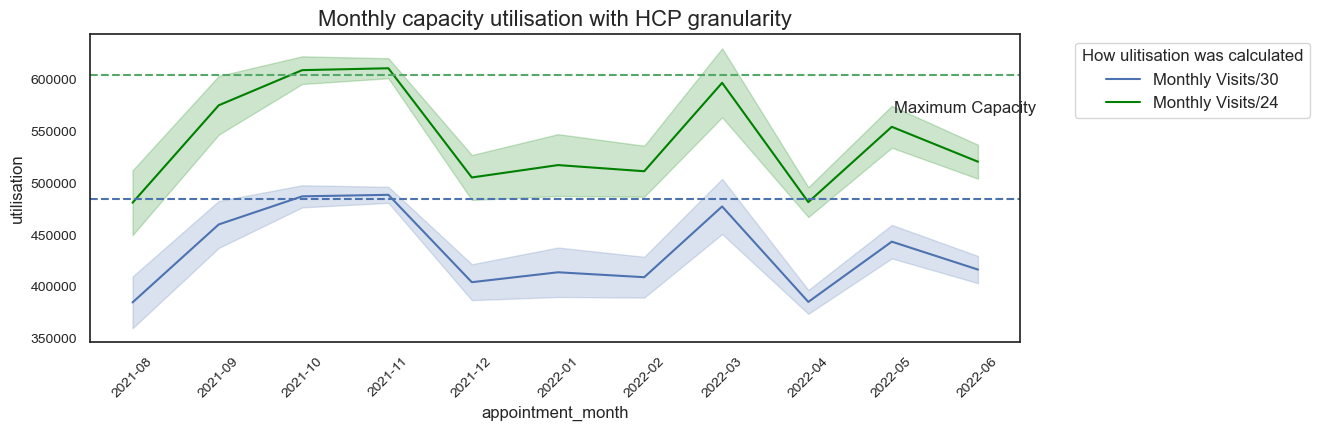

In [216]:
# Plot monthly capacity utilisation.
sns.lineplot(x='appointment_month', y='utilisation', data=ar_known_hcp, label='Monthly Visits/30')
sns.lineplot(x='appointment_month', y='utilisation_2', data=ar_known_hcp, color='Green', label='Monthly Visits/24')

# Show legend
plt.legend(title='How ulitisation was calculated', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotation lines.
plt.axhline(y=485000, color='b', linestyle='--')

plt.axhline(y=605000, color='g', linestyle='--')
plt.text(0.8,0.93, "Maximum Capacity", verticalalignment='top', transform=ax.transAxes)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set plot title
plt.title("Monthly capacity utilisation with HCP granularity")

# Show the plot
plt.show()

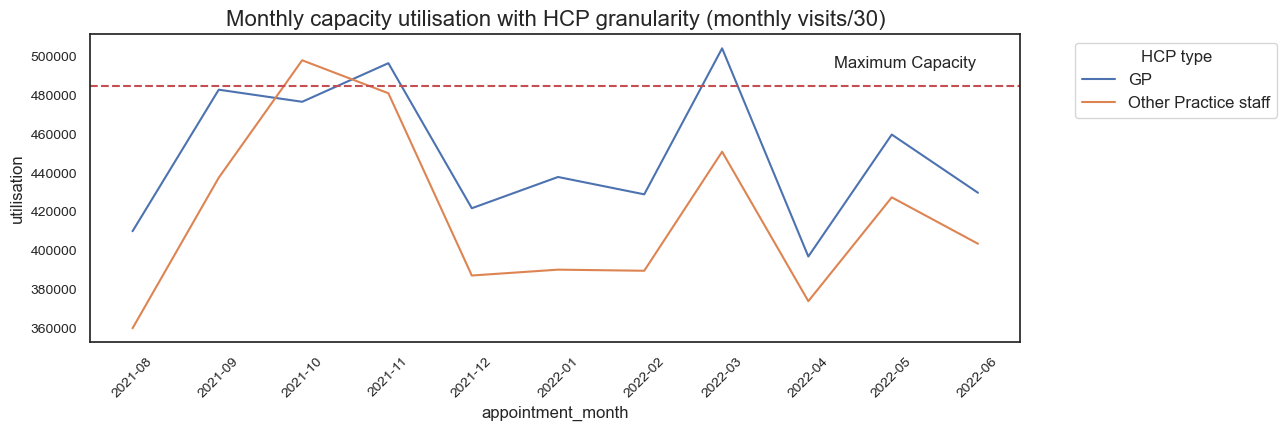

In [217]:
# Plot monthly capacity utilisation.
ax=sns.lineplot(x='appointment_month', y='utilisation', data=ar_known_hcp, hue='hcp_type')
plt.legend(title='HCP type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotation lines.
plt.axhline(y=485000, color='r', linestyle='--')
plt.text(0.8,0.93, "Maximum Capacity", verticalalignment='top', transform=ax.transAxes)


# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set plot title
plt.title("Monthly capacity utilisation with HCP granularity (monthly visits/30)")

# Show the plot
plt.show()

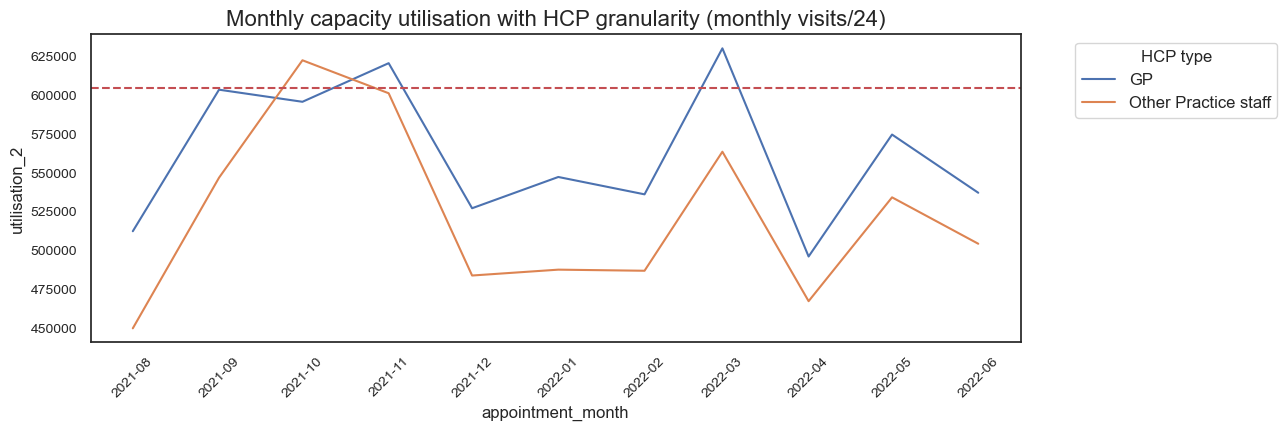

In [218]:
# Plot monthly capacity utilisation.
sns.lineplot(x='appointment_month', y='utilisation_2', data=ar_known_hcp, hue='hcp_type')

plt.legend(title='HCP type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotation lines.
plt.axhline(y=605000, color='r', linestyle='--', label='Maximum Capacity')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set plot title
plt.title("Monthly capacity utilisation with HCP granularity (monthly visits/24)")

# Show the plot
plt.show()

**Question 2:** How do the healthcare professional types differ over time?

In [220]:
# Create an aggregated data set to review the different features.
ar_hcp = ar.groupby(['appointment_month', 'hcp_type'])\
.sum()['count_of_appointments']\
.reset_index()

# View the DataFrame.
ar_hcp.head()

appointment_month              hcp_type  count_of_appointments
0        2020-01-01                    GP               14168932
1        2020-01-01  Other Practice staff               12326031
2        2020-01-01               Unknown                 704333
3        2020-02-01                    GP               12467976
4        2020-02-01  Other Practice staff               11002550

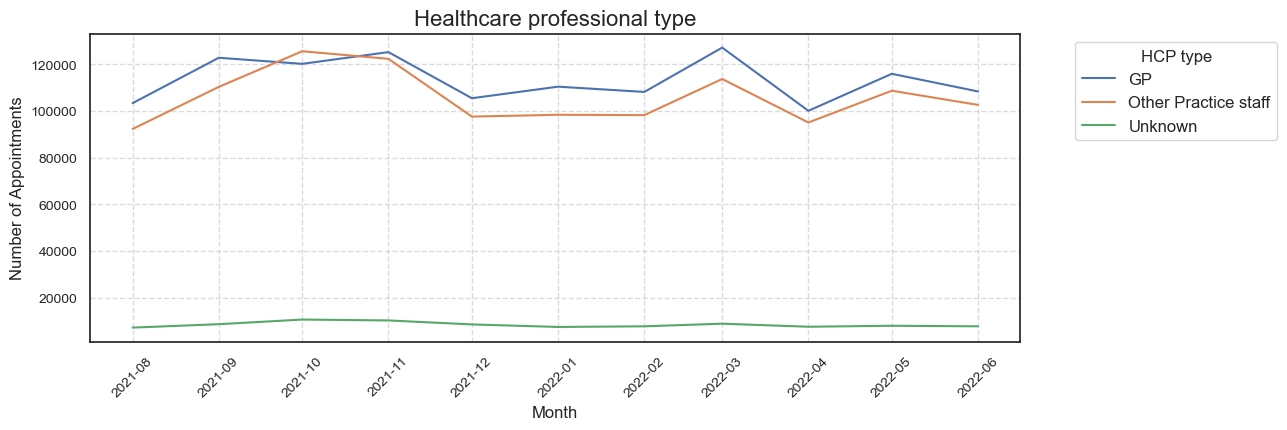

In [221]:
# Create a lineplot to answer the question.
# Plot monthly capacity utilisation.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_agg, errorbar=None)
plt.legend(title='HCP type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Healthcare professional type')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

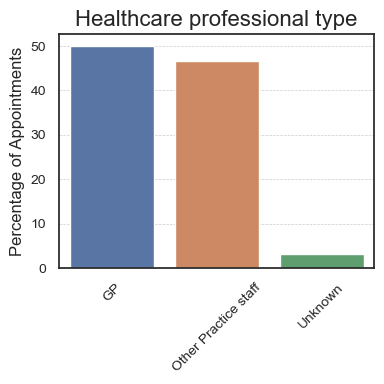

In [222]:
#To cretae a barplot with the percentage of appointment mode:
# Aggregate the data to get the sum of appointments for each appointment_mode
sum_of_appointments_HCP = ar_agg.groupby('hcp_type')['count_of_appointments'].sum()

# Calculate the total sum of appointments
total_sum_of_appointments = sum_of_appointments_HCP.sum()

# Calculate the percentage of each appointment_mode relative to the total sum of appointments
percentages_HCP = (sum_of_appointments_HCP / total_sum_of_appointments) * 100

# Plot
plt.figure(figsize=(4, 4))
sns.barplot(x=percentages_HCP.index, y=percentages_HCP.values)
plt.title('Healthcare professional type')
plt.xlabel(None)
plt.ylabel('Percentage of Appointments')
plt.xticks(rotation=45) 

# Adding horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

>Most of the appointments happens with GP most of the time, apart from October when other Practice staff increases more than GP.

>This is a relevant information for planning staff.

**Question 3:** Are there significant changes in whether or not visits are attended?

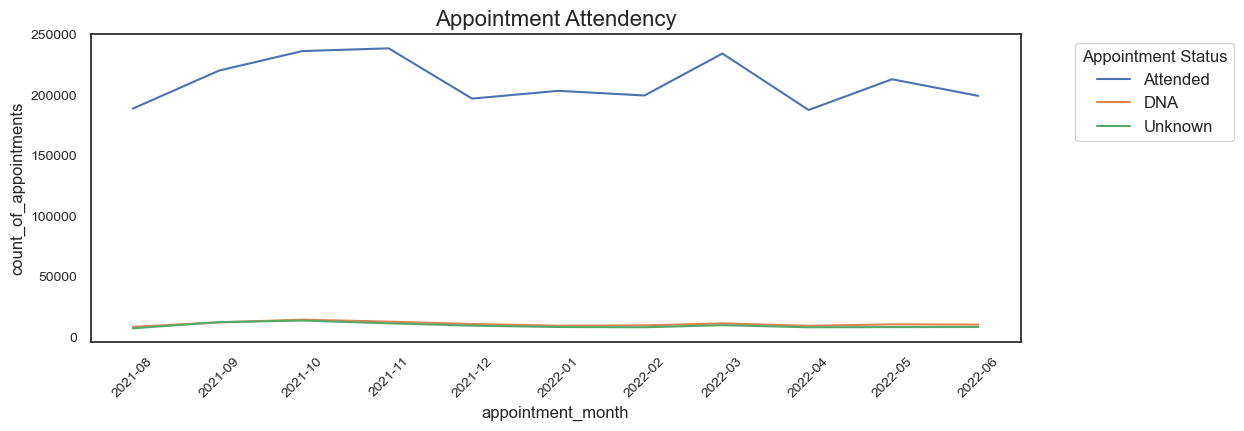

In [225]:
# Create a lineplot to answer the question.
# Plot Appointment status.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=ar_agg, errorbar=None).set_title("Appointment Attendency")
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

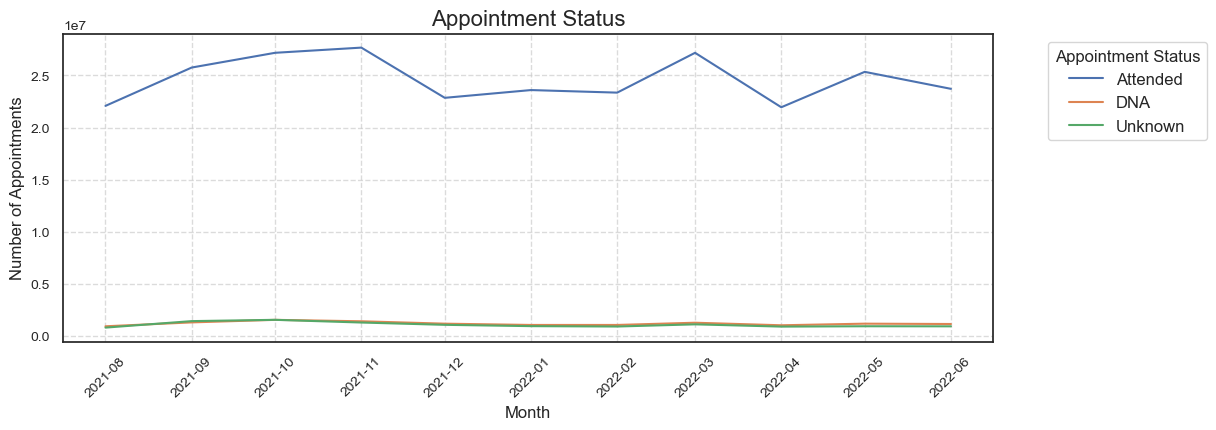

In [226]:
# Is it different if I aggregate only  by appointment status?

# Create an aggregated data set to review the different features.
ar_as = ar_filtered.groupby(['appointment_month', 'appointment_status'])\
.sum()['count_of_appointments']\
.reset_index()

# Plot Appointment status.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=ar_as, errorbar=None).set_title("Appointment Status")
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

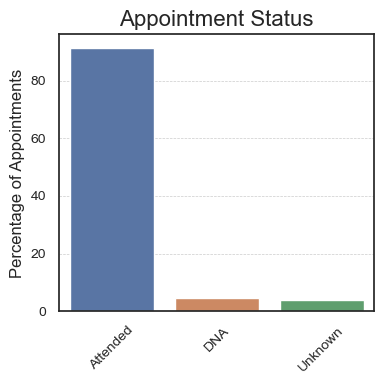

In [227]:
#To create a barplot with the percentage of appointment mode:
# Aggregate the data to get the sum of appointments for each appointment_mode
sum_of_appointments_status = ar_agg.groupby('appointment_status')['count_of_appointments'].sum()

# Calculate the total sum of appointments
total_sum_of_appointments = sum_of_appointments_status.sum()

# Calculate the percentage of each appointment_mode relative to the total sum of appointments
percentages_status = (sum_of_appointments_status / total_sum_of_appointments) * 100

# Plot
plt.figure(figsize=(4, 4))
sns.barplot(x=percentages_status.index, y=percentages_status.values)
plt.title('Appointment Status')
plt.xlabel(None)
plt.ylabel('Percentage of Appointments')
plt.xticks(rotation=45) 

# Adding horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

>Yes. As seen before, more gategories we aggregate, more dilute the data is. It's the same trent, however the numbers are nor corret. 
>>Both approaches can be used, dependidng on the questions.

In [229]:
# How many missed appointments in the whole ar dataset?
# Filter out rows where appointment_status is 'Unknown'
ar_known = ar[ar['appointment_status'] != 'Unknown']

# Change the data type of the appointment month to string to allow grouping.
ar_known['appointment_month'] = ar_known['appointment_month'].astype(str)

# Group by appointment status and sum the appointment counts
ar_appt = ar_known.groupby(['appointment_status']).sum()['count_of_appointments'].reset_index()

# view df
ar_appt

appointment_status  count_of_appointments
0           Attended              677755876
1                DNA               30911233

In [230]:
# Calculate the total count of appointments
total_appointments = ar_appt['count_of_appointments'].sum()

# Calculate the percentage of each appointment status
ar_appt['percentage'] = (ar_appt['count_of_appointments'] / total_appointments) * 100

# Display the updated dataframe
ar_appt


appointment_status  count_of_appointments  percentage
0           Attended              677755876   95.638117
1                DNA               30911233    4.361883

> There were 30,911,233 missed appointments from Jan/2020 to Jun/2022. Representing 4.3% of Total appointments 


In [232]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_filtered_22 = ar_known[ar_known['appointment_month'] >= '2021-08']

# Group by appointment status and sum the appointment counts
ar_appt_22 = ar_filtered_22.groupby(['appointment_status']).sum()['count_of_appointments'].reset_index()

# Calculate the total count of appointments
total_appointments_22 = ar_appt_22['count_of_appointments'].sum()

# Calculate the percentage of each appointment status
ar_appt_22['percentage'] = (ar_appt_22['count_of_appointments'] / total_appointments_22) * 100

# Display the dataframe
ar_appt_22

appointment_status  count_of_appointments  percentage
0           Attended              270657694   95.310033
1                DNA               13318384    4.689967

>There were 13,318,384 missed appointments from August 21 to June 2022, representing 4.68% of Total appointments for this period.

In [234]:
# To calculate the average of DNA per month
sum_DNA_per_month = ar_filtered_22[ar_filtered_22['appointment_status'] == 'DNA'].groupby('appointment_month')['count_of_appointments'].sum().reset_index()

average_DNA = sum_DNA_per_month['count_of_appointments'].mean()
average_DNA

1210762.1818181819

### Investigate reasons for missed appointments

In [236]:
# Select rows where appointment_status is 'DNA'
ar_dna = ar[ar['appointment_status'] == 'DNA']

# Group data to have sum of appointments:
ar_dna_agg = ar_dna.groupby(['appointment_month', 'appointment_status', 'hcp_type','appointment_mode', 'time_between_book_and_appointment'])\
.sum()['count_of_appointments']\
.reset_index()

ar_dna_agg.head()

appointment_month appointment_status hcp_type appointment_mode  \
0        2020-01-01                DNA       GP     Face-to-Face   
1        2020-01-01                DNA       GP     Face-to-Face   
2        2020-01-01                DNA       GP     Face-to-Face   
3        2020-01-01                DNA       GP     Face-to-Face   
4        2020-01-01                DNA       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                  34584  
1                    15  to 21 Days                  49641  
2                       2 to 7 Days                 112787  
3                    22  to 28 Days                  34490  
4                     8  to 14 Days                  84866

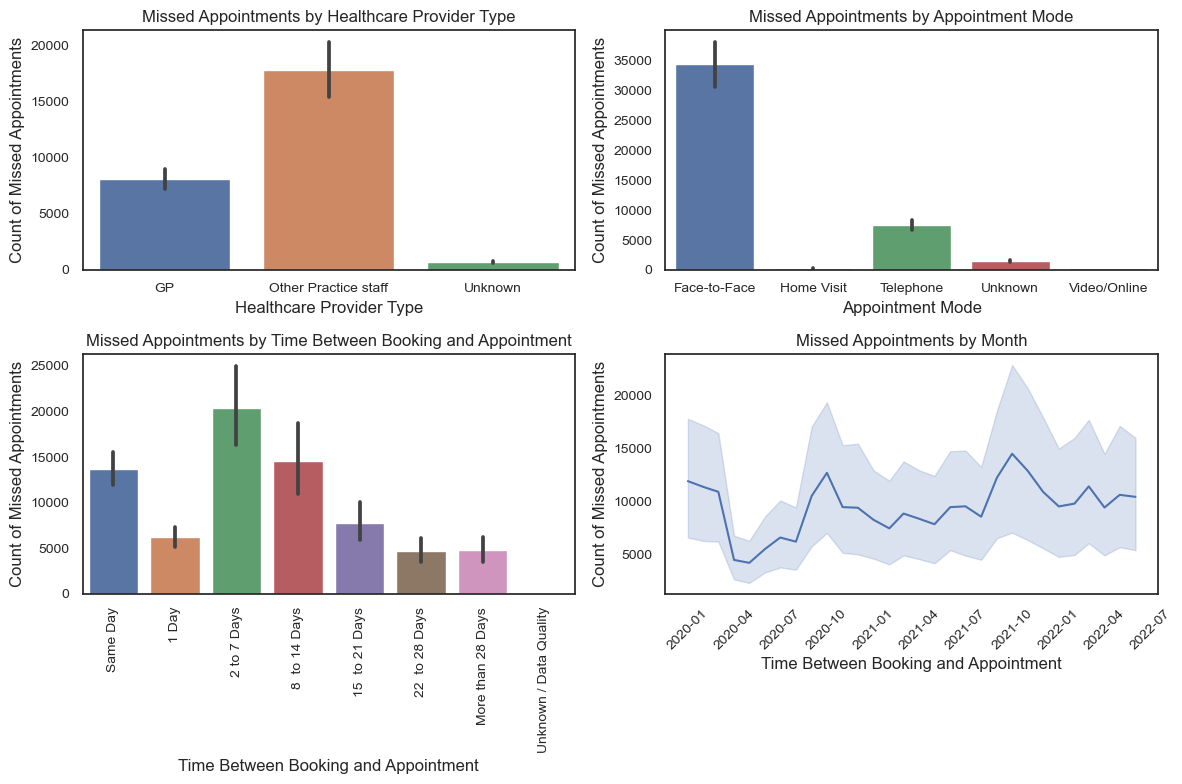

In [237]:
# Plot the missed appointmets on the other categories.
# Set plot size.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 'hcp_type'
sns.barplot(x='hcp_type', y='count_of_appointments', data=ar_dna_agg, ax=axes[0][0])
axes[0][0].set_title('Missed Appointments by Healthcare Provider Type', fontsize=12)
axes[0][0].set_xlabel('Healthcare Provider Type')
axes[0][0].set_ylabel('Count of Missed Appointments')

# Plot 'appointment_mode'
sns.barplot(x='appointment_mode', y='count_of_appointments', data=ar_dna_agg, ax=axes[0][1])
axes[0][1].set_title('Missed Appointments by Appointment Mode', fontsize=12)
axes[0][1].set_xlabel('Appointment Mode')
axes[0][1].set_ylabel('Count of Missed Appointments')

# Plot 'time_between_book_and_appointment'
# Define the order of categories
time_order = ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days', 'Unknown / Data Quality']
sns.barplot(x='time_between_book_and_appointment', y='count_of_appointments', data=ar_dna_agg, order=time_order, ax=axes[1][0])
axes[1][0].set_title('Missed Appointments by Time Between Booking and Appointment', fontsize=12)
axes[1][0].set_xlabel('Time Between Booking and Appointment')
axes[1][0].set_ylabel('Count of Missed Appointments')
axes[1][0].tick_params(axis='x', rotation=90)

# Plot 'month_appointment'
# Define the order of categories
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_dna_agg, ax=axes[1][1])
axes[1][1].set_title('Missed Appointments by Month', fontsize=12)
axes[1][1].set_xlabel('Time Between Booking and Appointment')
axes[1][1].set_ylabel('Count of Missed Appointments')
axes[1][1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

> **Findings**: Most of missed appointments were booked 2 to 7 days in advance. While most of bookings are on same day booking!

> Most of missed appointments are with other staff, rather than GP.

In [239]:
# Calculate the percentage to missied appointment for each category.
# Clean the aggregated data (ar_agg )of all unknown values.
# Filter out rows where data is 'Unknown' 
ar_agg_known = ar_agg[(ar_agg['appointment_status'] != 'Unknown') & (ar_agg['appointment_mode'] != 'Unknown') & (ar_agg['hcp_type'] != 'Unknown') &(ar_agg['time_between_book_and_appointment'] != 'Unknown / Data Quality')]

#View the df
ar_agg_known.head()

appointment_month appointment_status hcp_type appointment_mode  \
0        2021-08-01           Attended       GP     Face-to-Face   
1        2021-08-01           Attended       GP     Face-to-Face   
2        2021-08-01           Attended       GP     Face-to-Face   
3        2021-08-01           Attended       GP     Face-to-Face   
4        2021-08-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                 507835  
1                    15  to 21 Days                 194726  
2                       2 to 7 Days                 959486  
3                    22  to 28 Days                 102111  
4                     8  to 14 Days                 398772

In [240]:
# Calculate the total number of appointments for 'time_between_book_and_appointment'
total_appointments_per_time = ar_agg_known.groupby('time_between_book_and_appointment')['count_of_appointments'].sum()

# Calculate the total number of missed appointments (DNA) for each category of 'time_between_book_and_appointment'
total_missed_appointments_per_time = ar_agg_known[ar_agg_known['appointment_status'] == 'DNA'].groupby('time_between_book_and_appointment')['count_of_appointments'].sum()

# Calculate the percentage of missed appointments (DNA) in each category of 'time_between_book_and_appointment'
percentage_missed_per_time = (total_missed_appointments_per_time / total_appointments_per_time) * 100

# Create a missing appointment by time percentage df
# Concatenate the Series into a single DataFrame
dna_time = pd.concat([total_appointments_per_time, total_missed_appointments_per_time, percentage_missed_per_time], axis=1)

# Reset index and rename columns
dna_time.reset_index(inplace=True)
dna_time.columns = ['time_between_book_and_appointment', 'total_appointments_per_time', 'total_missed_appointments_per_time', 'percentage_missed']

# Display the DataFrame
dna_time

time_between_book_and_appointment  total_appointments_per_time  \
0                             1 Day                     23967382   
1                    15  to 21 Days                     17671314   
2                       2 to 7 Days                     56509027   
3                    22  to 28 Days                     10192943   
4                     8  to 14 Days                     34533703   
5                 More than 28 Days                      8254273   
6                          Same Day                    121062469   

   total_missed_appointments_per_time  percentage_missed  
0                              992793           4.142267  
1                             1540390           8.716896  
2                             3587577           6.348679  
3                              918073           9.006947  
4                             2811027           8.139952  
5                              892359          10.810873  
6                             2148009           1.774298

In [241]:
# Define the custom order
time_order = ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days']

# Sort the DataFrame by the custom order
dna_time = dna_time.set_index('time_between_book_and_appointment').loc[time_order].reset_index()

# Display the sorted DataFrame
dna_time


time_between_book_and_appointment  total_appointments_per_time  \
0                          Same Day                    121062469   
1                             1 Day                     23967382   
2                       2 to 7 Days                     56509027   
3                     8  to 14 Days                     34533703   
4                    15  to 21 Days                     17671314   
5                    22  to 28 Days                     10192943   
6                 More than 28 Days                      8254273   

   total_missed_appointments_per_time  percentage_missed  
0                             2148009           1.774298  
1                              992793           4.142267  
2                             3587577           6.348679  
3                             2811027           8.139952  
4                             1540390           8.716896  
5                              918073           9.006947  
6                              892359          10.810873

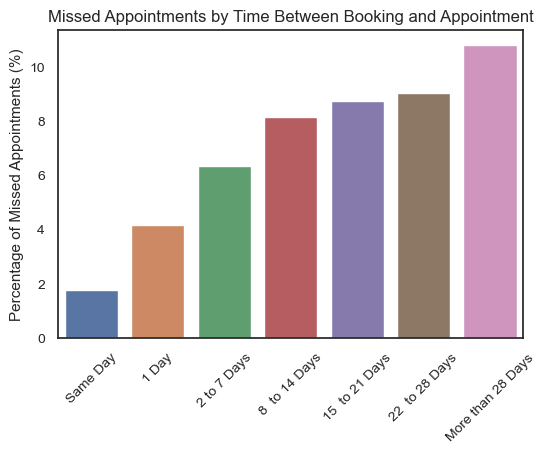

In [242]:
# Create a bar plot with the percentage of missed appointiments by category of date
# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the bar plot 
sns.barplot(x='time_between_book_and_appointment', y='percentage_missed', data=dna_time)

# Set the title and labels
plt.title('Missed Appointments by Time Between Booking and Appointment', fontsize=12)
plt.xlabel(None)
plt.ylabel('Percentage of Missed Appointments (%)', fontsize=11)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [243]:
# Look at percentage of missed appointment by HCP.
# Calculate the total number of appointments for each category of 'time_between_book_and_appointment'
total_appointments_hcp = ar_agg_known.groupby('hcp_type')['count_of_appointments'].sum()

# Calculate the total number of missed appointments (DNA) for each category of 'time_between_book_and_appointment'
total_missed_appointments_hcp = ar_agg_known[ar_agg_known['appointment_status'] == 'DNA'].groupby('hcp_type')['count_of_appointments'].sum()

# Calculate the percentage of missed appointments (DNA) in each category of 'time_between_book_and_appointment'
percentage_missed_hcp= (total_missed_appointments_hcp / total_appointments_hcp) * 100
                                                                                                  
# Create a missing appointment by hcp percentage df
# Concatenate the Series into a single DataFrame
dna_hcp= pd.concat([total_appointments_hcp, total_missed_appointments_hcp, percentage_missed_hcp], axis=1)

# Reset index and rename columns
dna_hcp.reset_index(inplace=True)
dna_hcp.columns = ['hcp_type', 'total_appointments_hcp', 'total_missed_appointments_hcp', 'percentage_missed']

# Display the DataFrame
dna_hcp

hcp_type  total_appointments_hcp  \
0                    GP               142565573   
1  Other Practice staff               129625538   

   total_missed_appointments_hcp  percentage_missed  
0                        3798649           2.664492  
1                        9091579           7.013725

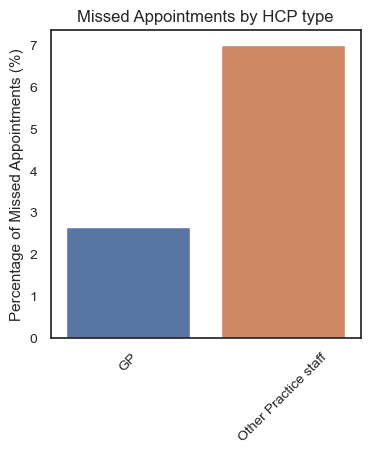

In [244]:
# Create a bar plot with the percentage of missed appointiments by category of date
# Set the figure size
plt.figure(figsize=(4, 4))

# Plot the bar plot 
sns.barplot(x='hcp_type', y='percentage_missed', data=dna_hcp)

# Set the title and labels
plt.title('Missed Appointments by HCP type', fontsize=12)
plt.ylabel('Percentage of Missed Appointments (%)',fontsize=11)
plt.xlabel(None)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

> GPs account for 53.5% of the total appointments, while Other Practice Staff represent 46.5%. 

> Appointments with GPs are less likely to be missed compared to those with Other Practice Staff.

> Recommendations: 
- Targeted reminders
- Appointment scheduling optimization
- Patient education initiatives tailored to specific HCP contexts. 

>Limitations:
- We don't have any information regarding the patiets demographic or socioeconomic factors associated with higher rates of missed appointments.
- Couldn't do any predictive analytics to identify patients at higher risk of missing appointments?


In [246]:
#Look at percentage of missed appointment by appointment_mode
# Calculate the total number of appointments for each category of 'time_between_book_and_appointment'
total_appointments_mode = ar_agg_known.groupby('appointment_mode')['count_of_appointments'].sum()

# Calculate the total number of missed appointments (DNA) for each category of 'time_between_book_and_appointment'
total_missed_appointments_mode = ar_agg_known[ar_agg_known['appointment_status'] == 'DNA'].groupby('appointment_mode')['count_of_appointments'].sum()

# Calculate the percentage of missed appointments (DNA) in each category of 'time_between_book_and_appointment'
percentage_missed_mode= (total_missed_appointments_mode / total_appointments_mode) * 100
                                                                                                  
# Create a missing appointment by hcp percentage df
# Concatenate the Series into a single DataFrame
dna_mode= pd.concat([total_appointments_mode, total_missed_appointments_mode, percentage_missed_mode], axis=1)

# Reset index and rename columns
dna_mode.reset_index(inplace=True)
dna_mode.columns = ['Mode', 'total_appointments_mode', 'total_missed_appointments_mode', 'percentage_missed']

# Filter for f-2-f and telephone only
dna_mode_filtered = dna_mode[dna_mode['Mode'].isin(['Face-to-Face', 'Telephone'])]

# Display the DataFrame
dna_mode_filtered

Mode  total_appointments_mode  total_missed_appointments_mode  \
0  Face-to-Face                173571877                        10712428   
2     Telephone                 95740339                         2050424   

   percentage_missed  
0           6.171753  
2           2.141651

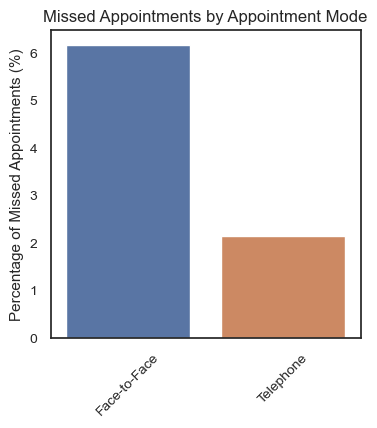

In [247]:
# Create a bar plot with the percentage of missed appointiments by category of date
# Set the figure size
plt.figure(figsize=(4, 4))
order=['Face-to-Face', 'Telephone']

# Plot the bar plot 
sns.barplot(x='Mode', y='percentage_missed', data=dna_mode_filtered, order=order)

# Set the title and labels
plt.title('Missed Appointments by Appointment Mode', fontsize=12)
plt.xlabel(None)
plt.ylabel('Percentage of Missed Appointments (%)', fontsize=11)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


- Face-to-face appointments represent the majority of appointments (61.14%), while telephone appointments make up a significant portion as well (37.87%).

- However, Face-to-face appointments have a substantially higher percentage of missed appointments (81.68%) compared to telephone appointments (17.40%). 

- Healthcare providers may consider implementing strategies to improve attendance, such as optimized scheduling to reduce wait times and reminder systems


>•If I have time, investigate month and DNA

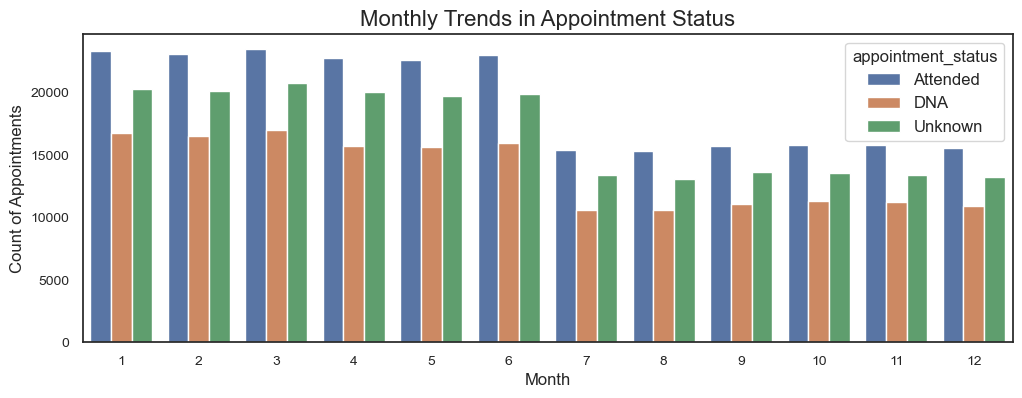

In [250]:
# Analyze monthly trends
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])
ar['month'] = ar['appointment_month'].dt.month
sns.countplot(x='month', hue='appointment_status', data=ar)
plt.title('Monthly Trends in Appointment Status')
plt.xlabel('Month')
plt.ylabel('Count of Appointments')
plt.show()



**Question 4:** Are there changes in terms of appointment type and the busiest months?

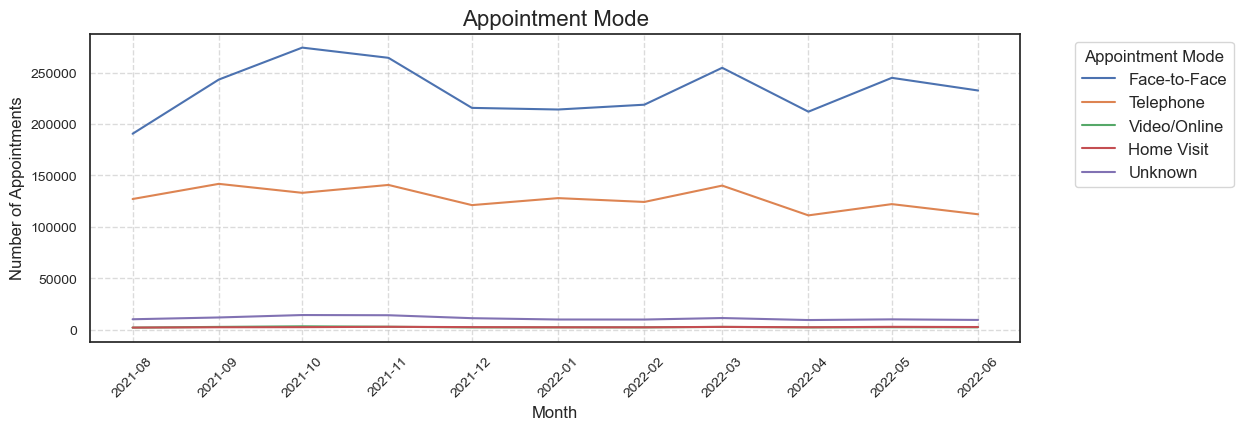

In [252]:
# Create a lineplot to answer the question.
# Define the desired order for the legend
mode_order = ['Face-to-Face', 'Telephone', 'Video/Online', 'Home Visit', 'Unknown']

# Plot Appointment Mode.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=ar_agg, hue_order=mode_order, errorbar=None)
plt.title('Appointment Mode')
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

There is an increase of face-to-face appointments on the busiest months are September to December while Telephone remains mostly flat. 
>Suggesting that when there is an increase on demand, patients prefer/need face-to-face appointments.

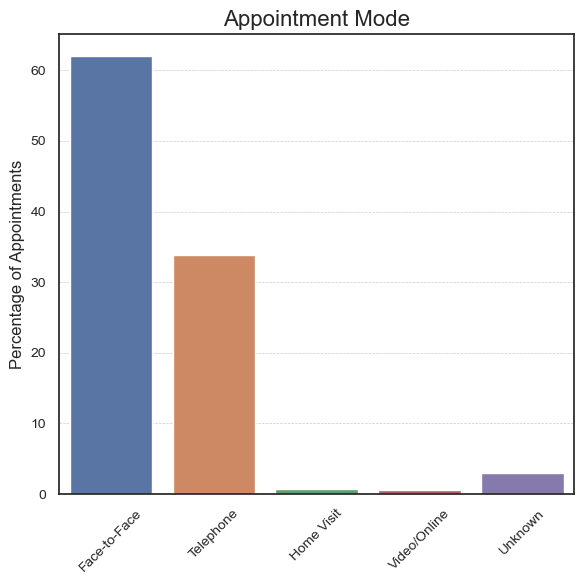

In [254]:
#To cretae a barplot with the percentage of appointment mode:
# Aggregate the data to get the sum of appointments for each appointment_mode
sum_of_appointments_mode = ar_agg.groupby('appointment_mode')['count_of_appointments'].sum()

# Calculate the total sum of appointments
total_sum_of_appointments = sum_of_appointments_mode.sum()

# Calculate the percentage of each appointment_mode relative to the total sum of appointments
percentages_mode = (sum_of_appointments_mode / total_sum_of_appointments) * 100

# Plot
order = ['Face-to-Face', 'Telephone','Home Visit', 'Video/Online', 'Unknown' ]
plt.figure(figsize=(6, 6))
sns.barplot(x=percentages_mode.index, y=percentages_mode.values, order=order)
plt.title('Appointment Mode')
plt.xlabel(None)
plt.ylabel('Percentage of Appointments')
plt.xticks(rotation=45) 

# Adding horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

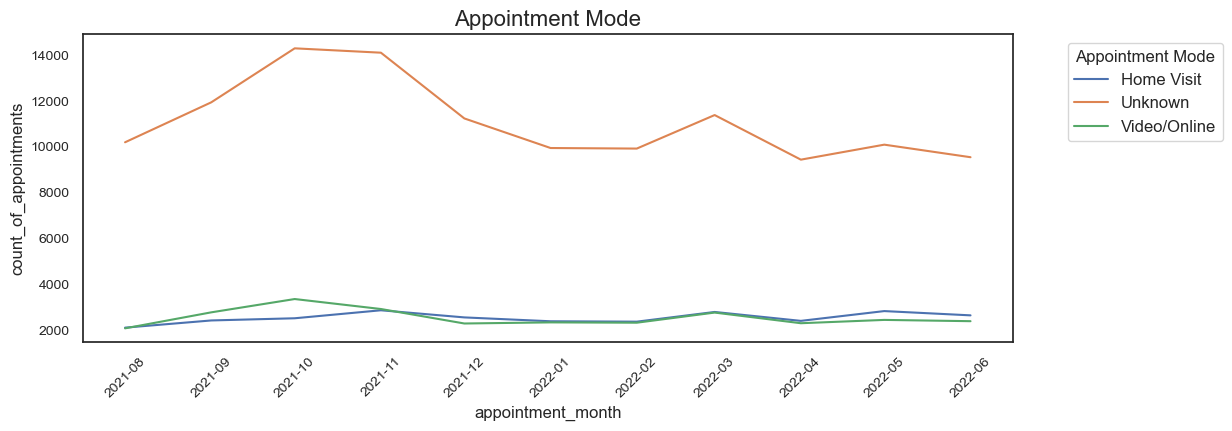

In [255]:
# Filter out rows where 'appointment_mode' is neither 'Face-to-Face' nor 'Telephone'
ar_show_video = ar_agg[(ar_agg['appointment_mode'] != 'Face-to-Face') & (ar_agg['appointment_mode'] != 'Telephone')]

# Create lineplot
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=ar_show_video, errorbar=None)
plt.title('Appointment Mode')
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()


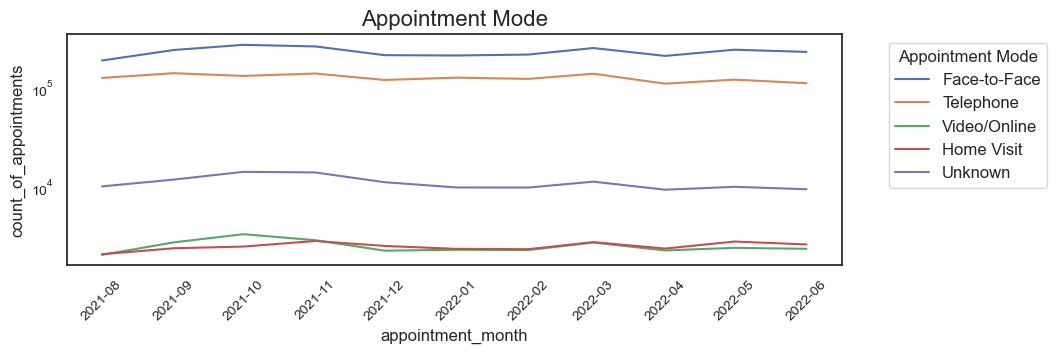

In [256]:
# Create a lineplot in log scale to be able to visualise all the dataset together.
# Set the figure size.
plt.figure(figsize=(10, 3))

# Define the desired order for the legend
mode_order = ['Face-to-Face', 'Telephone', 'Video/Online', 'Home Visit', 'Unknown']

# Plot Appointment Mode.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=ar_agg, hue_order=mode_order, errorbar=None)
plt.title('Appointment Mode')
plt.legend(title='Appointment Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')  # Set log scale for y-axis

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Question 5:** Are there any trends in time between booking an appointment?

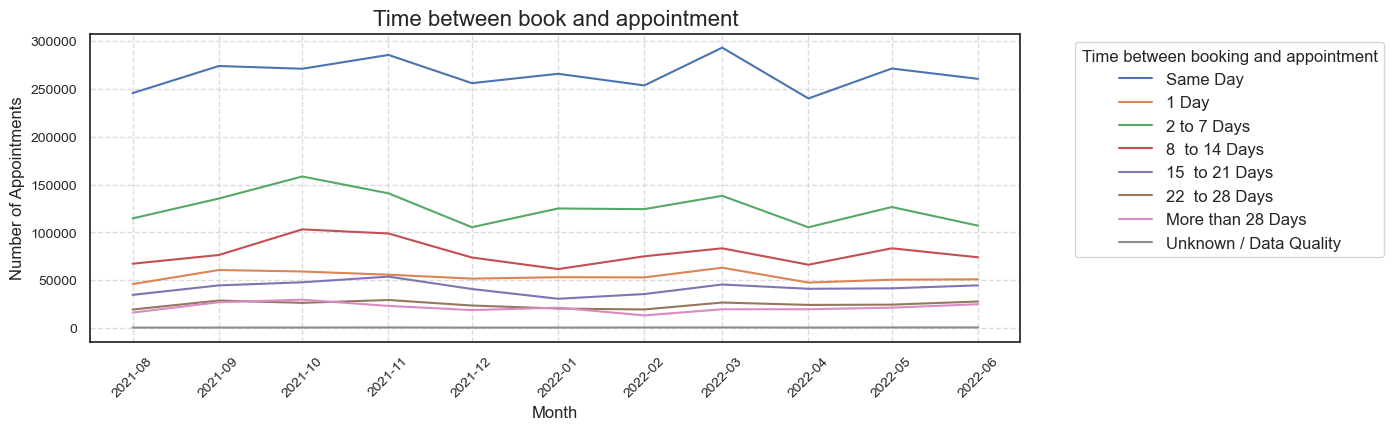

In [258]:
# Create a lineplot to answer the question.
# Define the desired order for the legend
time_order = ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days', 'Unknown / Data Quality']

# Plot monthly capacity utilisation.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', data=ar_agg, hue_order=time_order, errorbar=None)
plt.title('Time between book and appointment')
plt.legend(title='Time between booking and appointment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

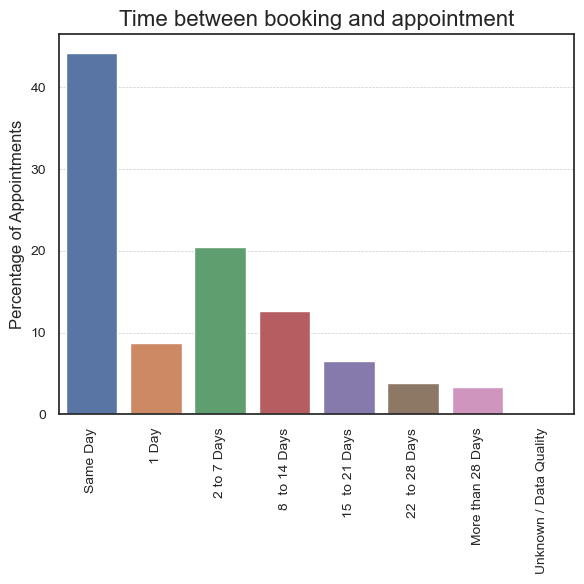

In [259]:
#To cretae a barplot with the percentage of appointment mode:
# Aggregate the data to get the sum of appointments for each appointment_mode
sum_of_appointments_time = ar_agg.groupby('time_between_book_and_appointment')['count_of_appointments'].sum()

# Calculate the total sum of appointments
total_sum_of_appointments = sum_of_appointments_time.sum()

# Calculate the percentage of each appointment_mode relative to the total sum of appointments
percentages_time = (sum_of_appointments_time / total_sum_of_appointments) * 100

# Plot
time_order = ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days', 'Unknown / Data Quality']
plt.figure(figsize=(6, 6))
sns.barplot(x=percentages_time.index, y=percentages_time.values, order=time_order)
plt.title('Time between booking and appointment')
plt.xlabel(None)
plt.ylabel('Percentage of Appointments')
plt.xticks(rotation=90) 

# Adding horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()



The majority of appointments are booked for the same day (46.60%).
This suggests that a significant portion of patients prefer or require short notice appointments. 

However, the next is 2-7 days, and not 1 day.
> This might reflect the innability to book and appointment for next day.

**Question 6:** How does the spread of service settings compare?

In [262]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.
# Create a new DataFrame consisting of the month of appointment and the number of appointments.
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the output.
nc_ss.head()

appointment_month            service_setting  count_of_appointments
0        2021-08-01  Extended Access Provision                 160927
1        2021-08-01           General Practice               21575852
2        2021-08-01                      Other                 449101
3        2021-08-01       Primary Care Network                 432448
4        2021-08-01                   Unmapped                1233843

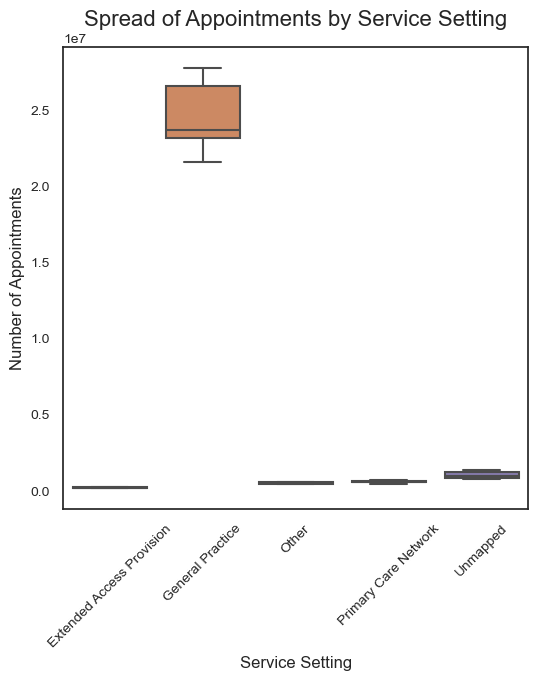

In [263]:
# Set the figure size.
plt.figure(figsize=(6, 6))

# Create the boxplot using Seaborn
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_ss)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Spread of Appointments by Service Setting')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')

# Show the plot
plt.show()


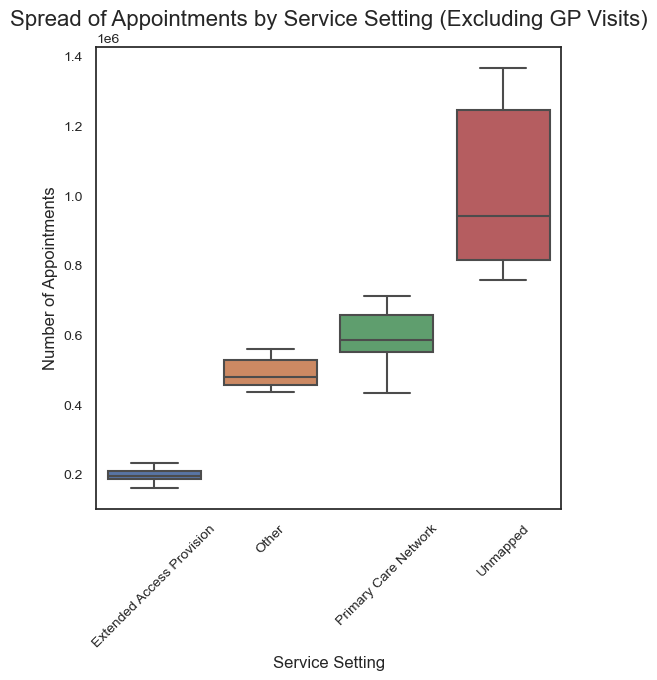

In [264]:
# Create a boxplot to investigate the service settings without GP.
# Set the figure size.
plt.figure(figsize=(6, 6))

# Create the boxplot using Seaborn
sns.boxplot(x='service_setting', y='count_of_appointments', data=nc_ss_without_gp)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Spread of Appointments by Service Setting (Excluding GP Visits)')
plt.xlabel('Service Setting')
plt.ylabel('Number of Appointments')

# Show the plot
plt.show()


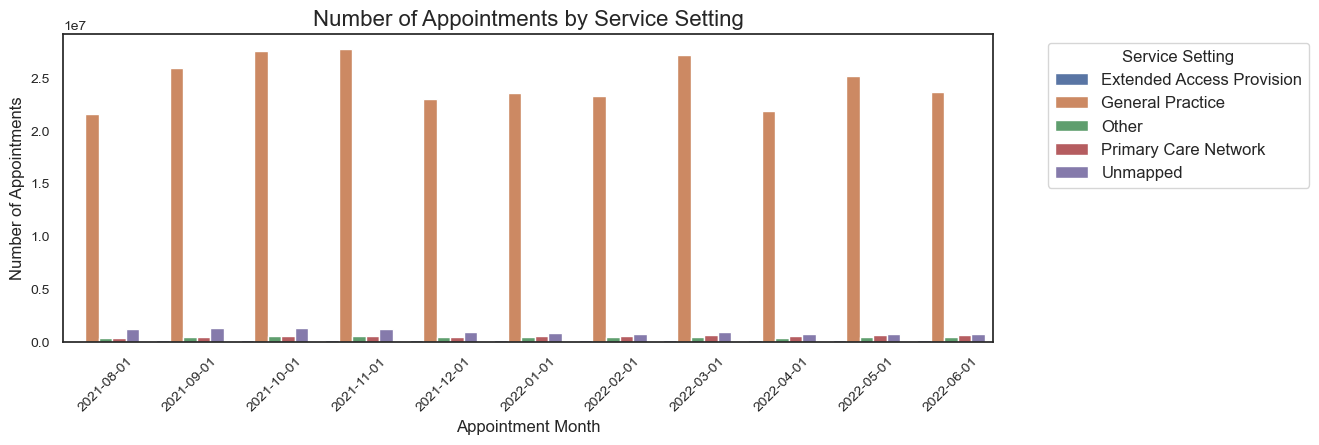

In [265]:
# I would like to look at bar plot:
# Set the figure size.
plt.figure(figsize=(12, 4))

# Create the bar plot using Seaborn
sns.barplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Number of Appointments by Service Setting')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

# Show the plot
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


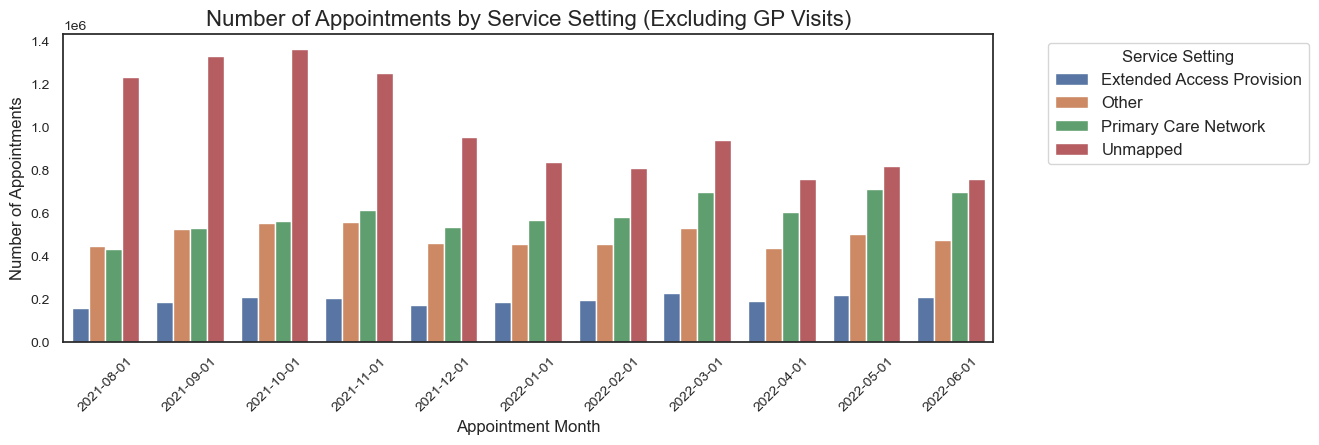

In [266]:
# Filter out General Practice service setting
nc_ss_without_gp = nc_ss[nc_ss['service_setting'] != 'General Practice']

# Set the figure size.
plt.figure(figsize=(12, 4))

# Create the bar plot using Seaborn
sns.barplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss_without_gp)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Number of Appointments by Service Setting (Excluding GP Visits)')
plt.xlabel('Appointment Month')
plt.ylabel('Number of Appointments')

# Show the plot
plt.legend(title='Service Setting', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Summary of your findings based on the analysis.

- There were 296,046,770 appointments from August 2021 to June 2022
- General Practice (GP) services were significantly more utilized compared to others.
- Major limitations to capacity analysis like lack of staff and infrastructure data. Doesn't consider regional demographics or healthcare needs.
- Steady increase in PCN  and a decline in unmapped appointments. This prompts the question of whether PCN numbers would be higher with proper mapping. Improved mapping may provide more accurate PCN figures.
- Context Type doesn't give valuable insights, since there are no additional categories beyond 'Care related encounter.
- General Consultation as the most frequent appointment type, with a significant surge observed in planned clinics and procedures in October.
- On Autumn 2021 there was nationwide Saturday planned clinics.
- Friday experiences nearly 10 million fewer appointments compared to Tuesday.
- Regarding HPC most appointments involve GPs throughout the year, except for October when Other-Practice-Staff see a notable increase. Other-Practice-Staff comprises a diverse range of 12 professional types, including nurses.
- Face-to-face appointments constitute the majority (61%), with telephone appointments representing a significant portion (37.87%). during periods of increased demand, patients tend to prefer or require face-to-face appointments.
- Most appointments were booked for the same day (46%), suggesting that a significant portion of patients prefer or require short notice appointments. The next most common timeframe is 2-7 days, rather than 1 day. This might reflect the inability to book an appointment for the next day.
- Most appointments are attended, with 4.6% recorded as missed, totalling 13,318,384 missed appointment.
- Appointments with GPs have lower miss rates compared to those with Other-Practice-Staff. 
- Face-to-face appointments are more prone to being missed than telephone appointments
- Longer lead times between booking and appointments increase the likelihood of a missed appointment
- Monthly usage calculated by dividing total appointments by 30 days or by 24 hours (as most occur Monday to Friday). Utilization peaks at 20% of capacity when divided by 30 but exceeds by 10% when divided by 24. 

### Recommendations based on the analysis.

**Capacity Assessment:**

- Gather data on staff, infrastructure, regional demographics or healthcare needs.

**Utilisation Trends:**

- Planned clinics on Saturdays during Autumn can be expand for the whole year.
- Increase appointments towards the end of the week.
- Separate Nurse data from other practice staff.
- Increase Face-to-Face capacity during peak months.
- Facilitate next-day booking and be careful with overreliance on short-notice appointments.


**Missed Appointments:**

- Targeted reminders (Other Staff or long-term booking)
- Appointment scheduling optimization to decrease waiting time
- Patient education initiatives tailored to specific HCP contexts. 

**Data collection**
- Assign unique-identifier-number to each appointment to enable merge of files and extract insights like missed appointments by weekday.
- Improve service setting record
- Standardise surgeries records of actual duration

### Extra explorations that I wanted to do:

### Work on Actual duration file

In [273]:
# Separate data set that can be used in future weeks.
# Add an 'appointment_month' column
ad['appointment_month'] = ad['appointment_date'].dt.strftime('%Y-%m')  # Extract year and month from 'appointment_date'

# Aggregate on a monthly level and determine the sum of records per month.
ad_ad = ad.groupby(['appointment_month', 'actual_duration'])['count_of_appointments'].sum().reset_index()

# View the output.
print(ad.shape)
ad_ad.head(7)


(137793, 9)


appointment_month         actual_duration  count_of_appointments
0           2021-12             1-5 Minutes                4266686
1           2021-12           11-15 Minutes                3280132
2           2021-12           16-20 Minutes                2023774
3           2021-12           21-30 Minutes                1885864
4           2021-12           31-60 Minutes                1163515
5           2021-12            6-10 Minutes                4654000
6           2021-12  Unknown / Data Quality                5579512

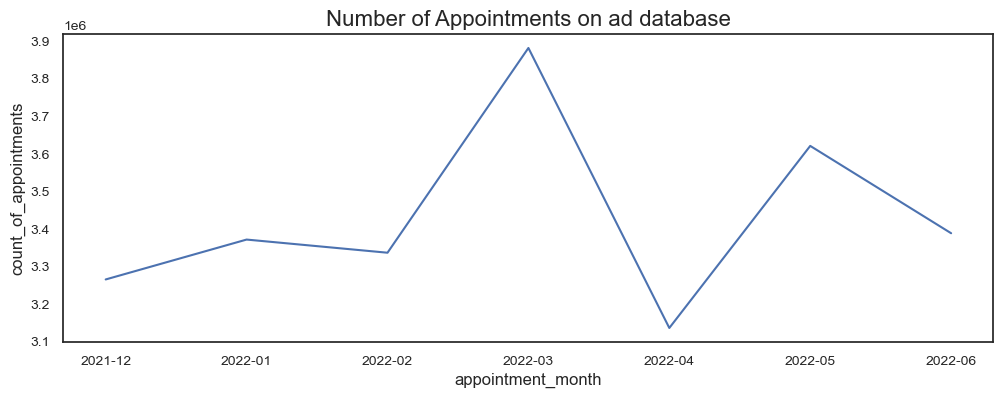

In [274]:
# Plot the appointments over the available date range, and review the actual duration for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ad_ad, errorbar=None)
plt.title('Number of Appointments on ad database')
plt.show()

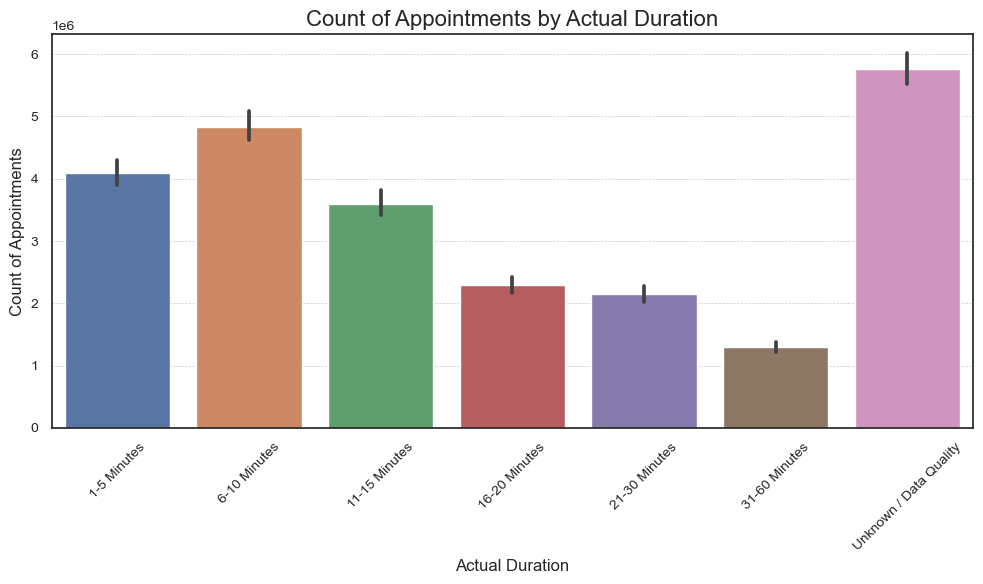

In [275]:
# Create the bar plot using Seaborn
# Define the order of the x-axis (actual_duration)
duration_order = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes', '21-30 Minutes', '31-60 Minutes', 'Unknown / Data Quality']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='actual_duration', y='count_of_appointments', data=ad_ad, order=duration_order)
plt.title('Count of Appointments by Actual Duration')
plt.xlabel('Actual Duration')
plt.ylabel('Count of Appointments')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()



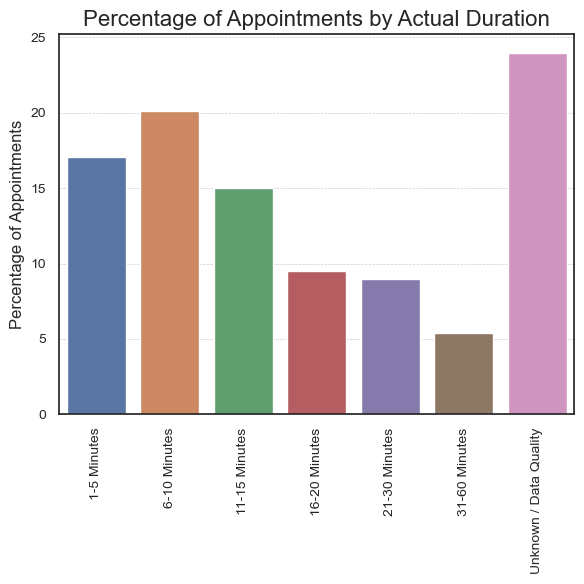

In [276]:
# Define the order of the x-axis (actual_duration)
duration_order = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes', '21-30 Minutes', '31-60 Minutes', 'Unknown / Data Quality']

# Aggregate the data to get the sum of appointments for each category
sum_of_appointments = ad.groupby('actual_duration')['count_of_appointments'].sum()

# Calculate the total sum of appointments
total_sum_of_appointments = sum_of_appointments.sum()

# Calculate the percentage of each category relative to the total sum of appointments
percentages = (sum_of_appointments / total_sum_of_appointments) * 100

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(x=percentages.index, y=percentages.values, order=duration_order)
plt.title('Percentage of Appointments by Actual Duration')
plt.xlabel(None)
plt.ylabel('Percentage of Appointments')
plt.xticks(rotation=90) 

# Adding horizontal grid lines
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [277]:
# Filter out rows with 'Unknown / Data Quality'
ad_filtered = ad[ad['actual_duration'] != 'Unknown / Data Quality']

# Aggregate on a monthly level and determine the sum of records per month.
ad_adf = ad_filtered.groupby(['appointment_month', 'actual_duration'])['count_of_appointments'].sum().reset_index()

# View the output.
print(ad.shape)
ad_adf.head(7)


(137793, 9)


appointment_month actual_duration  count_of_appointments
0           2021-12     1-5 Minutes                4266686
1           2021-12   11-15 Minutes                3280132
2           2021-12   16-20 Minutes                2023774
3           2021-12   21-30 Minutes                1885864
4           2021-12   31-60 Minutes                1163515
5           2021-12    6-10 Minutes                4654000
6           2022-01     1-5 Minutes                3975252

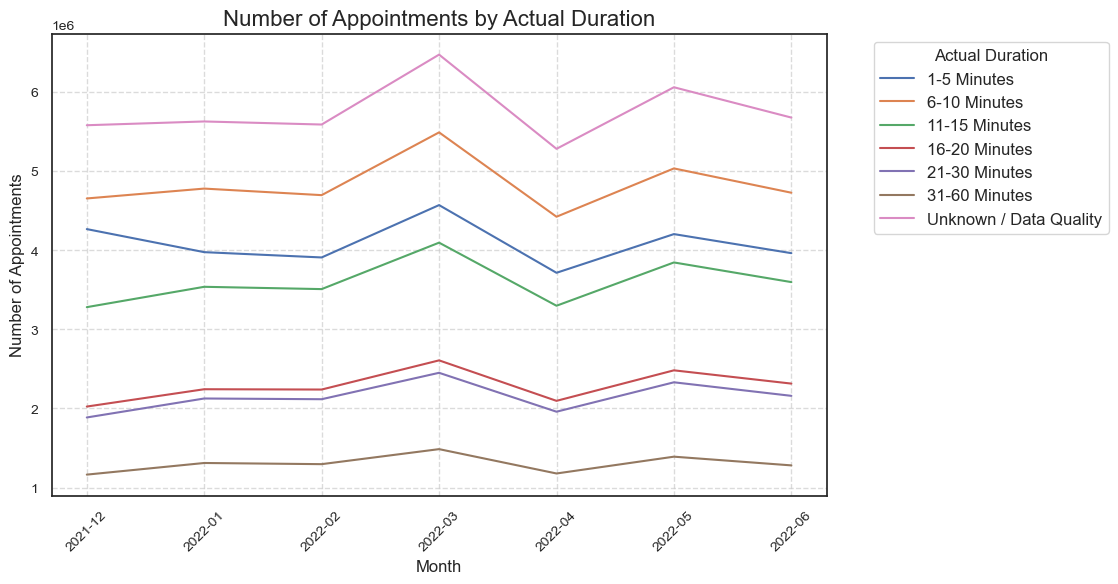

In [278]:
# Plot the appointments over the available date range, and review the actual duration for months.
# Create a lineplot.
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='actual_duration', hue_order=duration_order, data=ad_ad)
plt.title('Number of Appointments by Actual Duration')
plt.legend(title='Actual Duration', bbox_to_anchor=(1.05, 1))
# Define the order of the legend labels
duration_order = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes', '21-30 Minutes', '31-60 Minutes', 'Unknown / Data Quality']

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [279]:
# Aggregate by region and determine the sum of records per month.
ad_region = ad_filtered.groupby(['region_ons_code', 'actual_duration'])['count_of_appointments'].sum().reset_index()

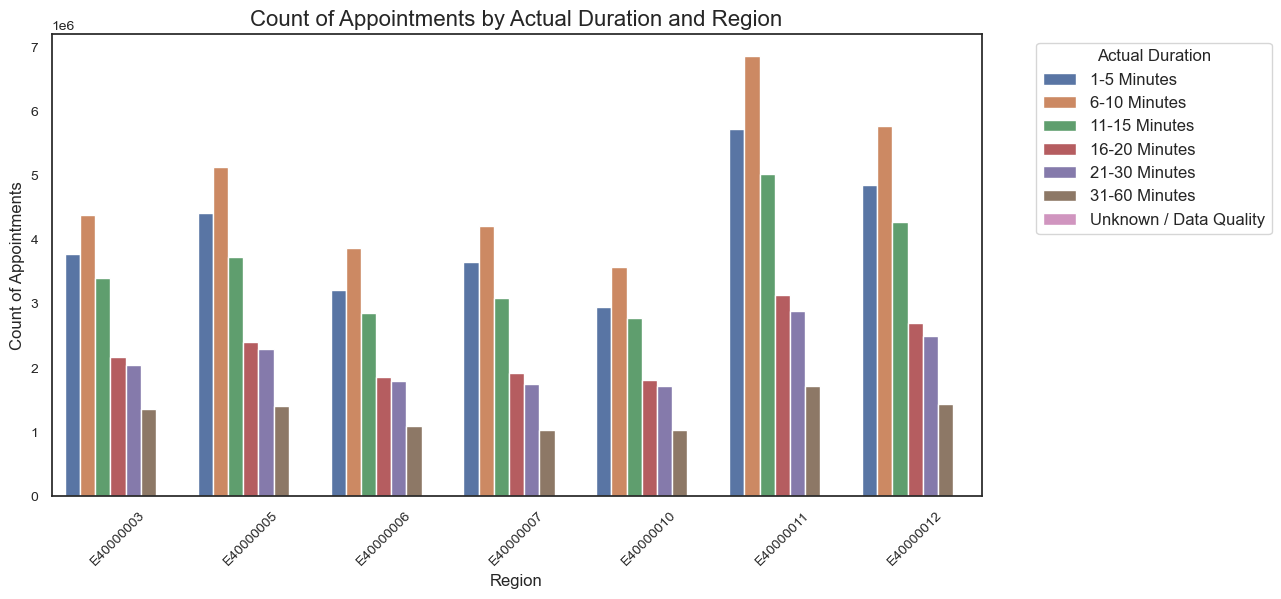

In [280]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=ad_region, x='region_ons_code', y='count_of_appointments', hue='actual_duration', hue_order=duration_order)
plt.title('Count of Appointments by Actual Duration and Region')
plt.xlabel('Region')
plt.ylabel('Count of Appointments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Actual Duration', bbox_to_anchor=(1.05, 1), loc='upper left')
# Define the order of the legend labels
duration_order = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes', '21-30 Minutes', '31-60 Minutes']
plt.show()


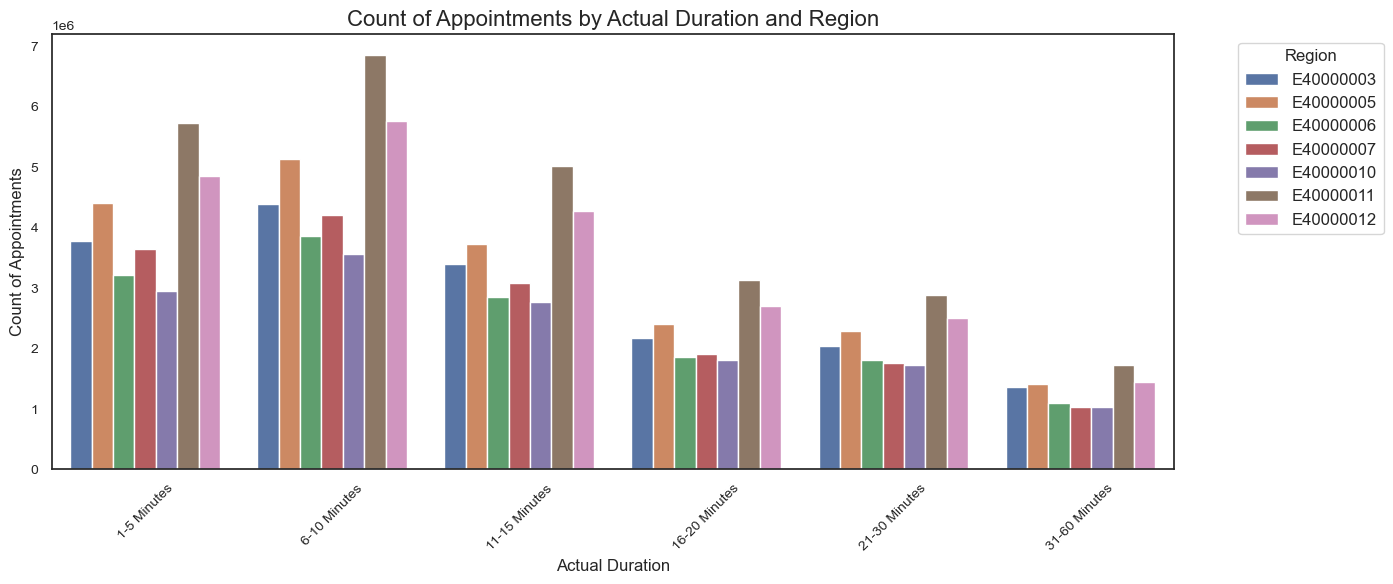

In [281]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=ad_region, x='actual_duration', y='count_of_appointments', hue='region_ons_code', order=duration_order)
plt.title('Count of Appointments by Actual Duration and Region')
plt.xlabel('Actual Duration')
plt.ylabel('Count of Appointments')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
# Define the order of the legend labels
duration_order = ['1-5 Minutes', '6-10 Minutes', '11-15 Minutes', '16-20 Minutes', '21-30 Minutes', '31-60 Minutes']
plt.show()


**Conclusion:**
It's important to acknowledge that the actual duration field is recorded differently depending on GP system supplier. And the majority of the appoitments duration are "Unknown/Data Quality issue".

Despite this caveat, our analysis reveals that the distribution of appointment durations remains consistent across different time periods and regions. This suggests that while there may be inconsistencies in how appointments are recorded or categorized, the underlying patterns in appointment duration are relatively stable.

**Exploring ar dataset - Check the spread**

(596821, 8)

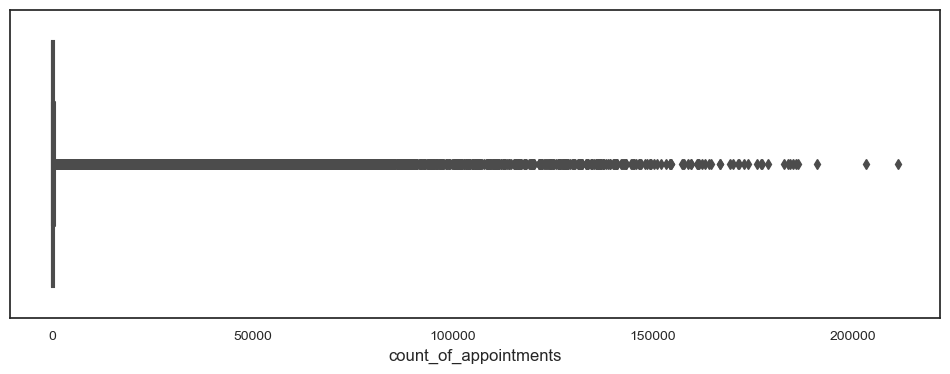

In [284]:
# Create boxplot
sns.boxplot(x=ar['count_of_appointments'], whis=1.5)
ar.shape

<Axes: xlabel='count_of_appointments'>

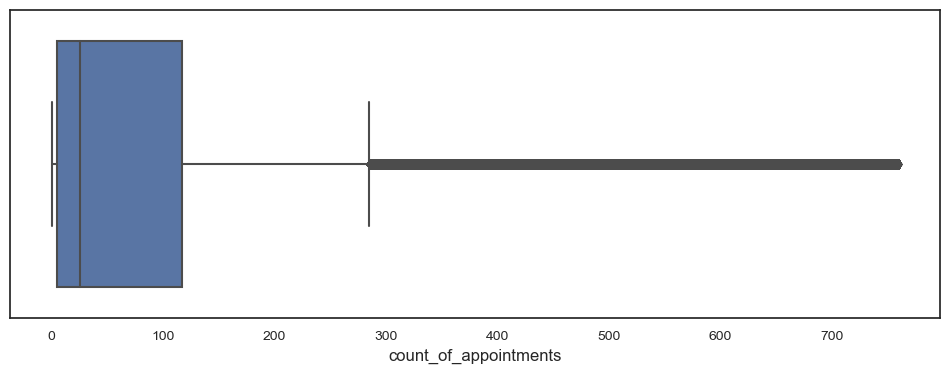

In [285]:
# Remove outliers from ar
# The columns you want to search for outliers in.
cols = ['count_of_appointments'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = ar[cols].quantile(0.25) 
Q3 = ar[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((ar[cols] < (Q1 - 1.5 * IQR)) | (ar[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition.
ar_non_outlier = ar[condition]
ar_non_outlier.shape

# View the boxplot
sns.boxplot(x=ar_non_outlier['count_of_appointments'], whis=1.5)

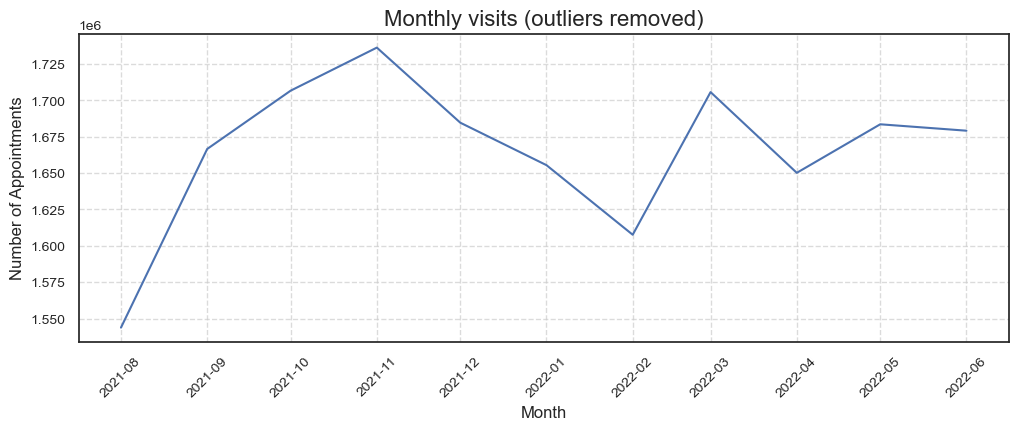

In [286]:
# Filter the data set to only look at data from 2021-08 onwards.
ar_filtered_nout = ar_non_outlier[ar_non_outlier['appointment_month'] >= '2021-08']

# Determine the total number of appointments per month.
ar_nout = ar_filtered_nout.groupby(['appointment_month'])\
.sum()['count_of_appointments']\
.reset_index()\

# Plot sum of count of monthly visits with outliers removed.
# Create a lineplot with Seaborn.
sns.lineplot(x='appointment_month', y='count_of_appointments', data=ar_nout)
plt.title("Monthly visits (outliers removed)")

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

In [287]:
# Create an aggregated data set to review the different features.
ar_agg_nout = ar_filtered_nout.groupby(['appointment_month', 'appointment_status', 'hcp_type','appointment_mode', 'time_between_book_and_appointment'])\
.sum()['count_of_appointments']\
.reset_index()

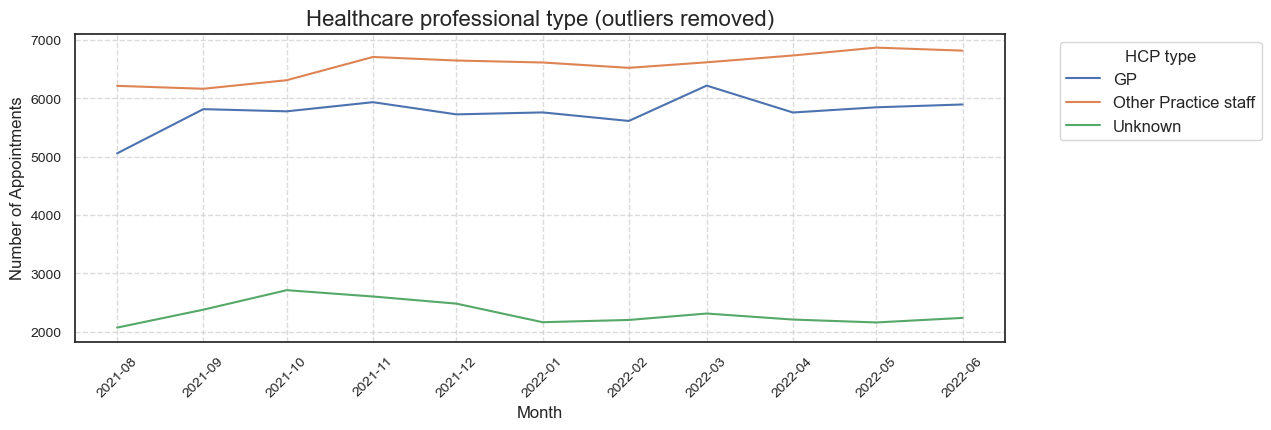

In [288]:
# Plot number of appointments per hcp type with outliers removed
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='hcp_type', data=ar_agg_nout, errorbar=None)
plt.legend(title='HCP type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Healthcare professional type (outliers removed)')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

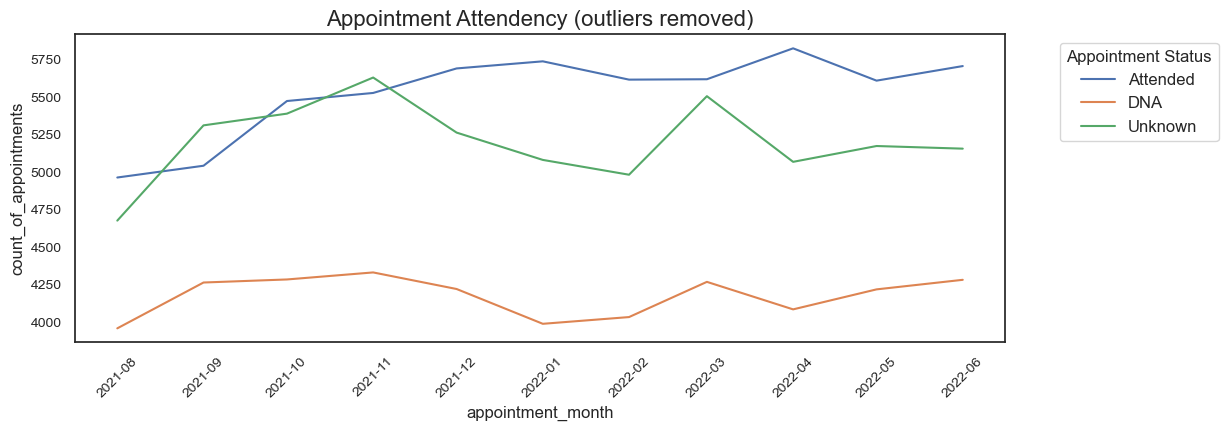

In [289]:
# Plot number of appointments per appoitment status with outliers removed
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_status', data=ar_agg_nout, errorbar=None)
plt.title("Appointment Attendency (outliers removed)")
plt.legend(title='Appointment Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Show the plot
plt.show()

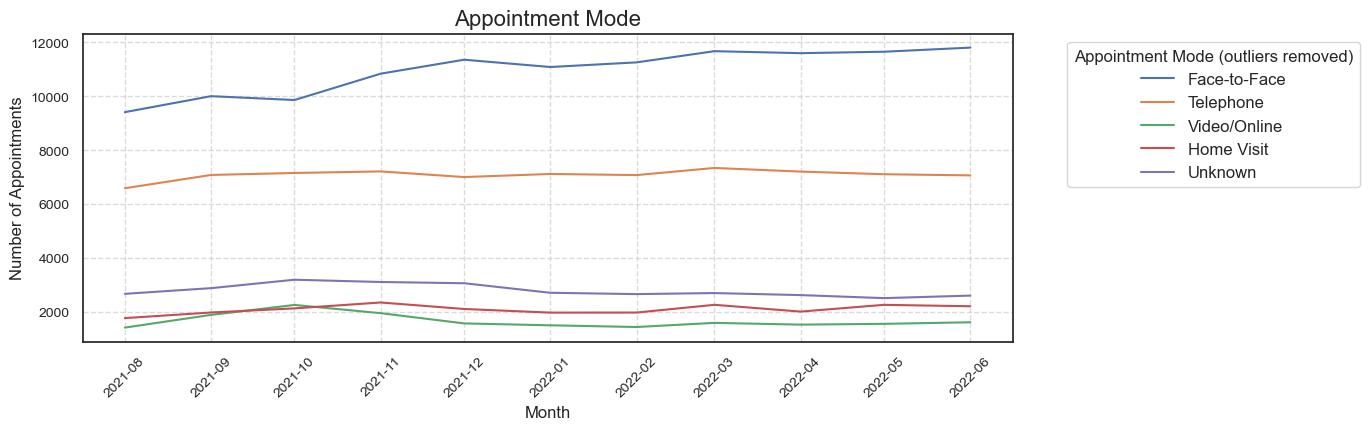

In [290]:
# Plot number of appointments mode with outliers removed
# Define the desired order for the legend
mode_order = ['Face-to-Face', 'Telephone', 'Video/Online', 'Home Visit', 'Unknown']

# Plot Appointment Mode.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='appointment_mode', data=ar_agg_nout, hue_order=mode_order, errorbar=None)
plt.title('Appointment Mode')
plt.legend(title='Appointment Mode (outliers removed)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

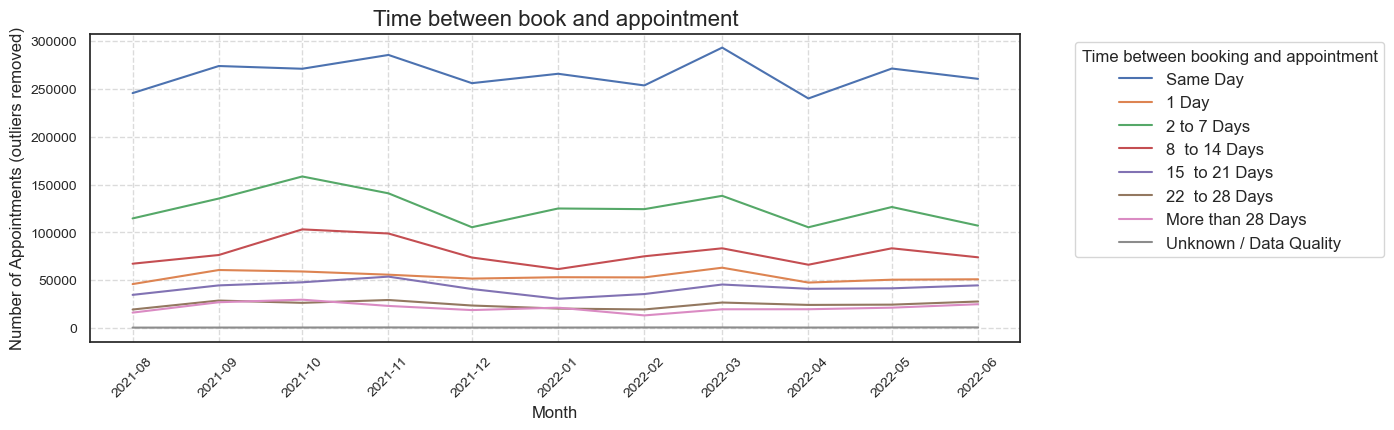

In [291]:
# Plot number of appointments per Time between booking and appointmen with outliers removed
# Define the desired order for the legend
time_order = ['Same Day', '1 Day', '2 to 7 Days', '8  to 14 Days', '15  to 21 Days', '22  to 28 Days', 'More than 28 Days', 'Unknown / Data Quality']

# Plot monthly capacity utilisation.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='time_between_book_and_appointment', data=ar_agg, hue_order=time_order, errorbar=None)
plt.title('Time between book and appointment')
plt.legend(title='Time between booking and appointment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Month')
plt.ylabel('Number of Appointments (outliers removed)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

>Removing outliers changed the plots and the story completely. I'm not an expert on the maths going on behind and I won't have time to learn it to understand and make a decision.
So, I won't remove the outliers.

### Attempt to merge ar and nc.
I would like to do it now to investigate what national category the appoitments were missed.

Since nc and ar have the same total of appointments by month, I can merge these 2 df using month and icb_ons_code
On the nc dataframe, only the National category is important to ask the questions posed.
So, I can create a new df with nacional category, month only (it already exist: nc_nc), and then inner merge with the ar dataframe.
Nc is from AUG-2021 to JUN-2022 and AR is from JAN-2020 to JUN-2022. Therefore, I will filter ar for the same period.

In [294]:
# Convert appointment_month to datetime in both dataframes
nc_nc['appointment_month'] = pd.to_datetime(nc_nc['appointment_month'])
ar_filtered['appointment_month'] = pd.to_datetime(ar_filtered['appointment_month'])

# Aggregate count of appointments in each dataset
agg_ar = ar_filtered.groupby(['appointment_month', 'appointment_status'])['count_of_appointments'].sum().reset_index()

# Merge data on common columns
merged_df = pd.merge(nc_nc, agg_ar, on=['appointment_month'], how='inner')

# Rename columns for clarity
merged_df.rename(columns={'count_of_appointments_x': 'count_of_appointments_nc',
                          'count_of_appointments_y': 'count_of_appointments_ar'}, inplace=True)


# Display merged data
merged_df.head()

appointment_month  \
0        2021-08-01   
1        2021-08-01   
2        2021-08-01   
3        2021-08-01   
4        2021-08-01   

                                                     national_category  \
0  Care Home Needs Assessment & Personalised Care and Support Planning   
1  Care Home Needs Assessment & Personalised Care and Support Planning   
2  Care Home Needs Assessment & Personalised Care and Support Planning   
3                                                      Care Home Visit   
4                                                      Care Home Visit   

   count_of_appointments_nc appointment_status  count_of_appointments_ar  
0                     29676           Attended                  22081765  
1                     29676                DNA                    949137  
2                     29676            Unknown                    821269  
3                     47583           Attended                  22081765  
4                     47583                DNA                    949137

>**Conclusion:** After creating the df, I realised it won't work actually. As we can see above, there is a repetition of count of appt_nc for a given month and category,
for Attended, DNA and Unknown. Of course! Only after looking at the df I realised I won't get any more granularity, I will never know, for example, from the 29,676 appointments on August 21 how many were attended, or not, because they were recorded in different dataframes.

>>*I spent loads of time trying to do it. I imagine, with experience I wouldn't even try it.*

### Forecast

In [297]:
import statsmodels.api as sm

# Filter the data set to only look at data from 2021-01 onwards, so I have a 1.5 year amd it's after the drop of the pandemic
ar_filtered_2 = ar[ar['appointment_month'] >= '2021-01']


# Convert 'appointment_month' to datetime and set it as the index
ar_filtered_2['appointment_month'] = pd.to_datetime(ar_filtered_2['appointment_month'])
ar_filtered_2.set_index('appointment_month', inplace=True)

# Aggregate data by month
appointments_monthly = ar_filtered_2.resample('M').sum()

# Fit SARIMA model
# Example SARIMA parameters: SARIMA(1,1,1)(1,1,1,12)
sarima_model = sm.tsa.SARIMAX(appointments_monthly['count_of_appointments'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()

# Forecast future appointments
forecast_steps = 12  # Forecasting for the next 12 months
forecast = sarima_result.forecast(steps=forecast_steps)

print(forecast)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.09970D+21    |proj g|=  3.19760D+26

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     20      1     0     0   8.958D+17   5.523D+15
  F =   5522709601158149.0     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
2022-07-31    2.627616e+07
2022-08-31    2.438911e+07
2022-09-30    2.905944e+07
2022-10-31    3.084078e+07
2022-11-30    3.094201e+07
2022-12-31    2.567772e+07
2023-01-31    2.617241e+07
2023-

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


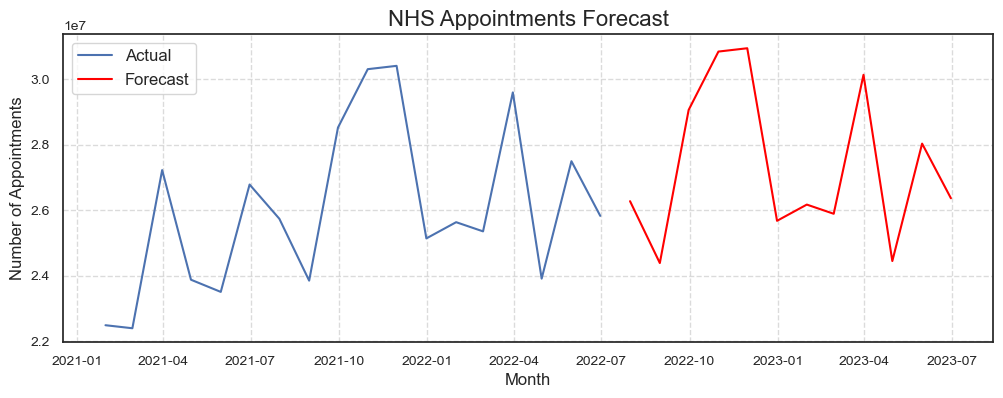

In [298]:
# Plot actual data
plt.plot(appointments_monthly.index, appointments_monthly['count_of_appointments'], label='Actual')

# Plot forecasted values
forecast_index = pd.date_range(start=appointments_monthly.index[-1], periods=forecast_steps+1, freq='M')[1:]
plt.plot(forecast_index, forecast, color='red', label='Forecast')

plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.title('NHS Appointments Forecast')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


>I don't feel convident enough to choose a forecast model. I feel like we just started learning it and I would need to learn much more to do it properly.